# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions.

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**.

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv

Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.).
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 13 March, 2023, midnight.**

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/137_o3OVj8Y5C8-PCQlX-RpmHh439qe9U?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as
    continuous and which ones as categorical types).
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.

    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Save the initial discussion of your findings into a single data quality report PDF file.
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file.

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed.
    - Save the new CSV file with a self explanatory name.
    - Save the data quality plan to a single PDF file.

(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g.,
    continuous-continuous feature plot or continuous-categorical plots or correlation plots).
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.

(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.

In [1]:
#import required packages pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
#Using pandas to read in the .csv file
input_file = pd.read_csv("./covid19-cdc-19211297.csv")

#Convert input file into dataframe
df = pd.DataFrame(input_file)

# (1). Create the data quality report and cleaned CSV file

### Shape of the dataframe

In [3]:
df.shape

(40000, 19)

### Display first 5 rows of the dataframe

In [4]:
df.head(5)

case_month res_state  state_fips_code   res_county  county_fips_code  \
0    2020-12        CA                6    RIVERSIDE            6065.0   
1    2022-01        NJ               34   GLOUCESTER           34015.0   
2    2020-11        TN               47       PUTNAM           47141.0   
3    2020-04        NY               36  WESTCHESTER           36119.0   
4    2020-03        TN               47       SUMNER           47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Unknown              Unknown   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
0                              NaN                  NaN  Missing     Missing   
1                              2.0                  0.0  Missing     Missing   
2                              0.0                  0.0  Missing         Yes   
3                              0.0                  NaN  Missing     Missing   
4                              0.0                  0.0  Missing         Yes   

              current_status symptom_status  hosp_yn   icu_yn death_yn  \
0  Laboratory-confirmed case        Unknown  Missing  Missing      Yes   
1  Laboratory-confirmed case    Symptomatic      Yes  Missing      Yes   
2  Laboratory-confirmed case    Symptomatic      Yes       No      Yes   
3  Laboratory-confirmed case    Symptomatic      Yes       No      Yes   
4  Laboratory-confirmed case    Symptomatic      Yes       No      Yes   

  underlying_conditions_yn  
0                      NaN  
1                      NaN  
2                      Yes  
3                      NaN  
4                      NaN

### Display last 5 rows of the dataframe

In [5]:
df.tail(5)

case_month res_state  state_fips_code       res_county  \
39995    2022-02        MN               27             POLK   
39996    2022-11        OH               39         FRANKLIN   
39997    2021-10        MI               26            WAYNE   
39998    2021-09        IN               18            ALLEN   
39999    2020-11        MD               24  PRINCE GEORGE'S   

       county_fips_code       age_group     sex   race            ethnicity  \
39995           27119.0    0 - 17 years  Female    NaN                  NaN   
39996           39049.0  18 to 49 years  Female  Black  Non-Hispanic/Latino   
39997           26163.0  18 to 49 years  Female  Black  Non-Hispanic/Latino   
39998           18003.0  50 to 64 years  Female  White  Non-Hispanic/Latino   
39999           24033.0  50 to 64 years    Male  White      Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39995                              0.0                  NaN  Missing   
39996                              0.0                  NaN  Missing   
39997                              NaN                  NaN  Missing   
39998                              0.0                  NaN  Missing   
39999                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39995     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
39996     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
39997         Yes  Laboratory-confirmed case    Symptomatic       No       No   
39998     Missing  Laboratory-confirmed case        Missing       No  Missing   
39999     Missing  Laboratory-confirmed case    Symptomatic       No  Missing   

      death_yn underlying_conditions_yn  
39995       No                      NaN  
39996       No                      NaN  
39997       No                      NaN  
39998       No                      NaN  
39999       No                      NaN

### Display number of entries, data types and non-null count of each feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       40000 non-null  object 
 1   res_state                        40000 non-null  object 
 2   state_fips_code                  40000 non-null  int64  
 3   res_county                       37568 non-null  object 
 4   county_fips_code                 37568 non-null  float64
 5   age_group                        39736 non-null  object 
 6   sex                              39223 non-null  object 
 7   race                             35387 non-null  object 
 8   ethnicity                        35011 non-null  object 
 9   case_positive_specimen_interval  20947 non-null  float64
 10  case_onset_interval              17318 non-null  float64
 11  process                          40000 non-null  object 
 12  exposure_yn       

In [7]:
columns = df.columns

for column in columns:
    print("Column Name:", column, "\nData Type:", df[column].dtype, "\nNumber of Unique Values:", str(len(df[column].unique())))
    print(df[column].unique())
    print()

Column Name: case_month 
Data Type: object 
Number of Unique Values: 35
['2020-12' '2022-01' '2020-11' '2020-04' '2020-03' '2021-08' '2021-07'
 '2022-02' '2021-11' '2022-06' '2020-07' '2021-01' '2020-05' '2021-10'
 '2020-06' '2020-08' '2021-12' '2020-09' '2020-10' '2021-03' '2022-10'
 '2021-04' '2021-09' '2021-02' '2022-05' '2020-01' '2022-07' '2021-05'
 '2022-11' '2022-03' '2022-08' '2022-09' '2022-04' '2021-06' '2020-02']

Column Name: res_state 
Data Type: object 
Number of Unique Values: 49
['CA' 'NJ' 'TN' 'NY' 'FL' 'MI' 'KY' 'MA' 'IL' 'WI' 'SC' 'TX' 'OH' 'NV'
 'ND' 'AR' 'AZ' 'NH' 'PR' 'IN' 'MO' 'CT' 'AL' 'KS' 'UT' 'PA' 'OK' 'CO'
 'OR' 'VA' 'MN' 'MD' 'LA' 'MT' 'NC' 'NM' 'GA' 'MS' 'ME' 'WA' 'ID' 'DC'
 'IA' 'RI' 'WY' 'AK' 'VT' 'VI' 'GU']

Column Name: state_fips_code 
Data Type: int64 
Number of Unique Values: 49
[ 6 34 47 36 12 26 21 25 17 55 45 48 39 32 38  5  4 33 72 18 29  9  1 20
 49 42 40  8 41 51 27 24 22 30 37 35 13 28 23 53 16 11 19 44 56  2 50 78
 66]

Column Name: res_coun

### Convert features to appropriate datatypes

In [8]:
# change datatype of state_fips_code and county_fips_code to categorical
df["state_fips_code"] = df["state_fips_code"].astype('category')
df["county_fips_code"] = df["county_fips_code"].astype('category')

In [9]:
# convert all remain object types to categorical datatypes
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

In [10]:
# display the new data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case_month                       40000 non-null  category
 1   res_state                        40000 non-null  category
 2   state_fips_code                  40000 non-null  category
 3   res_county                       37568 non-null  category
 4   county_fips_code                 37568 non-null  category
 5   age_group                        39736 non-null  category
 6   sex                              39223 non-null  category
 7   race                             35387 non-null  category
 8   ethnicity                        35011 non-null  category
 9   case_positive_specimen_interval  20947 non-null  float64 
 10  case_onset_interval              17318 non-null  float64 
 11  process                          40000 non-null  category
 12  expo

Based on the above analysis of each feature and the range of values in each feature as well as reading over the data dictionary the following actions were taken:
-  The datatypes of state_fips_code and count_fips_code will be changed from float64 to categorical, they are numbers, but they represent the category of states and counties
-  case_positive_specimen_interval and case_onset_interval represent an interval of time rounded up to weeks, while the decimal point doesn't mean anything here they will be left as float64 currently to preserve the NaN values for later inspection of missing values in the dataset
-  case_month is a date but will be changed to a categorical feature as converting to a datetime object would add misleading data by setting all the dates to the 1st of each month
-  The rest of the features are categorical
-  It is also noted that in place of NaN values, the string 'Missing' and 'Unknown' was used in many instances across features which will be examined later

### Check for duplicate rows

In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows.
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  3619
Number of duplicate rows (including first) in the table is: 6091


In [12]:
# Show duplicate row data
df[df.duplicated(keep=False)]

case_month res_state state_fips_code    res_county county_fips_code  \
16       2020-04        NJ              34      SOMERSET          34035.0   
28       2020-04        NY              36   WESTCHESTER          36119.0   
29       2022-01        AZ               4      MARICOPA           4013.0   
38       2021-01        IL              17        DUPAGE          17043.0   
39       2020-12        NH              33  HILLSBOROUGH          33011.0   
...          ...       ...             ...           ...              ...   
39914    2021-12        KS              20       JOHNSON          20091.0   
39943    2020-12        FL              12    MIAMI-DADE          12086.0   
39961    2020-12        NC              37       FORSYTH          37067.0   
39976    2022-10        NY              36        ULSTER          36111.0   
39998    2021-09        IN              18         ALLEN          18003.0   

            age_group     sex     race            ethnicity  \
16          65+ years  Female    White  Non-Hispanic/Latino   
28          65+ years    Male  Missing              Unknown   
29          65+ years    Male    White  Non-Hispanic/Latino   
38          65+ years  Female    White  Non-Hispanic/Latino   
39          65+ years    Male    White  Non-Hispanic/Latino   
...               ...     ...      ...                  ...   
39914  18 to 49 years  Female    White  Non-Hispanic/Latino   
39943  18 to 49 years  Female    White      Hispanic/Latino   
39961  18 to 49 years    Male      NaN                  NaN   
39976  18 to 49 years  Female    White              Unknown   
39998  50 to 64 years  Female    White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16                                 NaN                  0.0  Missing   
28                                 0.0                  NaN  Missing   
29                                 NaN                  NaN  Missing   
38                                 0.0                  0.0  Missing   
39                                 0.0                  0.0  Missing   
...                                ...                  ...      ...   
39914                              NaN                  0.0  Missing   
39943                              NaN                  0.0  Missing   
39961                              0.0                  NaN  Missing   
39976                              NaN                  NaN  Missing   
39998                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
16        Missing  Laboratory-confirmed case    Symptomatic      Yes  Missing   
28        Missing  Laboratory-confirmed case        Missing  Missing  Missing   
29        Missing  Laboratory-confirmed case        Missing      Yes  Missing   
38        Missing  Laboratory-confirmed case        Missing       No  Missing   
39        Missing  Laboratory-confirmed case    Symptomatic  Missing  Missing   
...           ...                        ...            ...      ...      ...   
39914     Missing  Laboratory-confirmed case    Symptomatic  Unknown  Missing   
39943     Missing  Laboratory-confirmed case    Symptomatic       No  Missing   
39961     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   
39976     Missing  Laboratory-confirmed case        Missing  Missing  Missing   
39998     Missing  Laboratory-confirmed case        Missing       No  Missing   

      death_yn underlying_conditions_yn  
16         Yes                      NaN  
28         Yes                      NaN  
29         Yes                      NaN  
38         Yes                      NaN  
39         Yes                      NaN  
...        ...                      ...  
39914       No                      NaN  
39943       No                      NaN  
39961       No                      NaN  
39976       No                      NaN  
39998       No          

On inspection of the above table and the number of rows with duplicate values, the duplicates will be left in the dataframe. As there is no unique identifier or primary key for each instance and the level of granularity of the data is at county level. I inspect across all the rows in the dataframe.

On inspection of the data it is likely that individual's with similar traits such as age group, sex, race and ethnicity have similar data. Therefore, it can not be concluded that this data should be excluded.

There is also no duplication across the columns

# Check for missing values

In [13]:
# Display the number of null variables in the dataset
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          2432
county_fips_code                    2432
age_group                            264
sex                                  777
race                                4613
ethnicity                           4989
case_positive_specimen_interval    19053
case_onset_interval                22682
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           36525
dtype: int64

Based on the data dictionary and inspection of each feature above, the string 'Unknown' and 'Missing' were used across features, below checks the number of instances of each of these across all features

In [14]:
# Count number of instances of 'Unknown' and 'Missing' strings
df_sum = df[df == 'Unknown'].count()
df_sum += df[df == 'Missing'].count()
print(df_sum)

case_month                             0
res_state                              0
state_fips_code                        0
res_county                             0
county_fips_code                       0
age_group                             63
sex                                  224
race                                4944
ethnicity                           7478
case_positive_specimen_interval        0
case_onset_interval                    0
process                            36597
exposure_yn                        36151
current_status                         0
symptom_status                     21236
hosp_yn                            13492
icu_yn                             36604
death_yn                               0
underlying_conditions_yn               0
dtype: int64


Based on the quantity of instances of the strings 'Missing' and 'Unknown', they will be replaced with NaN for consistency across the dataframe and ensure they are captured with the use of methods such as .isnull()

In [15]:
# Replacing strings and checking all instances have been changed to NaN values
missing_data = ['Unknown', 'Missing']
df.replace(missing_data, np.nan, inplace=True)
df_sum = df[df == 'Unknown'].count()
df_sum += df[df == 'Missing'].count()
print(df_sum)

case_month                         0
res_state                          0
state_fips_code                    0
res_county                         0
county_fips_code                   0
age_group                          0
sex                                0
race                               0
ethnicity                          0
case_positive_specimen_interval    0
case_onset_interval                0
process                            0
exposure_yn                        0
current_status                     0
symptom_status                     0
hosp_yn                            0
icu_yn                             0
death_yn                           0
underlying_conditions_yn           0
dtype: int64


In [16]:
# Inspecting new number of null values in the dataset
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          2432
county_fips_code                    2432
age_group                            327
sex                                 1001
race                                9557
ethnicity                          12467
case_positive_specimen_interval    19053
case_onset_interval                22682
process                            36597
exposure_yn                        36151
current_status                         0
symptom_status                     21236
hosp_yn                            13492
icu_yn                             36604
death_yn                               0
underlying_conditions_yn           36525
dtype: int64

### Saving the cleaned data frame to a new csv file

In [17]:
# Write the dataframe to a csv file
df.to_csv('covid19_cdc_19211297_cleaned_1-1.csv', index=False)

# Checking for %missing instances and cardinality

In [18]:
# separate out continuous and categorical features
continuous_columns = df.select_dtypes('float64').columns
category_columns = df.select_dtypes('category').columns

In [19]:
# display table with continuous statistics
df[continuous_columns].describe().T

count      mean       std    min  25%  50%  \
case_positive_specimen_interval  20947.0  0.148231  2.256987 -107.0  0.0  0.0   
case_onset_interval              17318.0 -0.039266  1.751451  -58.0  0.0  0.0   

                                 75%   max  
case_positive_specimen_interval  0.0  73.0  
case_onset_interval              0.0  70.0

In [20]:
# Prepare %missing column
continuous_columns_missing  = 100 * (df[continuous_columns].isnull().sum() / df.shape[0])
# store the values in a dataframe and display
df_continuous_missing = pd.DataFrame(continuous_columns_missing, columns=['%missing'])
df_continuous_missing

%missing
case_positive_specimen_interval   47.6325
case_onset_interval               56.7050

In [21]:
# create a cardinality column
continuous_columns_card = df[continuous_columns].nunique()
# store the values in a dataframe and display
df_continuous_card = pd.DataFrame(continuous_columns_card, columns=['card'])
df_continuous_card

card
case_positive_specimen_interval    72
case_onset_interval                59

In [22]:
# Add missing values column
df_table_continuous = df[continuous_columns].describe().T

# Put the columns together to prepare the final table for continuous_columns
df_continuous_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_card], axis=1)
df_continuous_columns_data_quality_report_table

count      mean       std    min  25%  50%  \
case_positive_specimen_interval  20947.0  0.148231  2.256987 -107.0  0.0  0.0   
case_onset_interval              17318.0 -0.039266  1.751451  -58.0  0.0  0.0   

                                 75%   max  %missing  card  
case_positive_specimen_interval  0.0  73.0   47.6325    72  
case_onset_interval              0.0  70.0   56.7050    59

Inspecting the continuous data:
-  Both features have non-zero standard deviations
-  Both have a negative minimum value which should be impossible, each should be greater than zero
-  The percentage of missing values is also over 45% for both features which is quiet high

In [23]:
# Save the continuous table for the data report
df_continuous_columns_data_quality_report_table.to_csv("continuousFeatureDescription.csv")

In [24]:
# display table with categorical statistics
df_table_categorical = df[category_columns].describe().T
df_table_categorical

count  unique                        top   freq
case_month                  40000      35                    2022-01   5227
res_state                   40000      49                         NY   4315
state_fips_code             40000      49                         36   4315
res_county                  37568     929                 MIAMI-DADE    820
county_fips_code          37568.0  1326.0                    12086.0  820.0
age_group                   39673       4             18 to 49 years  15357
sex                         38999       3                     Female  20250
race                        30443       6                      White  24858
ethnicity                   27533       2        Non-Hispanic/Latino  24066
process                      3403       7        Clinical evaluation   1659
exposure_yn                  3849       1                        Yes   3849
current_status              40000       2  Laboratory-confirmed case  34097
symptom_status              18764       2                Symptomatic  18191
hosp_yn                     26508       2                         No  19749
icu_yn                       3396       2                         No   2367
death_yn                    40000       2                         No  30000
underlying_conditions_yn     3475       2                        Yes   3431

In [25]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

%missing
case_month                  0.0000
res_state                   0.0000
state_fips_code             0.0000
res_county                  6.0800
county_fips_code            6.0800
age_group                   0.8175
sex                         2.5025
race                       23.8925
ethnicity                  31.1675
process                    91.4925
exposure_yn                90.3775
current_status              0.0000
symptom_status             53.0900
hosp_yn                    33.7300
icu_yn                     91.5100
death_yn                    0.0000
underlying_conditions_yn   91.3125

In [26]:
# Add missing values column, unique is the cardinality for the table
df_category_columns_data_quality_report_table = pd.concat([df_table_categorical, df_category_perc_missing], axis=1)
df_category_columns_data_quality_report_table

count  unique                        top   freq  \
case_month                  40000      35                    2022-01   5227   
res_state                   40000      49                         NY   4315   
state_fips_code             40000      49                         36   4315   
res_county                  37568     929                 MIAMI-DADE    820   
county_fips_code          37568.0  1326.0                    12086.0  820.0   
age_group                   39673       4             18 to 49 years  15357   
sex                         38999       3                     Female  20250   
race                        30443       6                      White  24858   
ethnicity                   27533       2        Non-Hispanic/Latino  24066   
process                      3403       7        Clinical evaluation   1659   
exposure_yn                  3849       1                        Yes   3849   
current_status              40000       2  Laboratory-confirmed case  34097   
symptom_status              18764       2                Symptomatic  18191   
hosp_yn                     26508       2                         No  19749   
icu_yn                       3396       2                         No   2367   
death_yn                    40000       2                         No  30000   
underlying_conditions_yn     3475       2                        Yes   3431   

                          %missing  
case_month                  0.0000  
res_state                   0.0000  
state_fips_code             0.0000  
res_county                  6.0800  
county_fips_code            6.0800  
age_group                   0.8175  
sex                         2.5025  
race                       23.8925  
ethnicity                  31.1675  
process                    91.4925  
exposure_yn                90.3775  
current_status              0.0000  
symptom_status             53.0900  
hosp_yn                    33.7300  
icu_yn                     91.5100  
death_yn                    0.0000  
underlying_conditions_yn   91.3125

Inspecting the categorical data:
- exposure_yn should be dropped as it is a constant column and over 90% of its values are missing
- The %missing of process, exposure_yn, icu_yn and underlying_conditions is over 90%, these columns should be dropped
- Over 6% of res_county and count_fips_code instances are missing values, given that these relate to the same data in two different formats i.e. as a code and as a string they are expected to be the same, this will be further inspected later on
- Race and ethnicity have a high level of missing values also at 23% and 31% respectively, this will be inspected further later on
- Gender is missing data for 2% of instances, will replace the NaN values with the string 'Missing'
- age_group has missing data for 0.8% of entries, this is relatively low and will be inspected later on in greater detail

In [27]:
# save the categorical table to a csv for the data quality report
df_category_columns_data_quality_report_table.to_csv("categoricalFeatureDescription.csv")

## Continuous Features Logical Checks and Range of Values

For each continuous column, the below inspects the range of absolute values and the %frequency of instance of each value

In [28]:
# checks the range of values and the %frequency of those values for the highest 20
for num in continuous_columns:
    df_percent_instances = (df[num].value_counts(normalize=True)*100).nlargest(20)
    print(num)
    print("Range is:", df[num].min(), "to", df[num].max())
    print('{0:.5}  {1}'.format("Value", "%ofData"))
    print(df_percent_instances, "\n")

case_positive_specimen_interval
Range is: -107.0 to 73.0
Value  %ofData
 0.0     88.981716
 1.0      8.535829
 2.0      1.083687
-1.0      0.319855
 3.0      0.243472
 4.0      0.133671
-2.0      0.052513
 5.0      0.042966
-3.0      0.042966
 7.0      0.033418
-5.0      0.023870
-4.0      0.023870
 6.0      0.023870
 8.0      0.019096
 20.0     0.019096
 9.0      0.019096
 10.0     0.019096
 26.0     0.019096
-8.0      0.019096
 31.0     0.014322
Name: case_positive_specimen_interval, dtype: float64 

case_onset_interval
Range is: -58.0 to 70.0
Value  %ofData
 0.0     95.900219
-1.0      1.997921
-2.0      0.635177
-3.0      0.236748
 1.0      0.173230
-4.0      0.150133
 3.0      0.069292
-5.0      0.051969
-6.0      0.051969
 2.0      0.051969
-10.0     0.046195
 4.0      0.046195
-7.0      0.046195
-9.0      0.046195
-11.0     0.040420
 7.0      0.028872
 5.0      0.028872
 6.0      0.023097
 11.0     0.023097
 9.0      0.023097
Name: case_onset_interval, dtype: float64 



### Logical Integrity of Data
Above it was noted that case_positive_specimen_interval and case_onset_interval have negative values which should be impossible, the below examines how many rows are effected

There is also a high percentage of 0 values for case_onset_interval, this will be graphically shown in a histogram and further examined with the below logical tests

In [29]:
# Testing number of case_positive_specimen_interval values that are less than 0, which is impossible
test_1 = (df[["case_positive_specimen_interval"]][df["case_positive_specimen_interval"] < 0]).shape[0]
all_non_nan_rows = (df[["case_positive_specimen_interval"]][df["case_positive_specimen_interval"] >= 0]).shape[0]
print("Number of rows failing the test:", test_1)
print("% Rows falling the test:", (test_1/all_non_nan_rows)*100)
print()
print("Number of rows passing the test:", (df[["case_positive_specimen_interval"]][df["case_positive_specimen_interval"] >= 0]).shape[0])

Number of rows failing the test: 131
% Rows falling the test: 0.6293235972328978

Number of rows passing the test: 20816


In [30]:
# Testing number of case_onset_interval values that are less than 0, which is impossible
test_2 = (df[["case_onset_interval"]][df["case_onset_interval"] < 0]).shape[0]
all_non_nan_rows = (df[["case_onset_interval"]][df["case_onset_interval"] >= 0]).shape[0]
print("Number of rows failing the test:", test_2)
print("% Rows failing the test:", (test_2/all_non_nan_rows)*100)
print()
print("Number of rows passing the test:", (df[["case_onset_interval"]][df["case_onset_interval"] >= 0]).shape[0])

Number of rows failing the test: 596
% Rows failing the test: 3.5641669656739623

Number of rows passing the test: 16722


From the above analysis, the negative values take up a relatively low percentage of total values, they should be replaced with the numerical mode 0, as negative values are not valid and approximately 90% and 95% of the remaining values for case_positive_specimen_interval and case_onset_interval are 0 respectively

The below tests whether any cases where recorded before Janurary 2020, when the CDC started testing for Covid-19 in the US

In [31]:
#Converting to a date type to sequentially order the months
test_3 = df['case_month'].astype('datetime64[ns]')
print(test_3.min())

2020-01-01 00:00:00


The earliest date in the dataset is in January, there are no rows earlier than when the CDC started testing which is correct

## Continuous Features - Plots

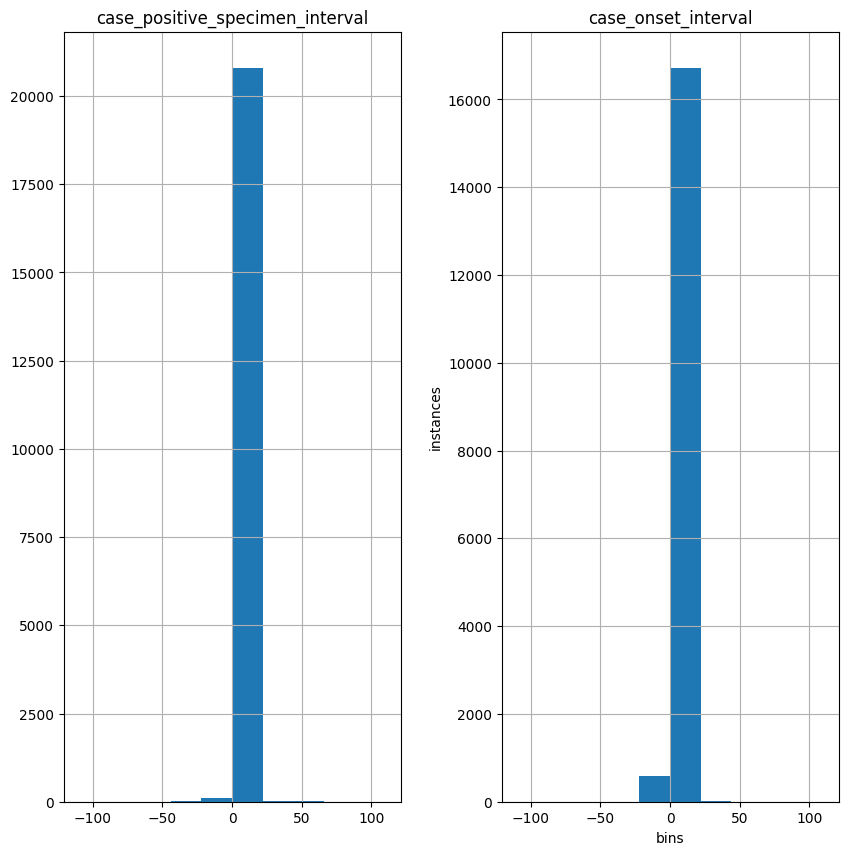

In [32]:
# creating a summary histogram of the continuous features and save as a png, setting range to the max and min of case_positive_specimen_interval
df[continuous_columns].hist(figsize=(10, 10), sharey=False, sharex=False, range=[-110, 110])
plt.ylabel("instances")
plt.xlabel("bins")
plt.savefig('continuous_histograms_1-1.png')

### Plotting individual histograms for both continuous features

Plotting histograms for individual continuous features, the range is bounded to the value of the lowest negative outlier for case_positive_specimen_interval and the highest positive outlier for case_onset_interval to display all recorded values and prevent skewing of the charts

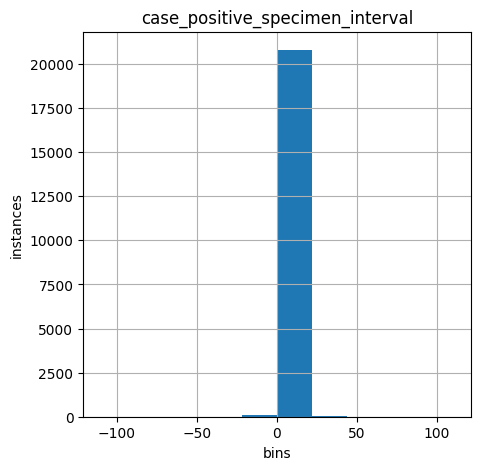

In [33]:
df["case_positive_specimen_interval"].hist(figsize=(5,5), range=[-110, 110], bins = 10)
plt.title("case_positive_specimen_interval")
plt.ylabel("instances")
plt.xlabel("bins")
plt.savefig('case_positive_specimen_interval_histogram_1-1.png')

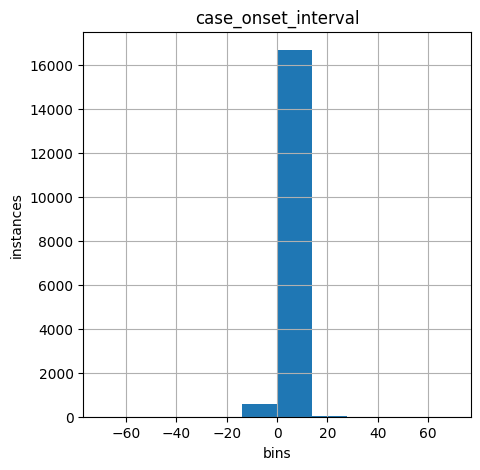

In [34]:
df["case_onset_interval"].hist(figsize=(5,5), bins = 10, range=[-70, 70])
plt.title("case_onset_interval")
plt.ylabel("instances")
plt.xlabel("bins")
plt.savefig('case_onset_interval_histogram_1-1.png')

Evaluation
- There is a high instance of negative values which are impossible.
- The case_positive_specimen_interval measure the time interval between the date the record was received by the CDC or date the related to illness/specimen collection, which ever is earlier and the date of the positive specimen was collected. From the graph and the frequency table there is a high instance of 0's (89%) and negative values, negative values are impossible and should be removed
- The case_onset_interval measures the time interval between the date the record was received by the CDC or date the related to illness/specimen collection, which ever is earlier and the date of the person's symptoms began. The graph has a high number of negative values which is impossible. Also, 95% of case_onset_interval values are 0, which would suggest a person's symptoms developed and the CDC was notified on the same day, a domain expert would be needed to determine if this is plausible scenario for the data.
- The boxplots below will give greater detail

## Boxplots for continuous features

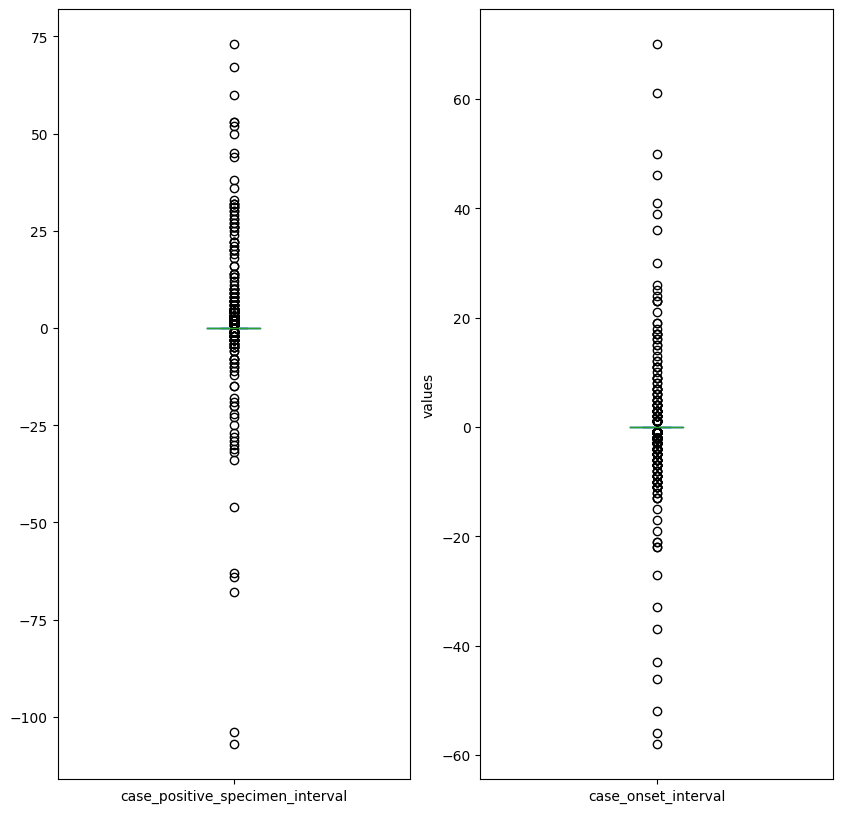

In [35]:
# Creates summary sheet of boxplots and saves it to a png
df[continuous_columns].plot(kind='box', subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.ylabel('values')
plt.savefig('continuous_boxplots_summary1-1.png')

The boxplots reiterate the findings in graphical format that there is a very high instances of 0's in the dataframe and many outliers. For case_onset interval the percentage of negative values to be replaced with the mode 0 is approximately 3.7%. This will make the percentage of values being 0, approximately 98%, this makes it close enough to a constant column, additionally, the 2nd mode of 1 only takes up 0.2% of instances, therefore this feature should be dropped. The case_positive_interval's negative values will be replaced with the mode 0 and kept as the 2nd and 3rd mode take up a greater percentage of instances.

### Categorical Features - Plots

The below plot the categorical features of the dataframe in bar plots for graphical inspection, the NaN values will be left in to see the proportion of the dataset they take up

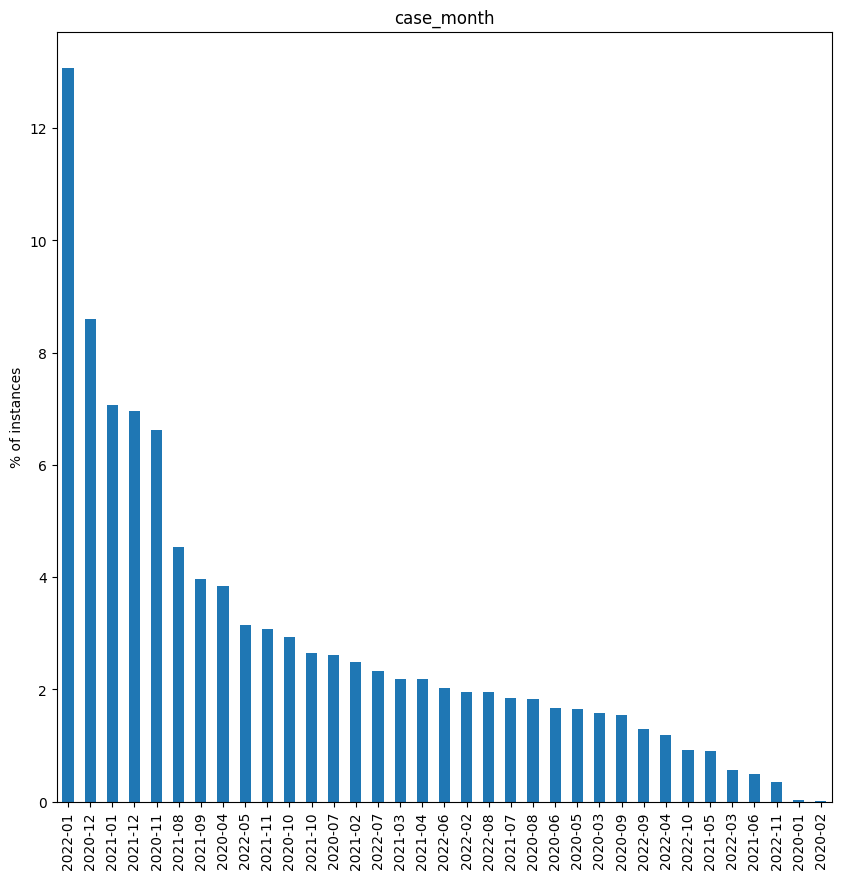

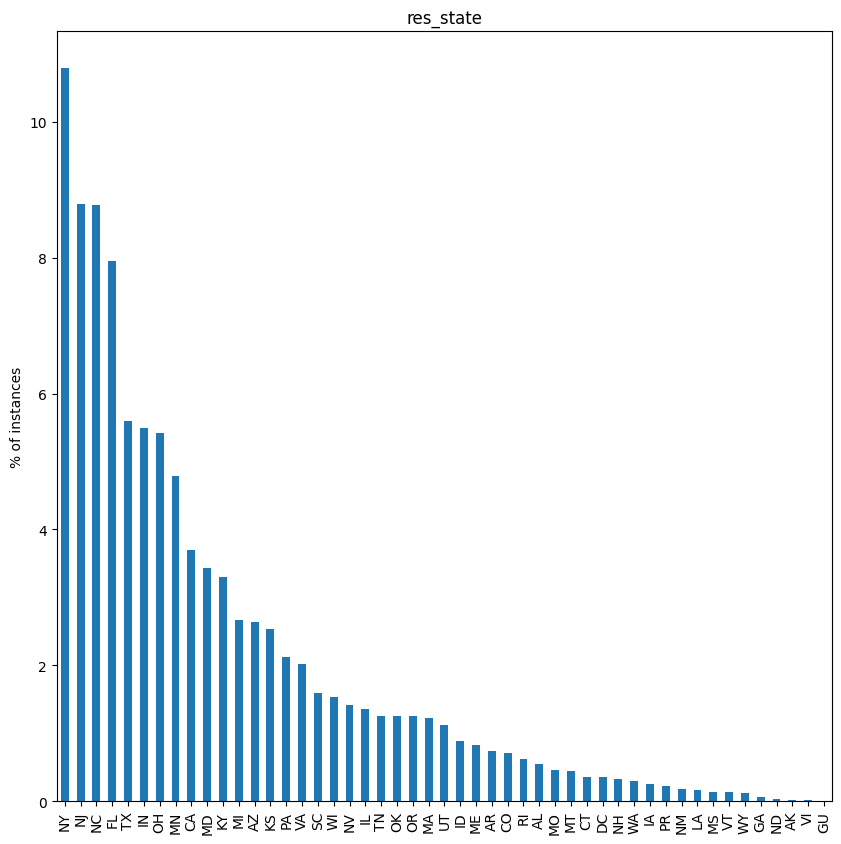

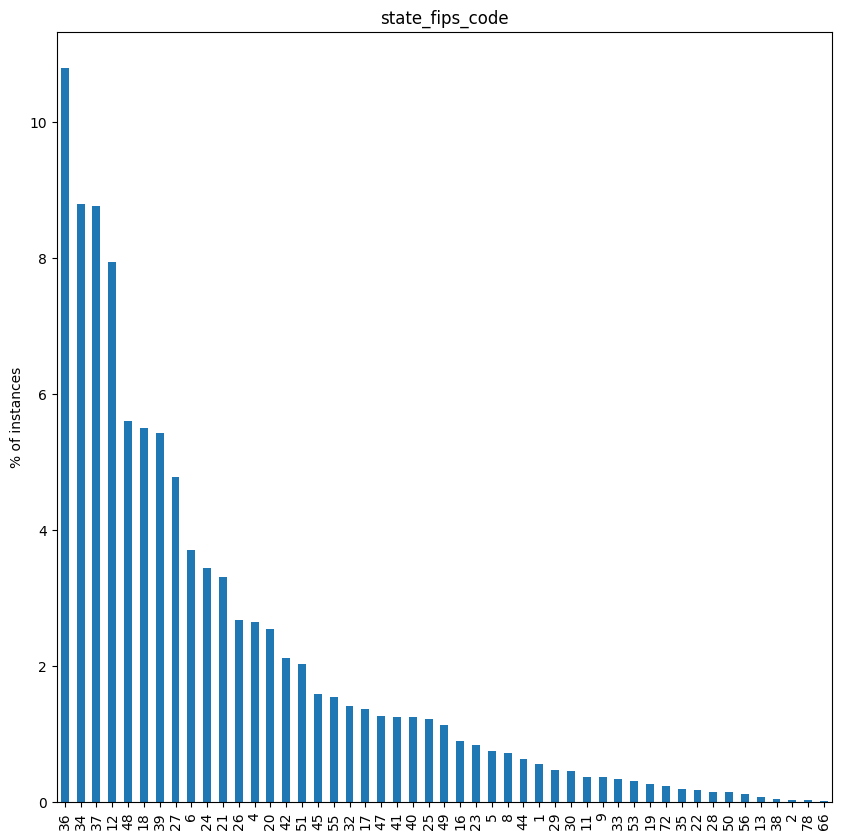

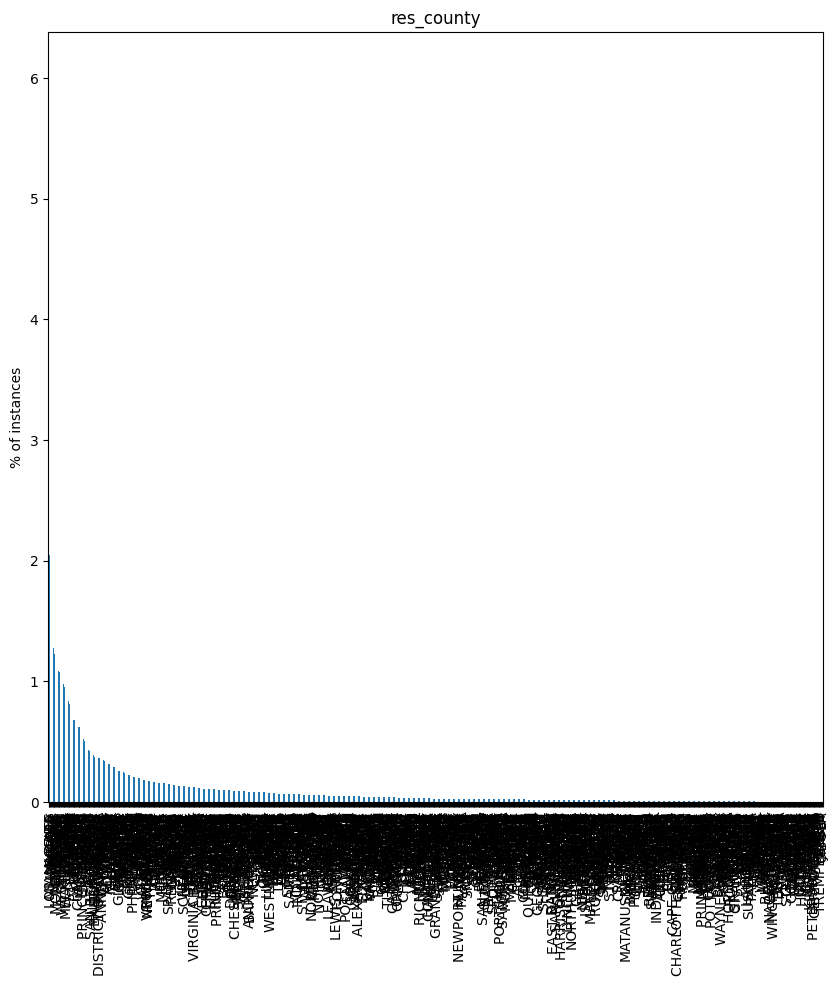

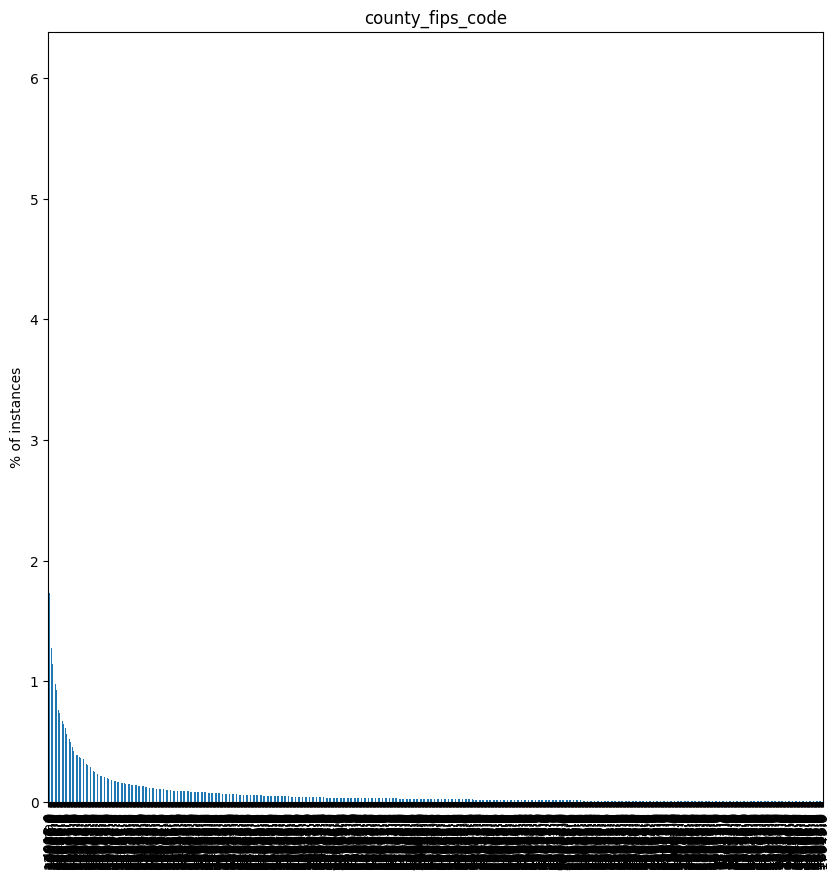

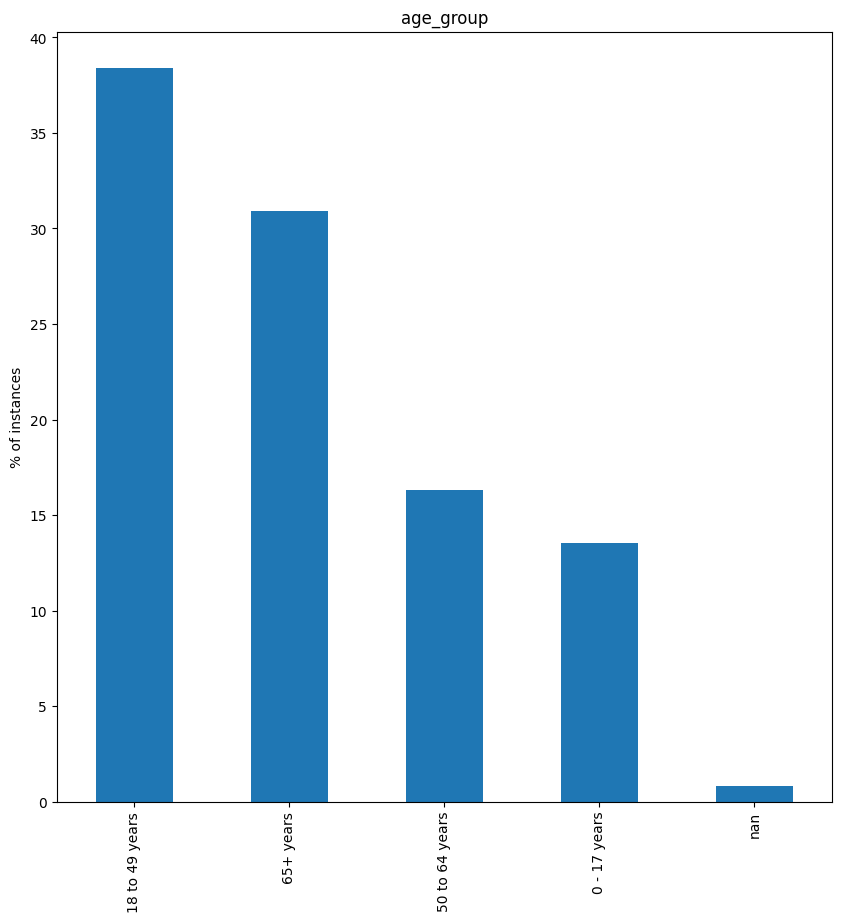

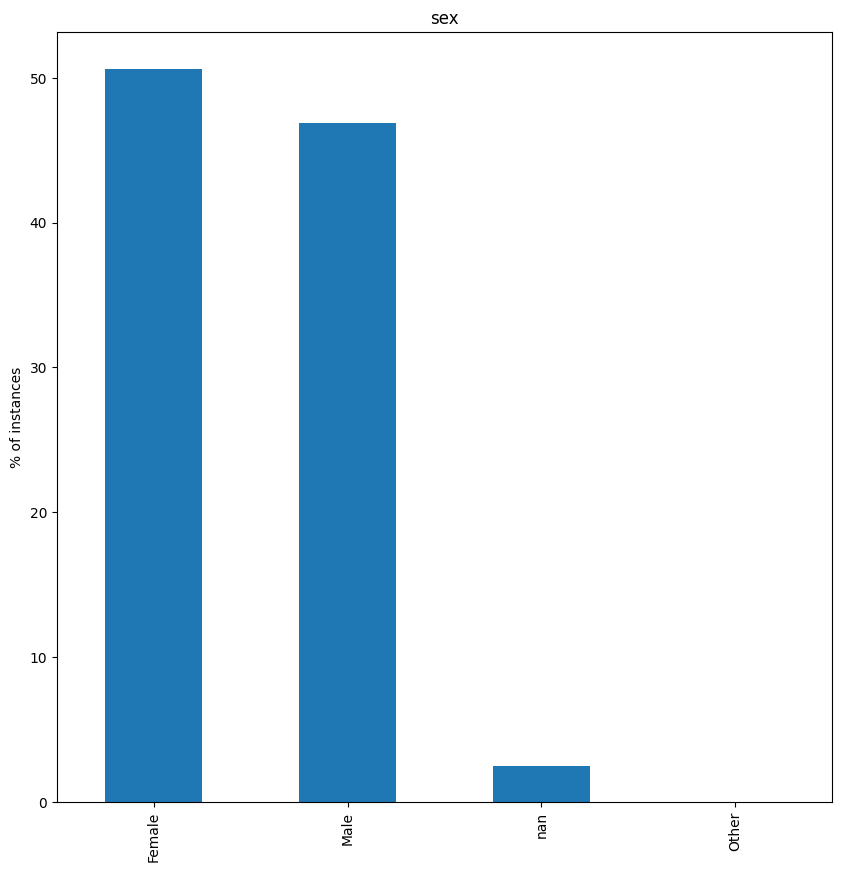

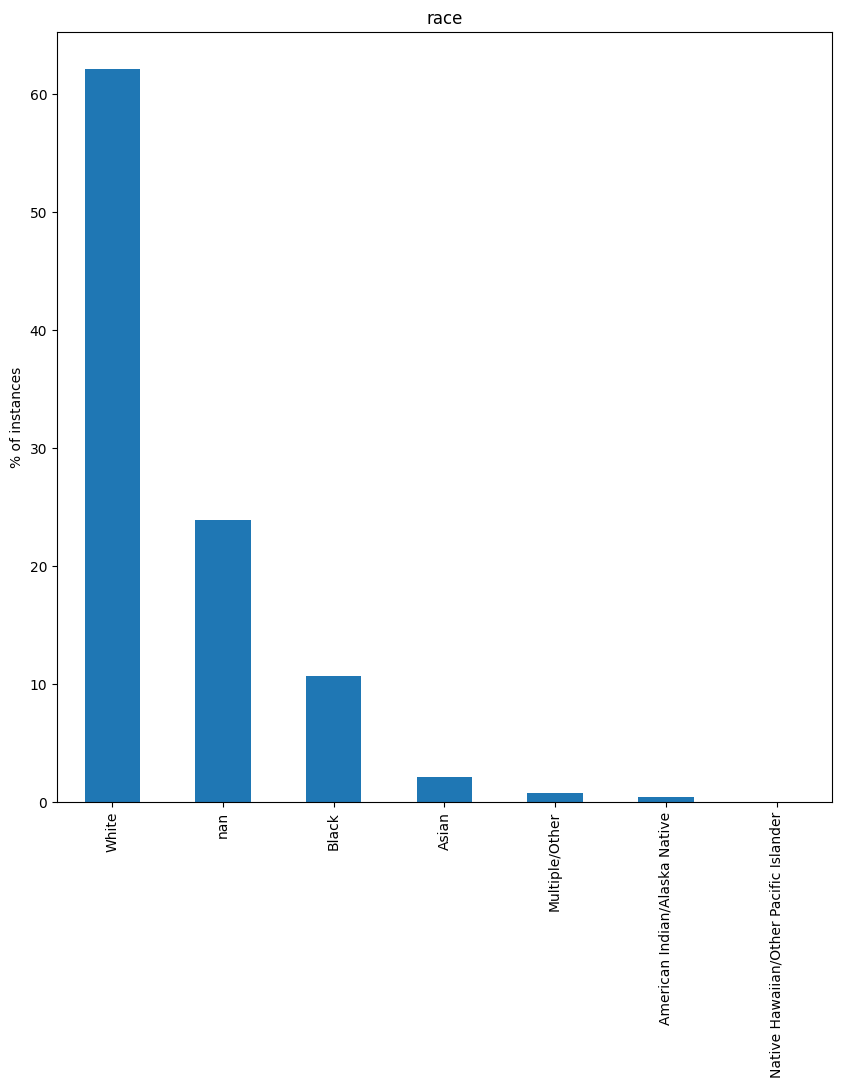

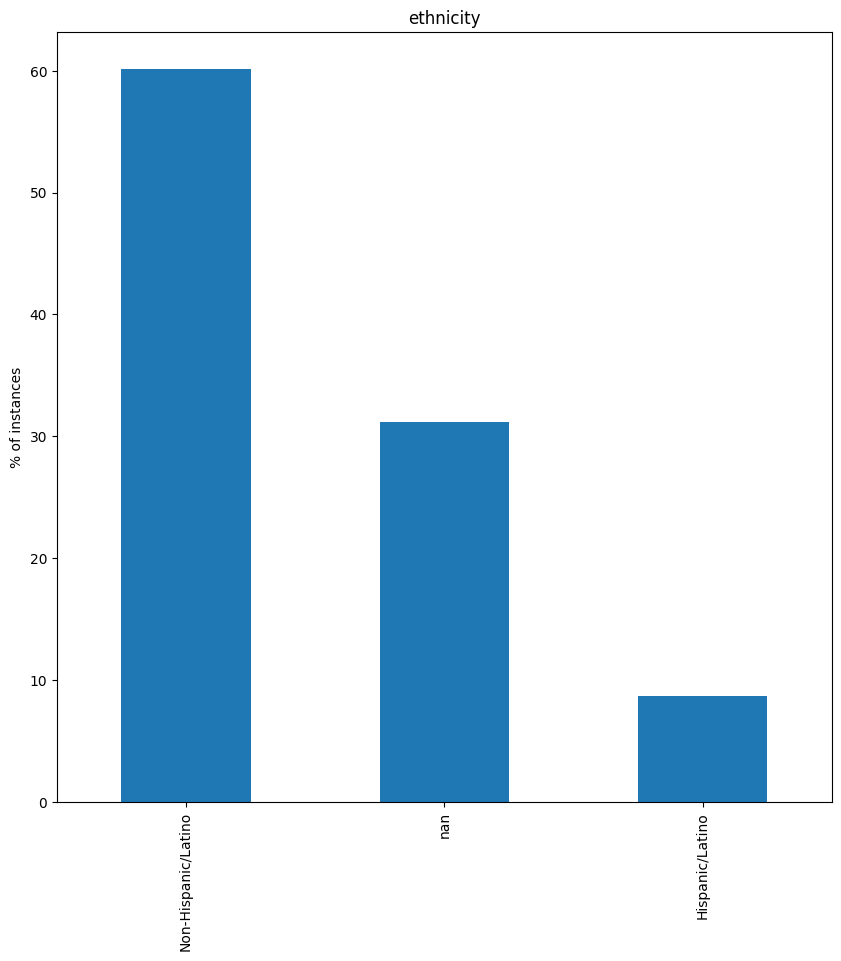

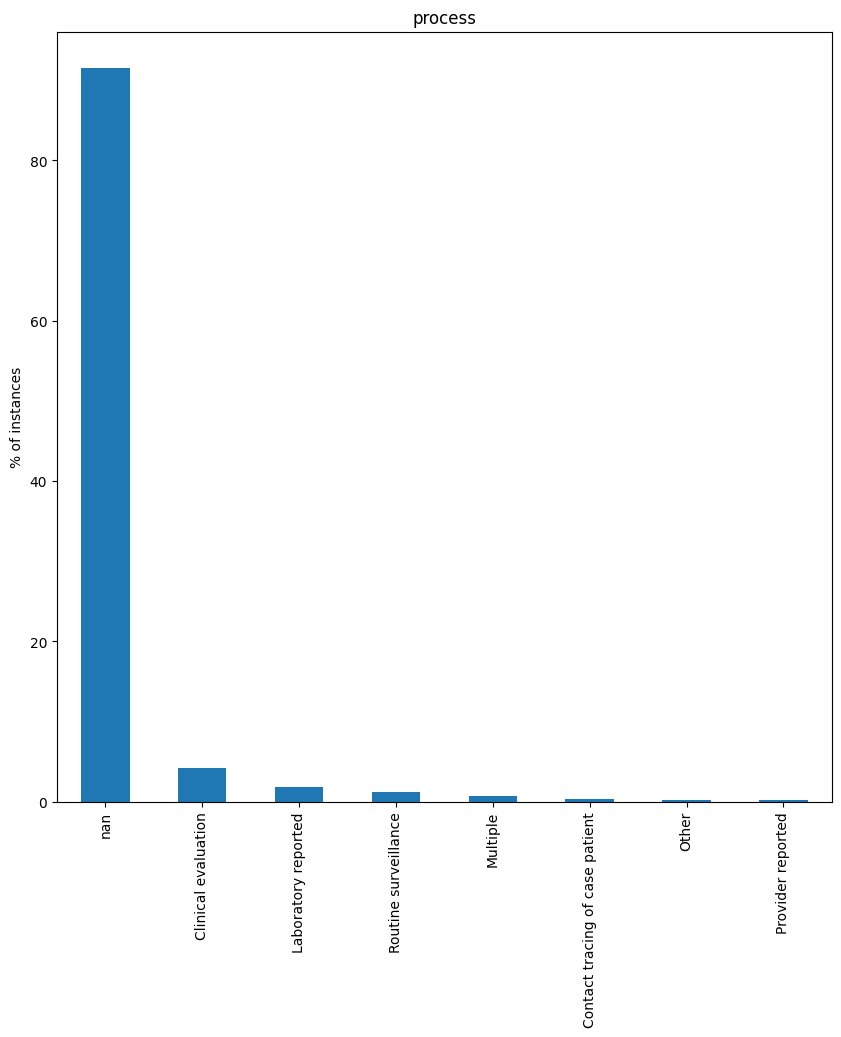

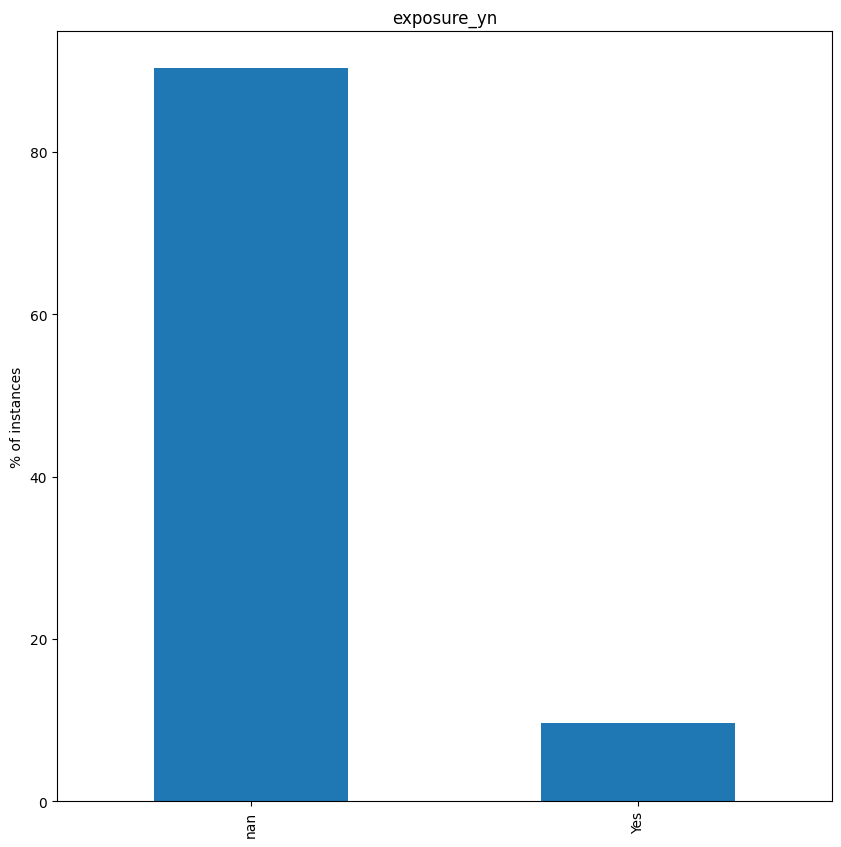

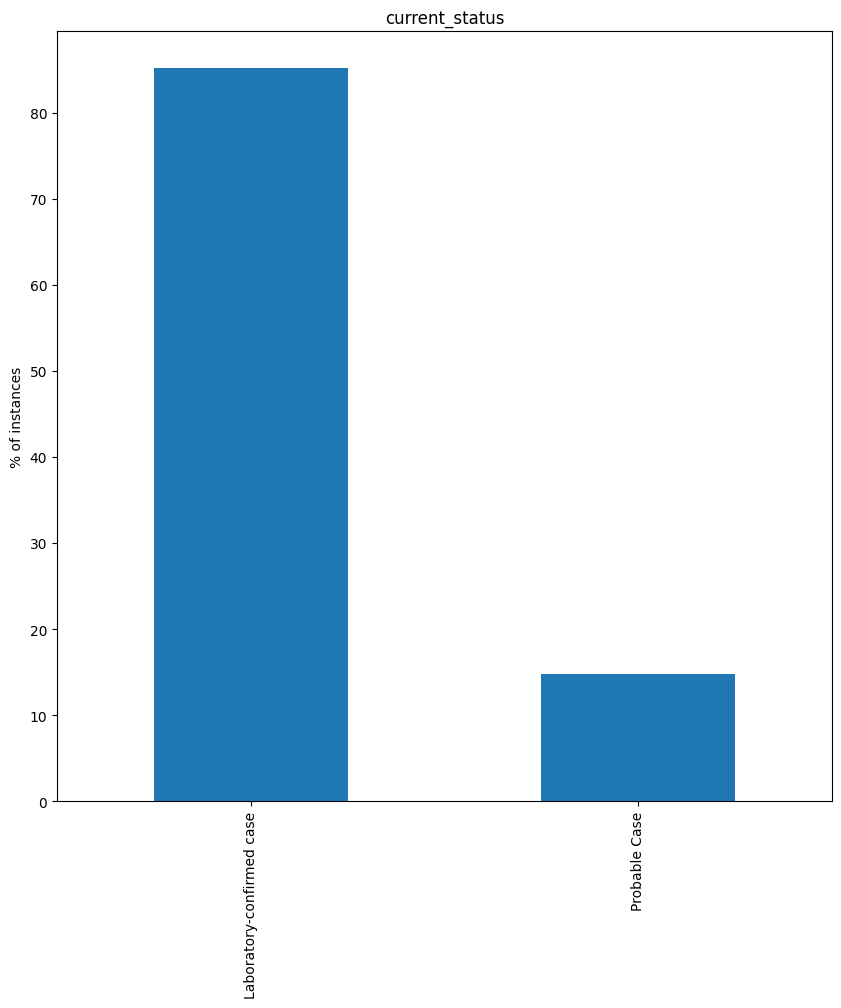

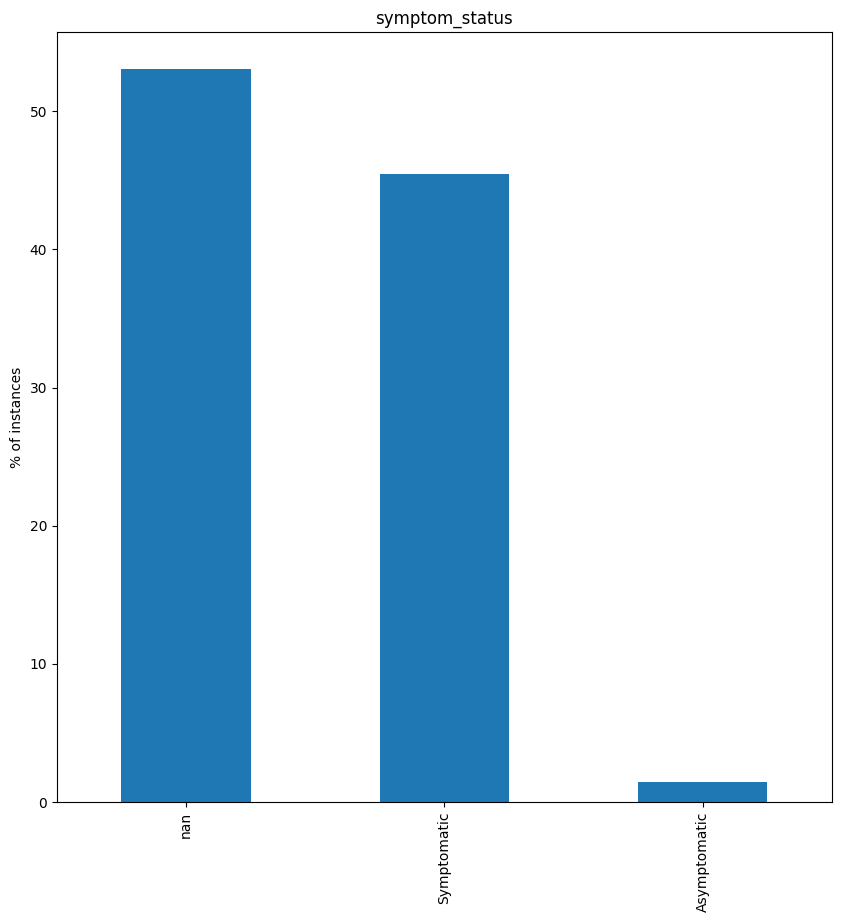

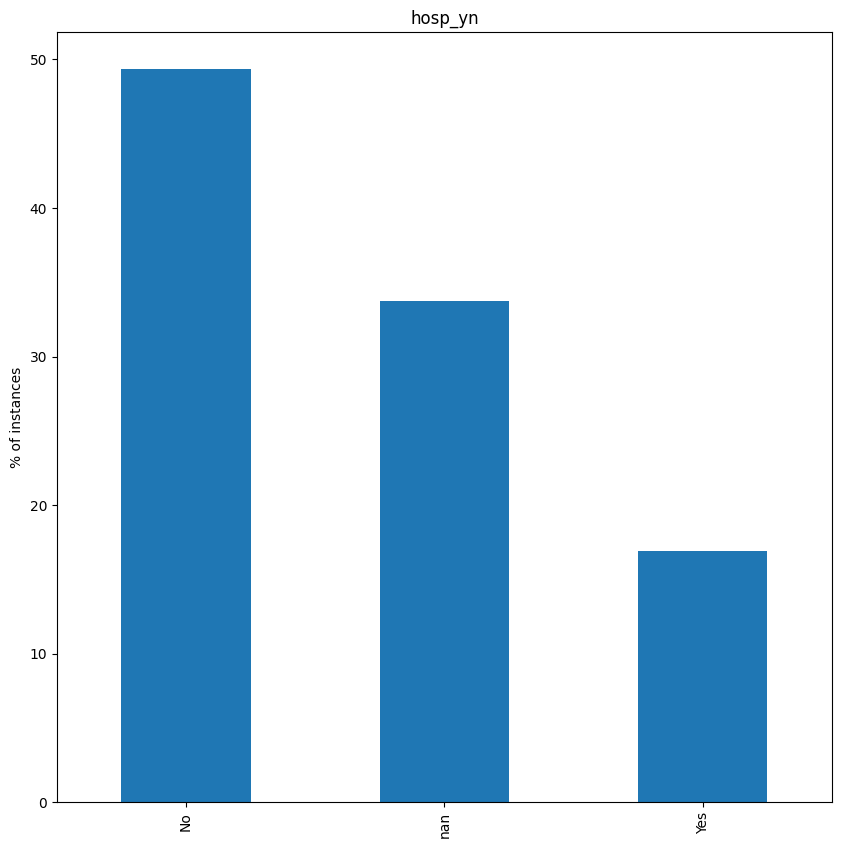

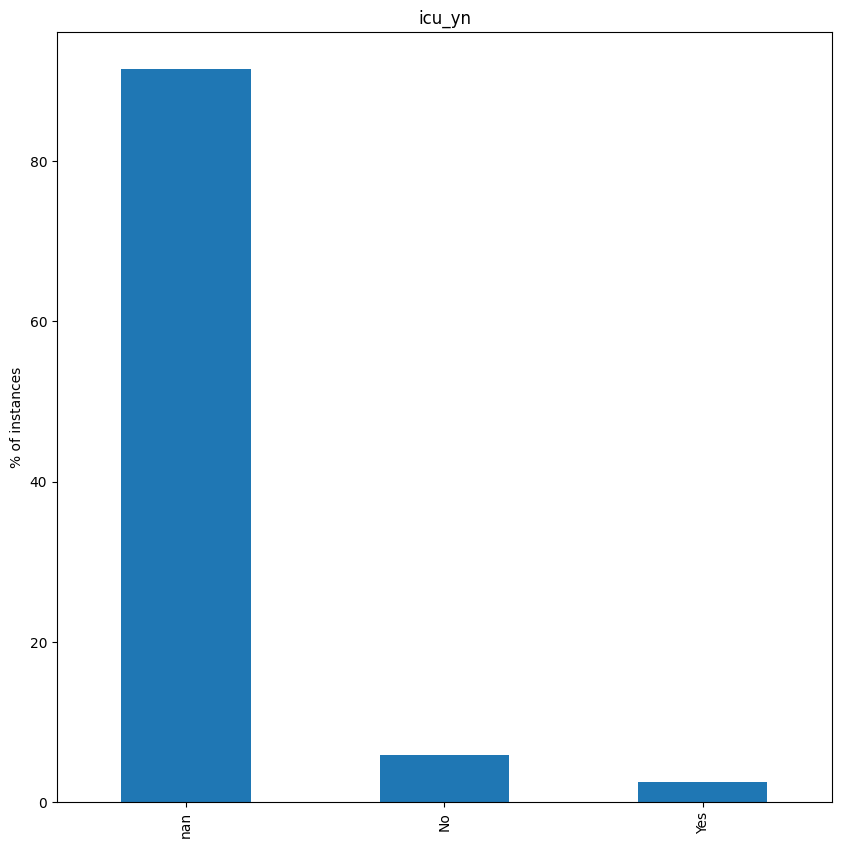

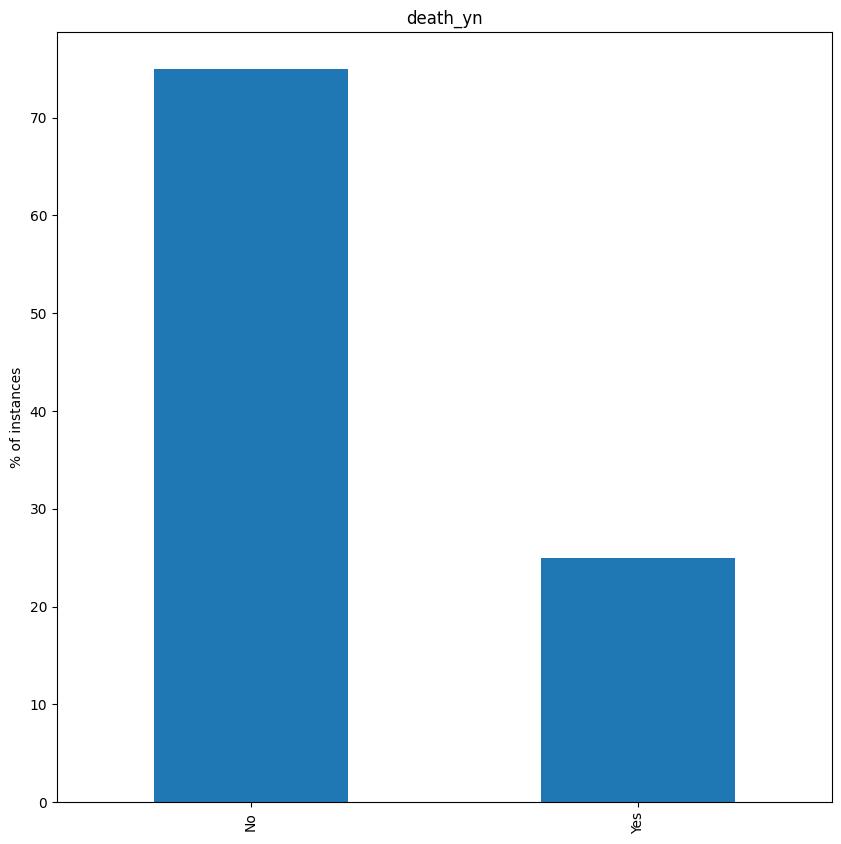

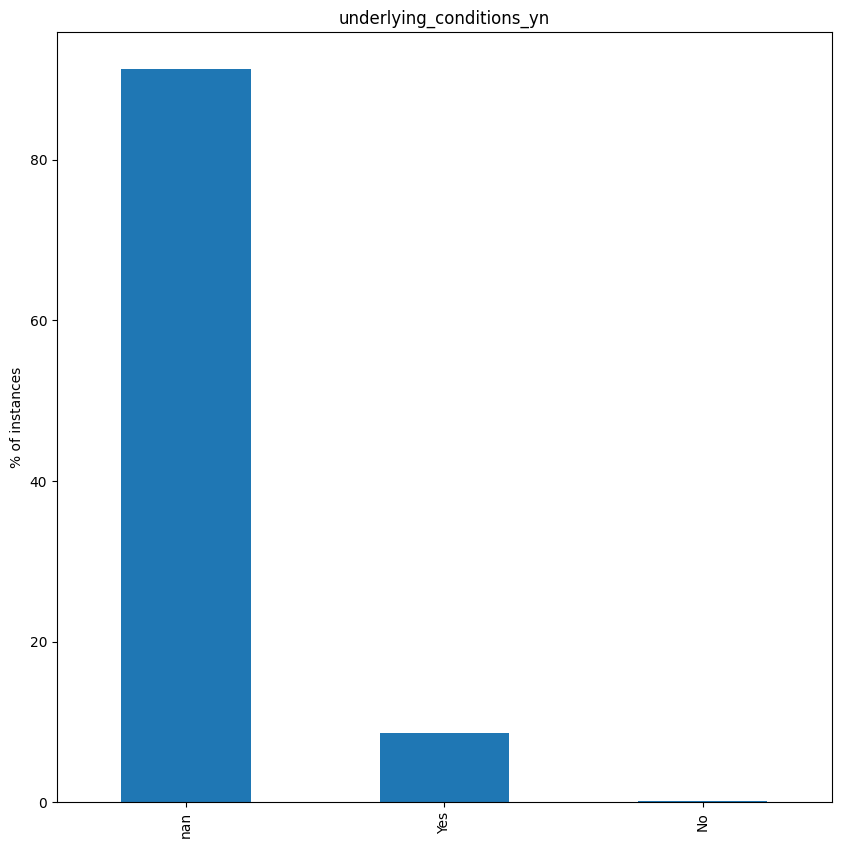

In [36]:
# for each categorical column display the feature in a barplot as a percentage
for column in category_columns:
        df_category_perc = (df[column].value_counts(dropna=False)/df[column].shape[0])*100
        df_category_perc.plot(kind='bar', figsize=(10,10))
        plt.title(column)
        plt.ylabel('% of instances')
        plt.savefig('categorical_barplot_'+column+'_1-1.png')
        plt.show()

In the above charts, the county level data is too dense to display graphical, the below breaks down the county data by state as an %of instances per state

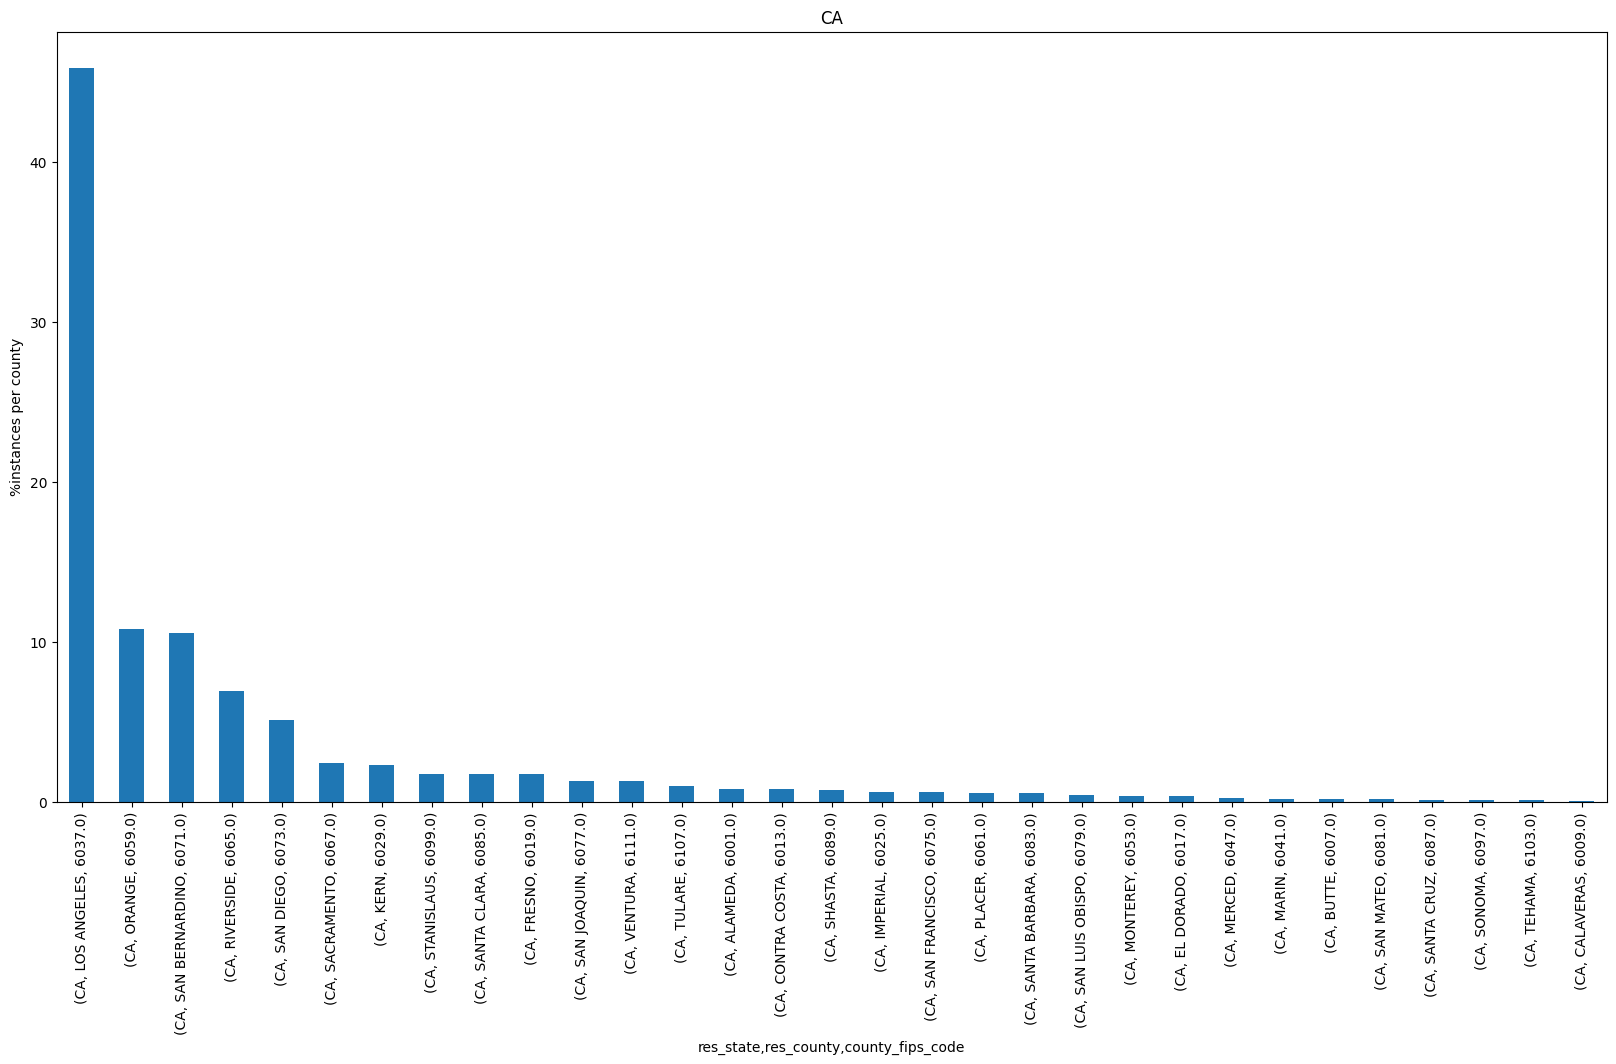

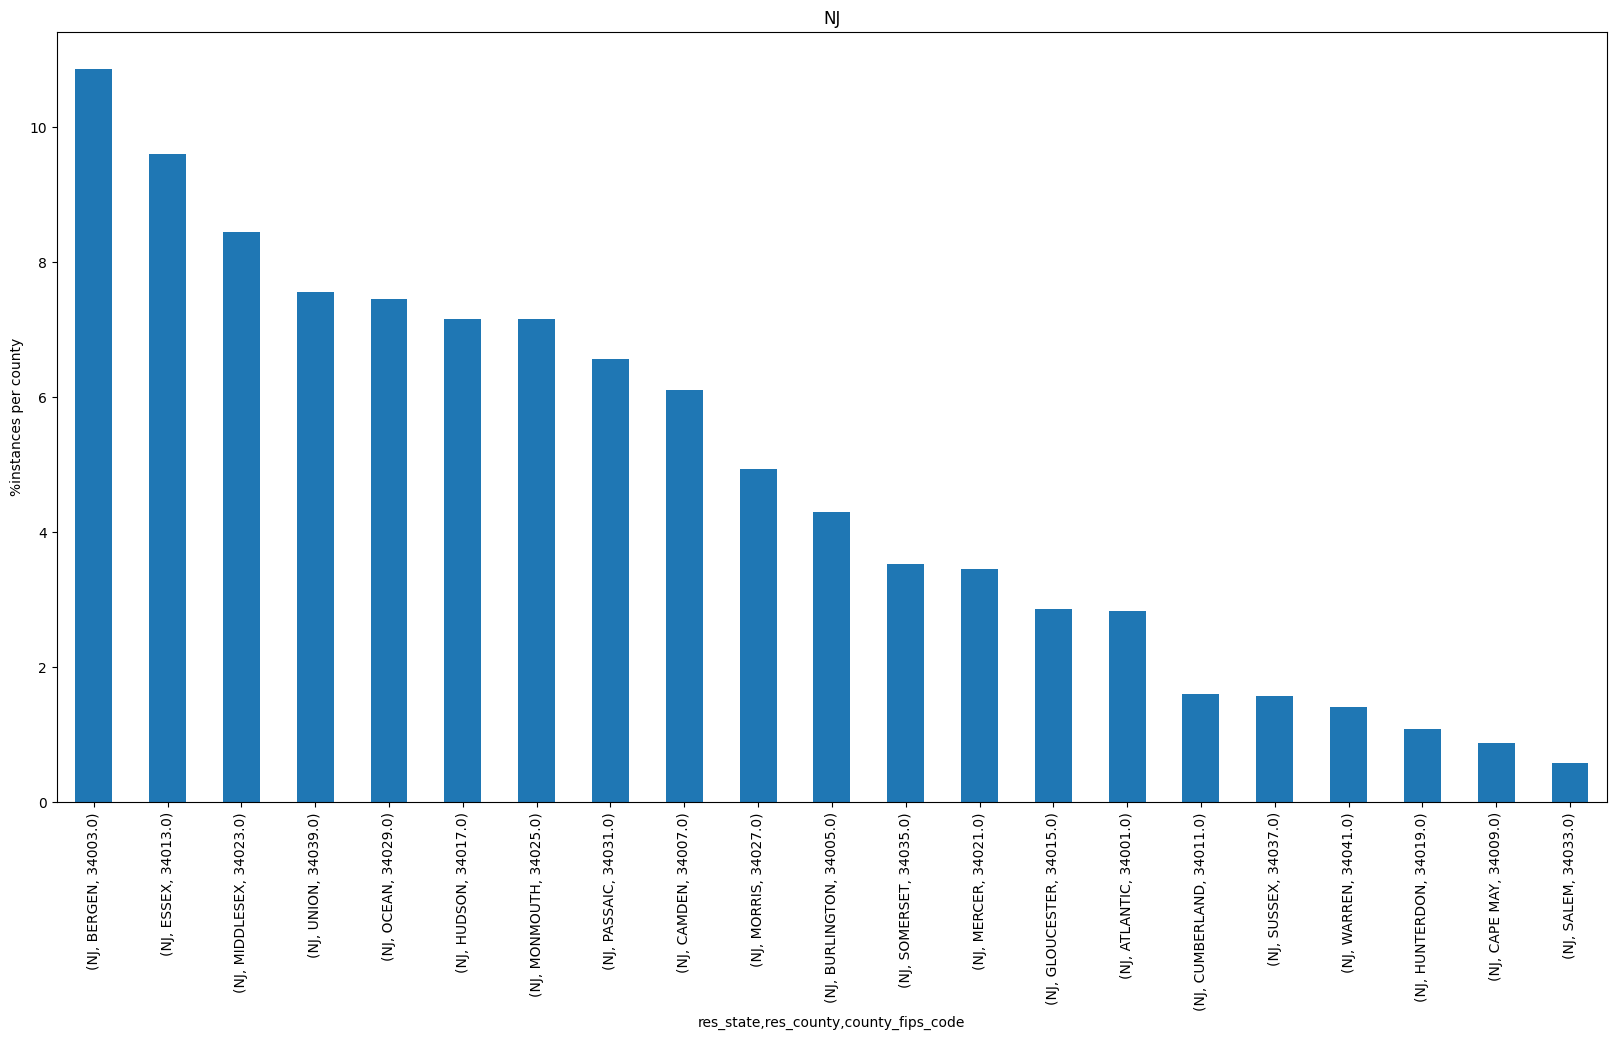

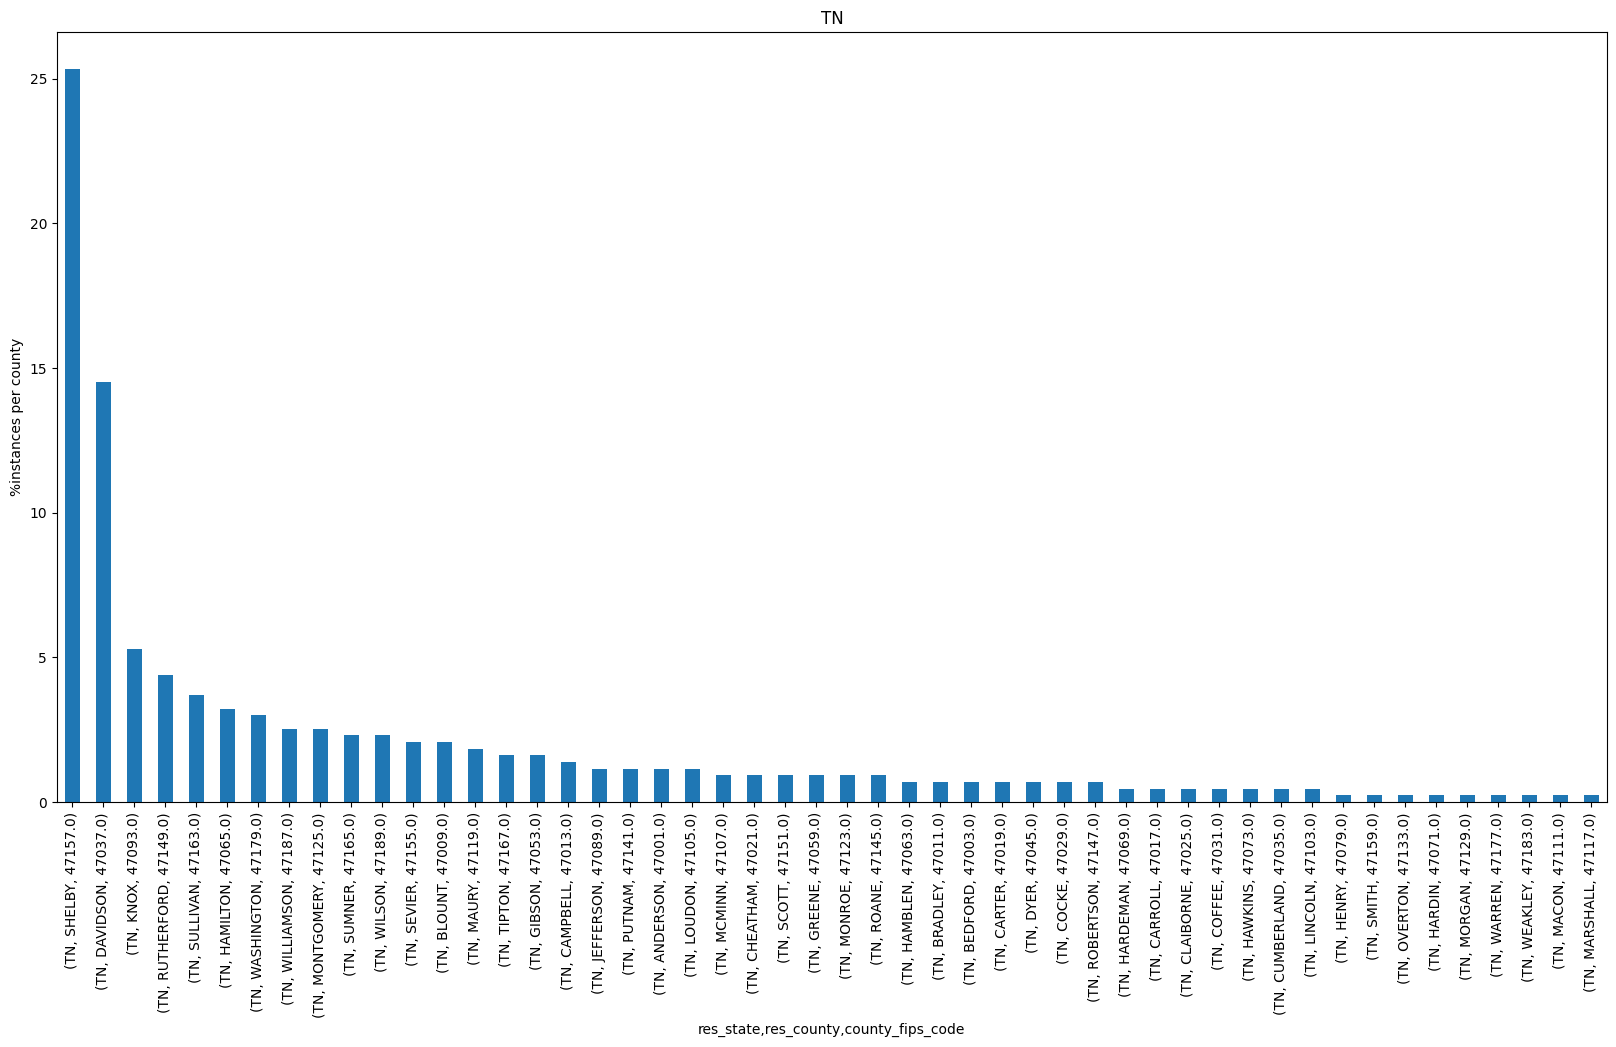

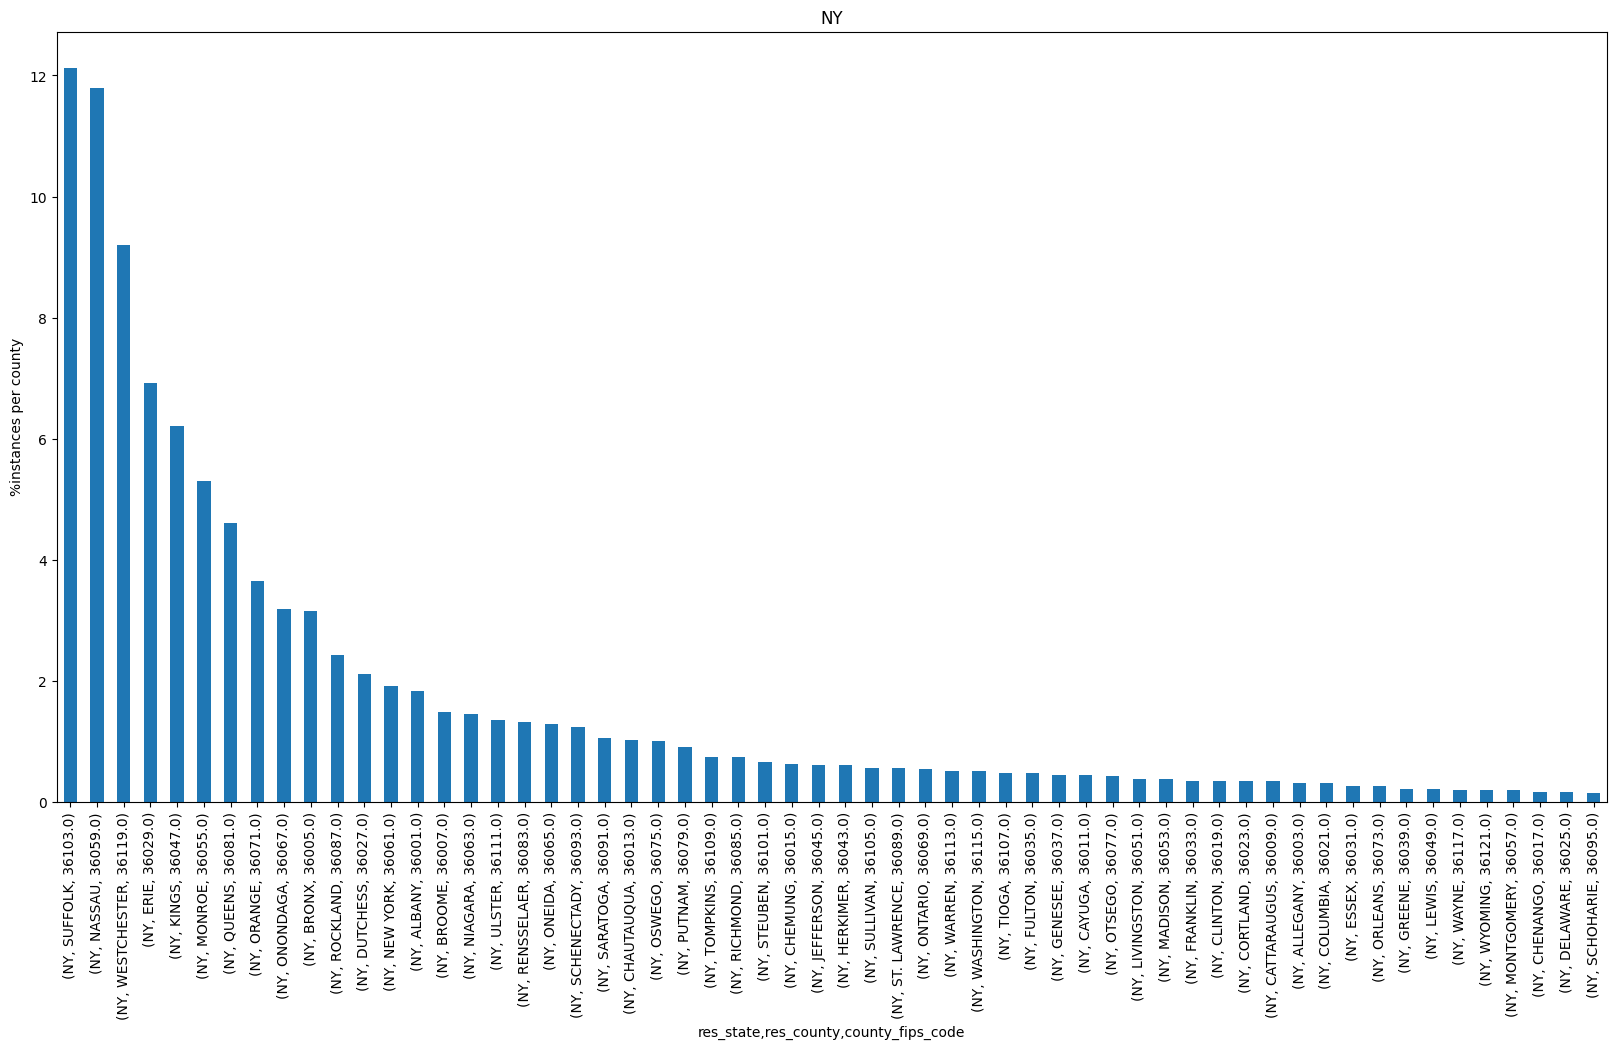

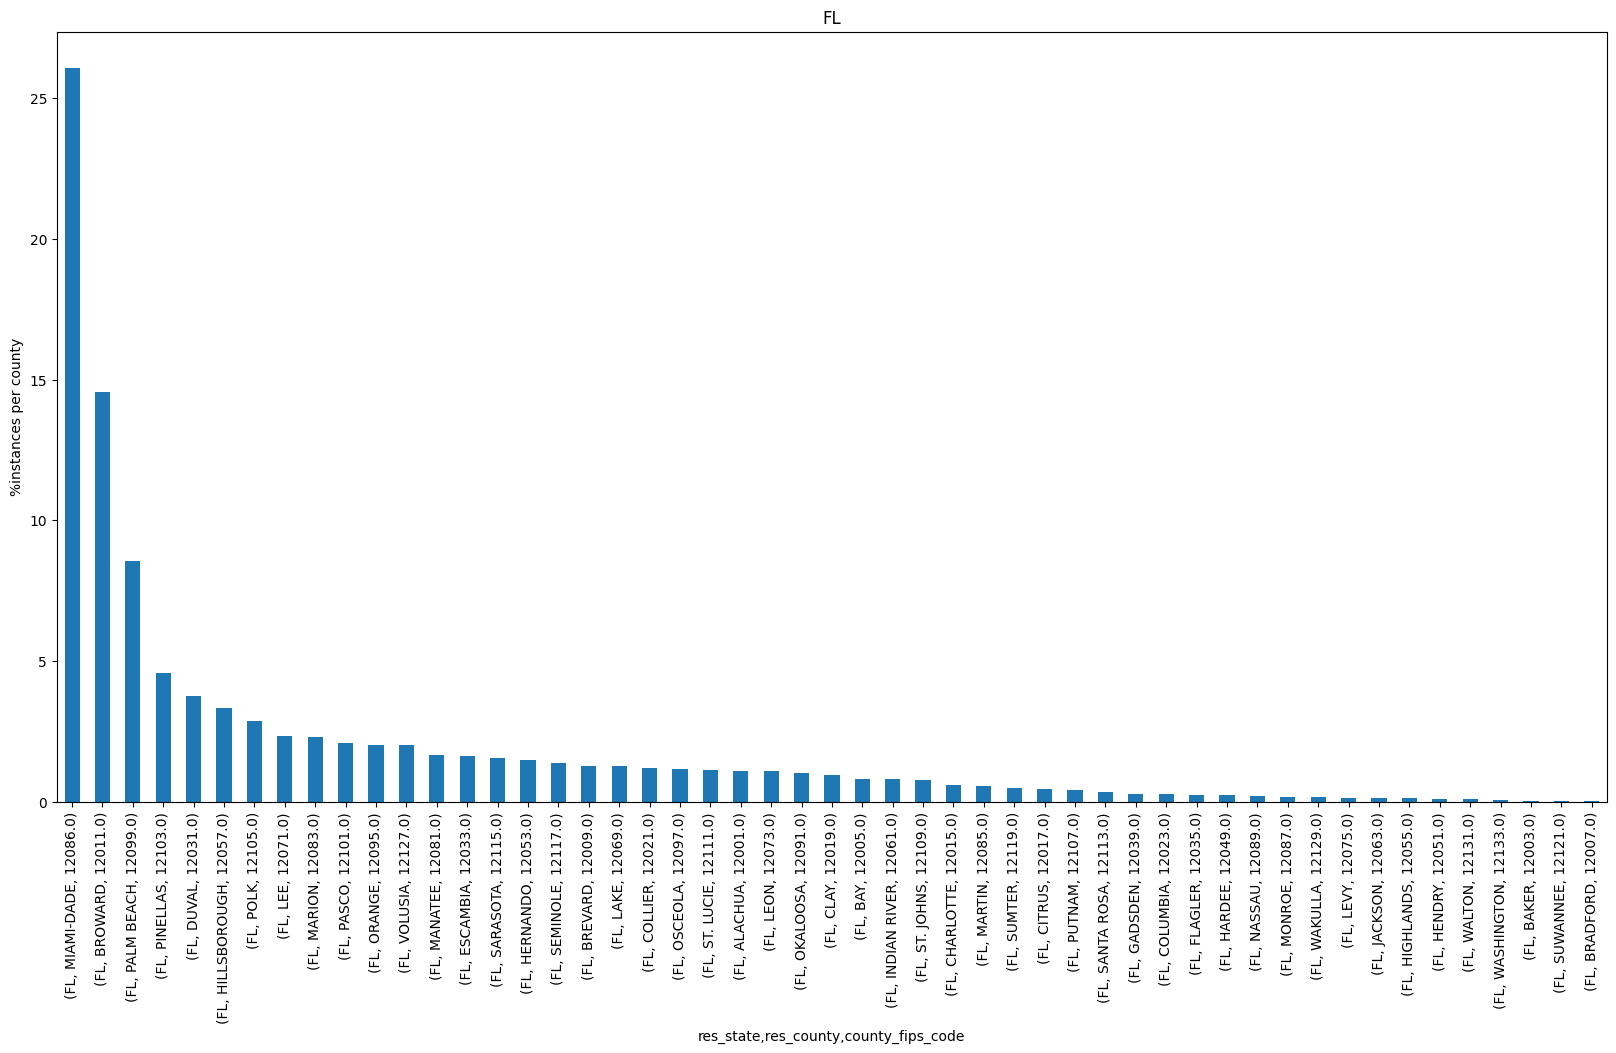

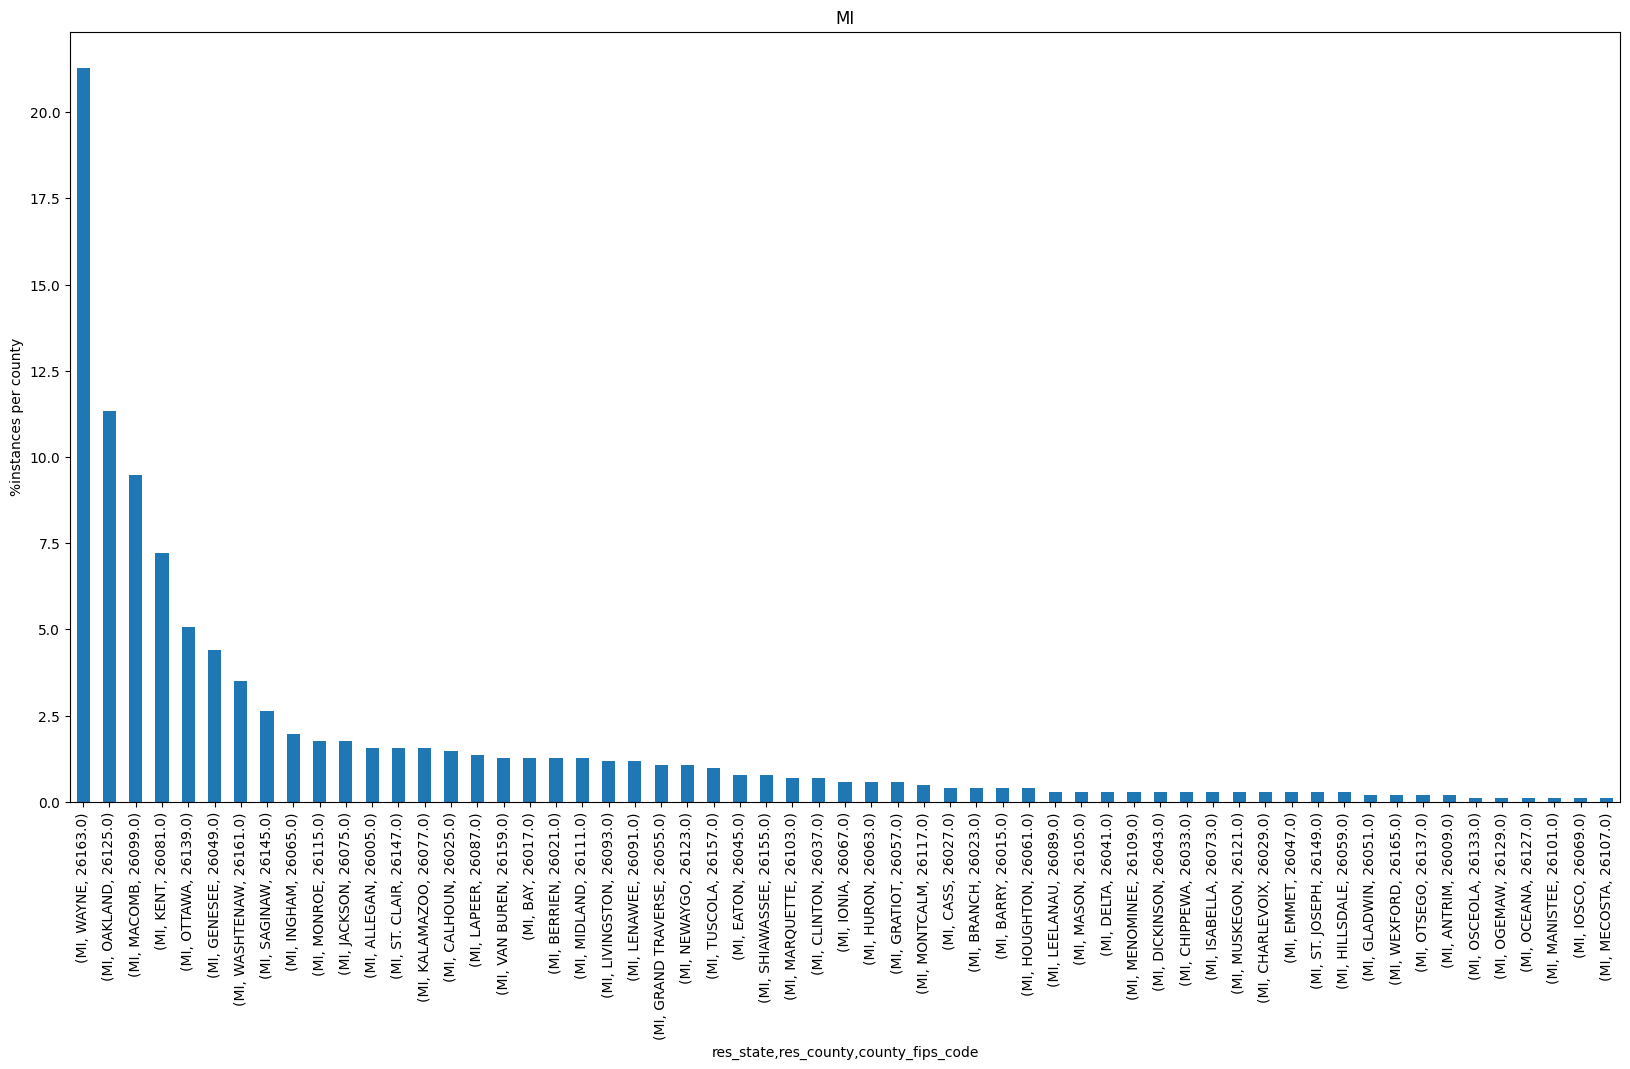

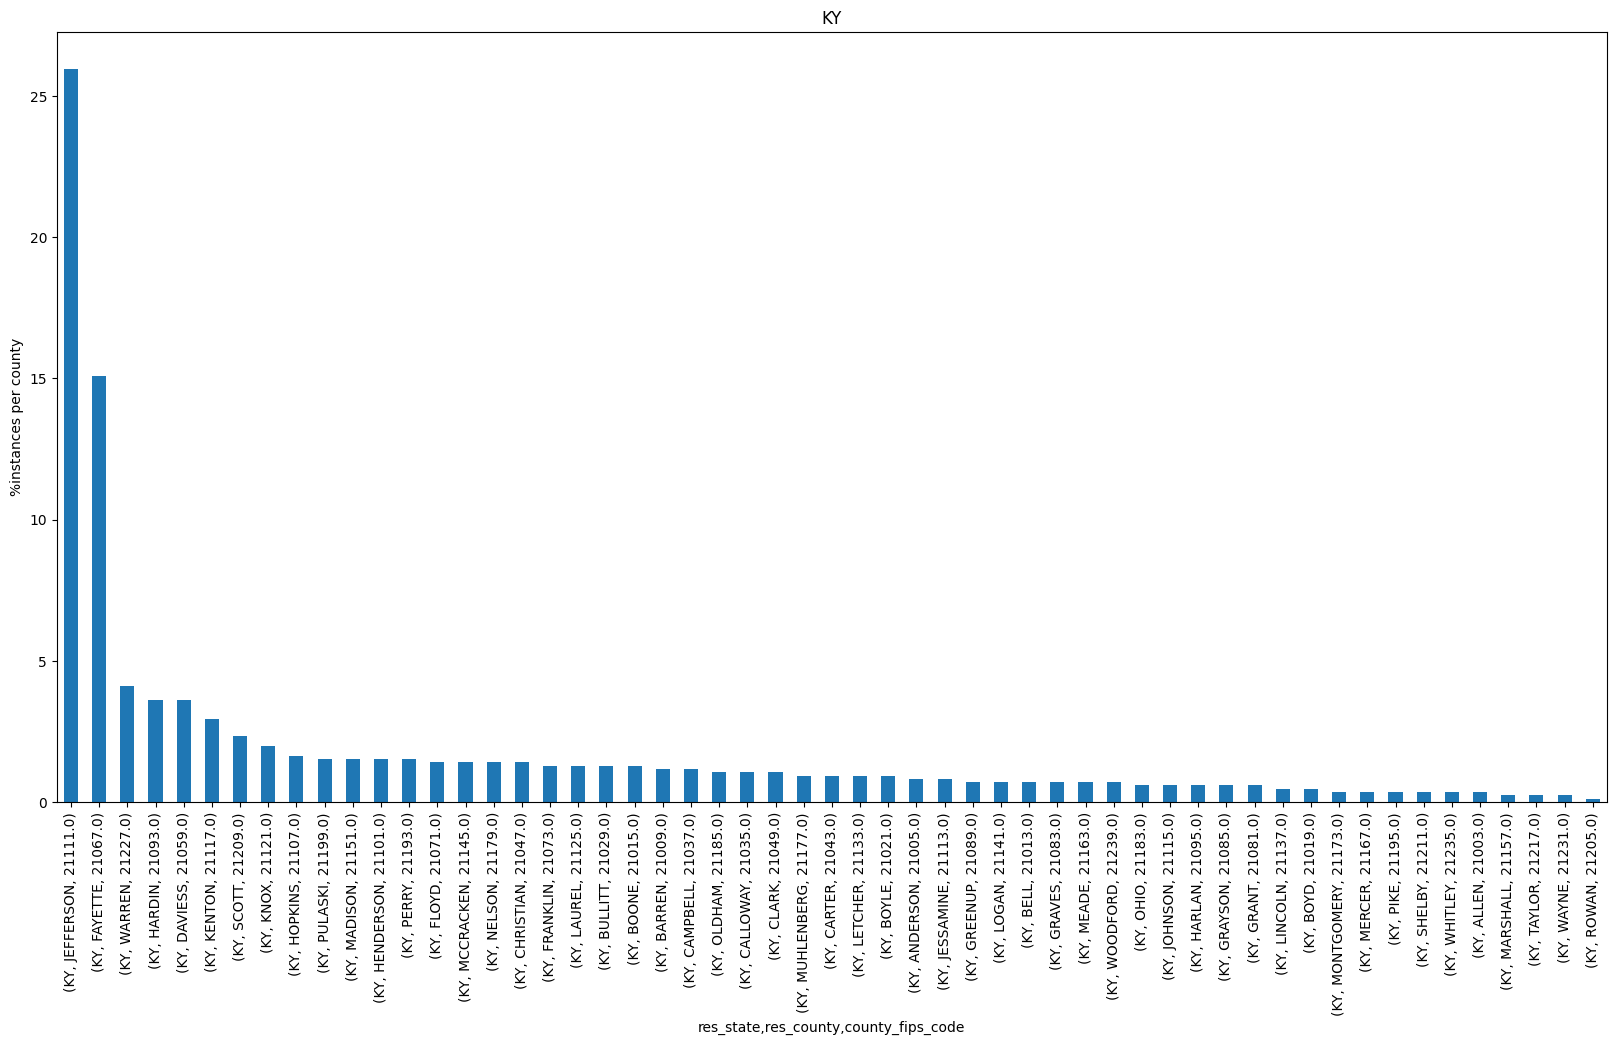

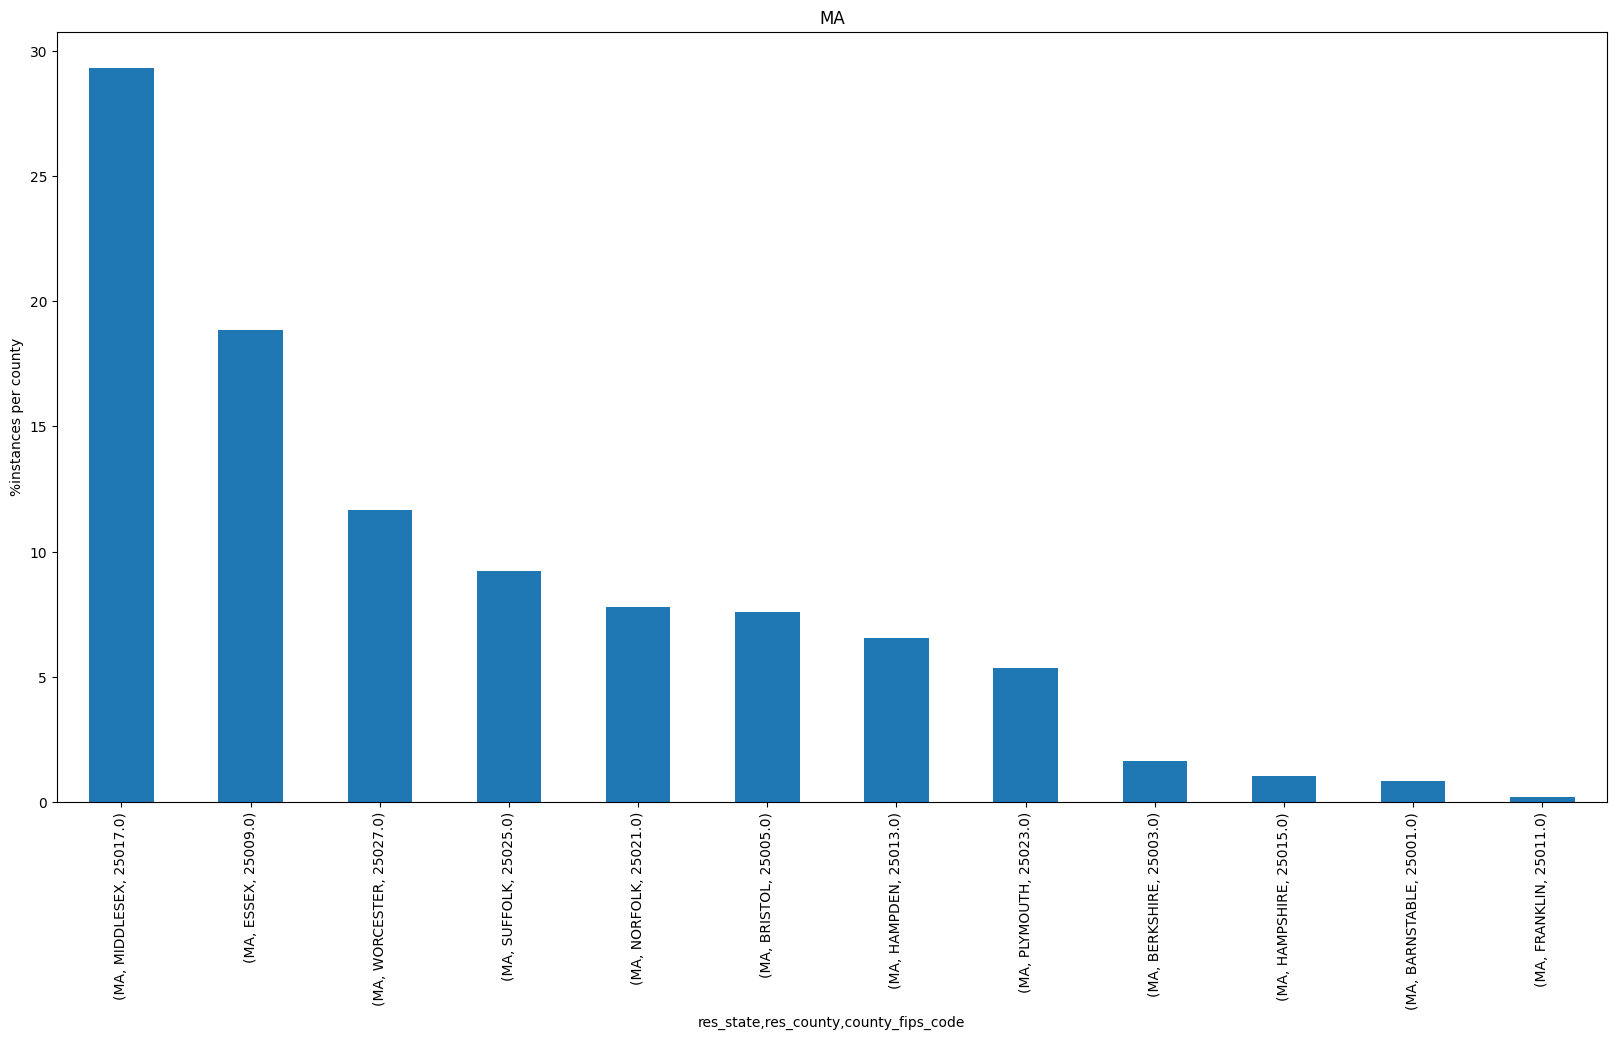

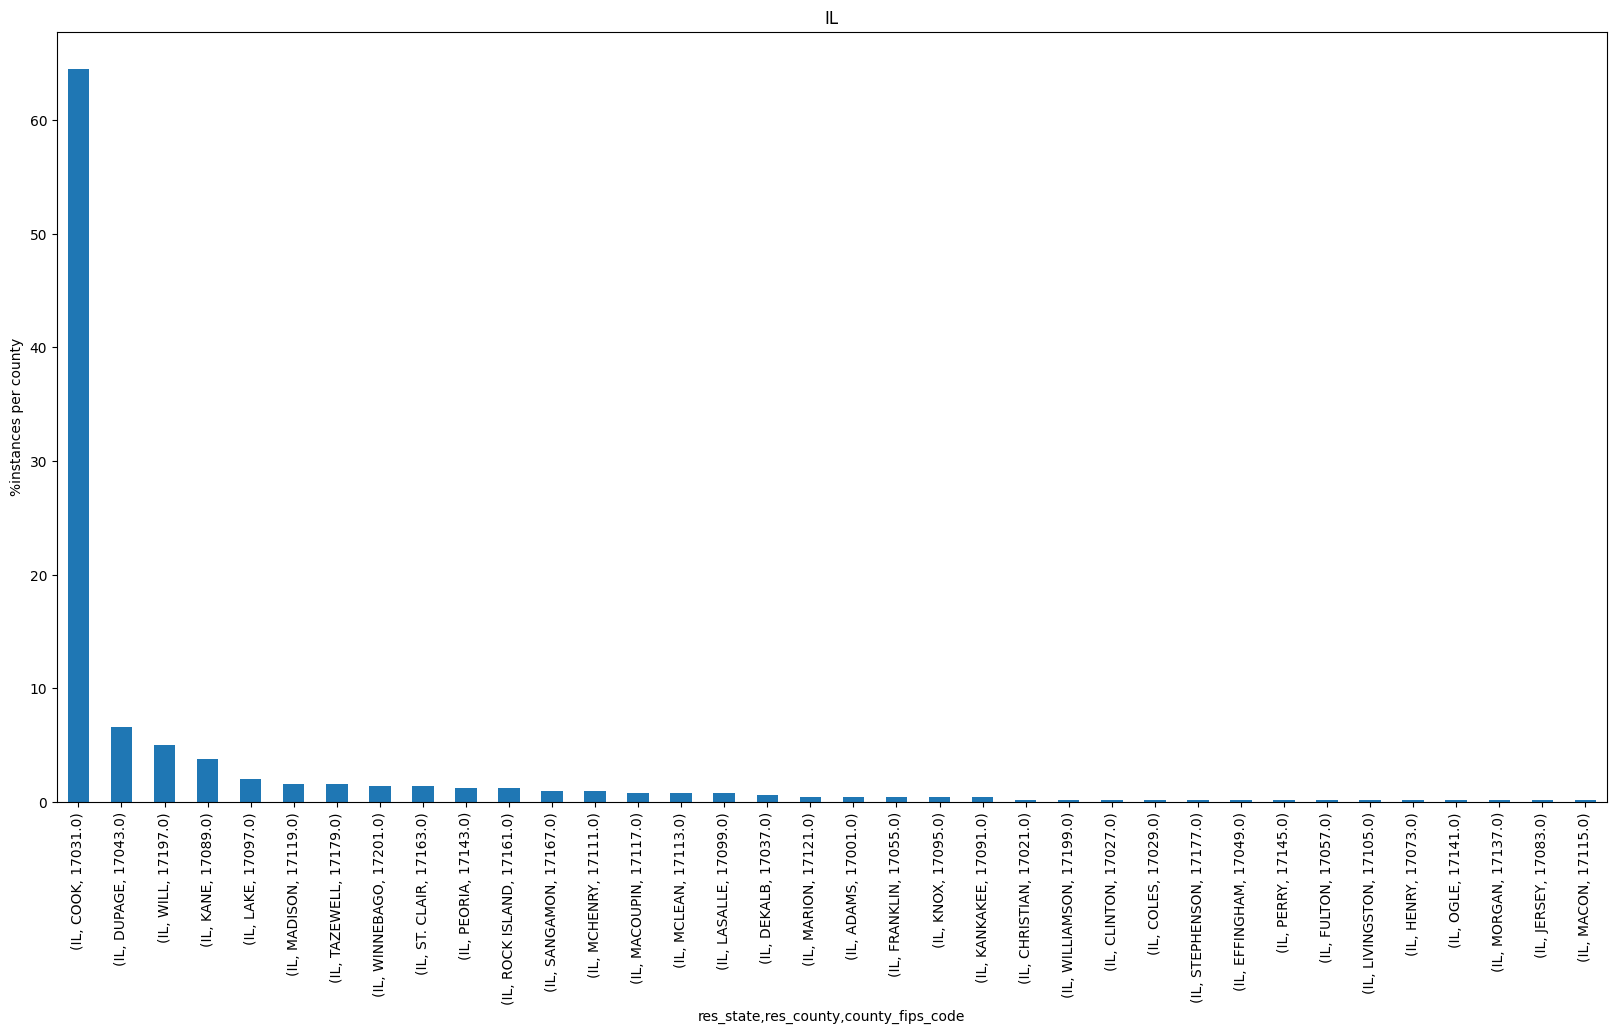

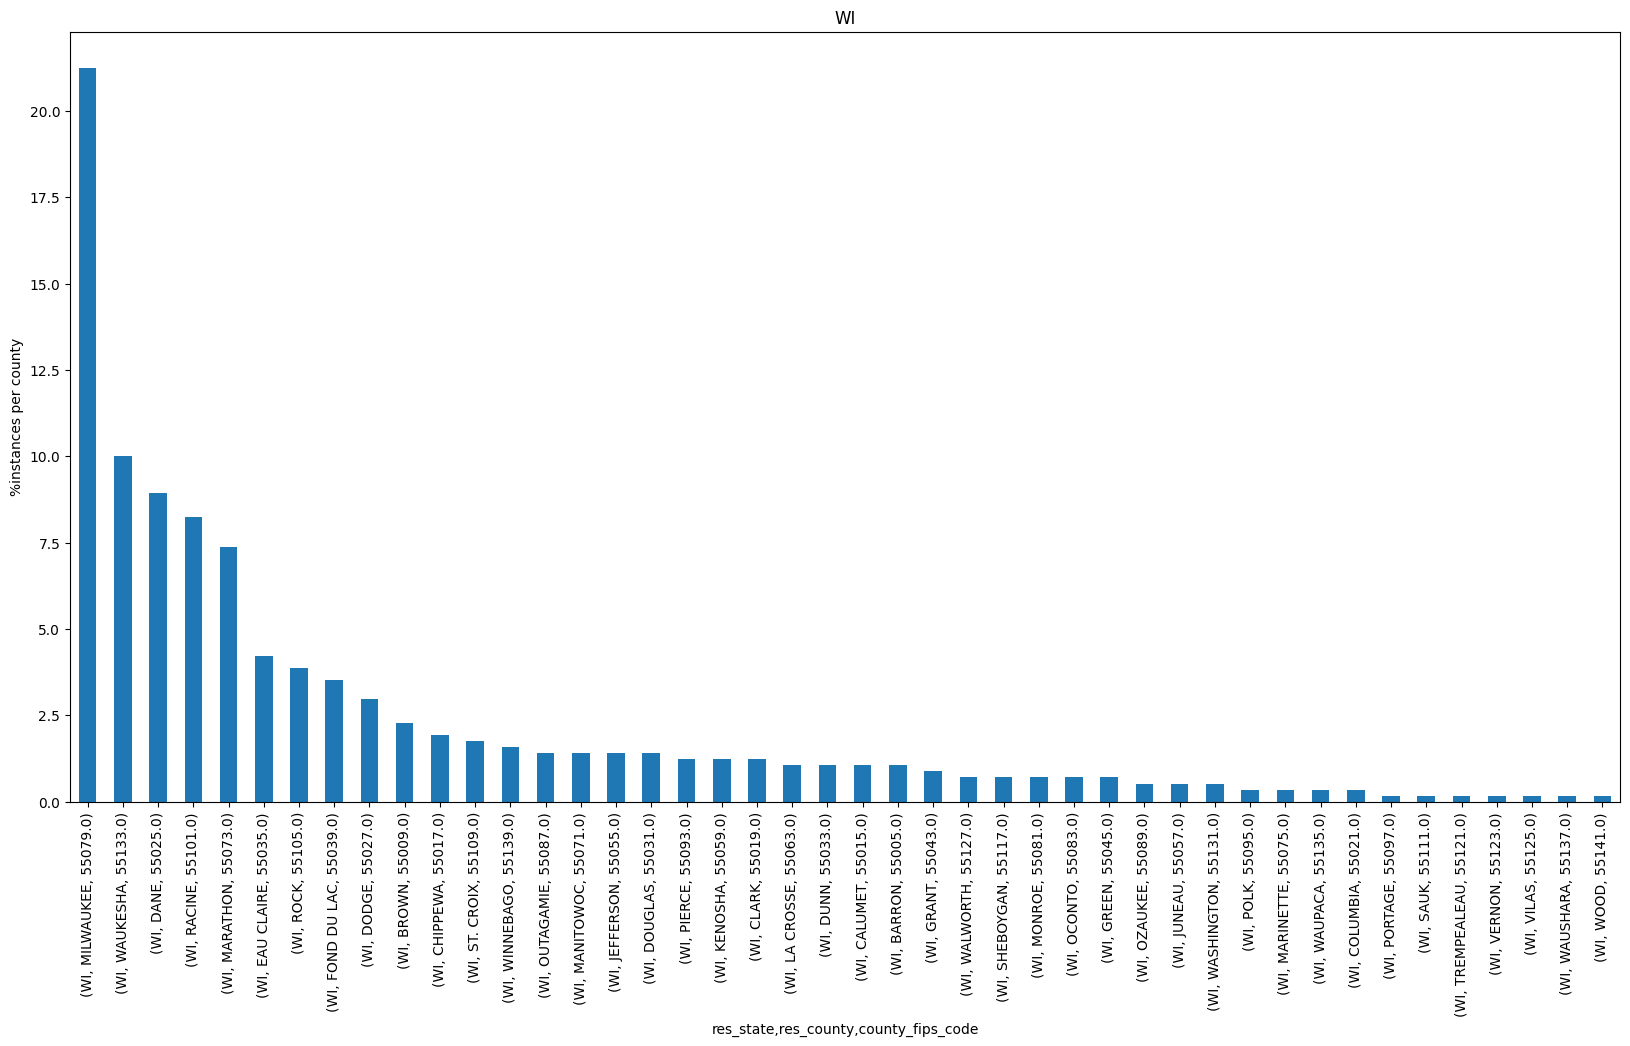

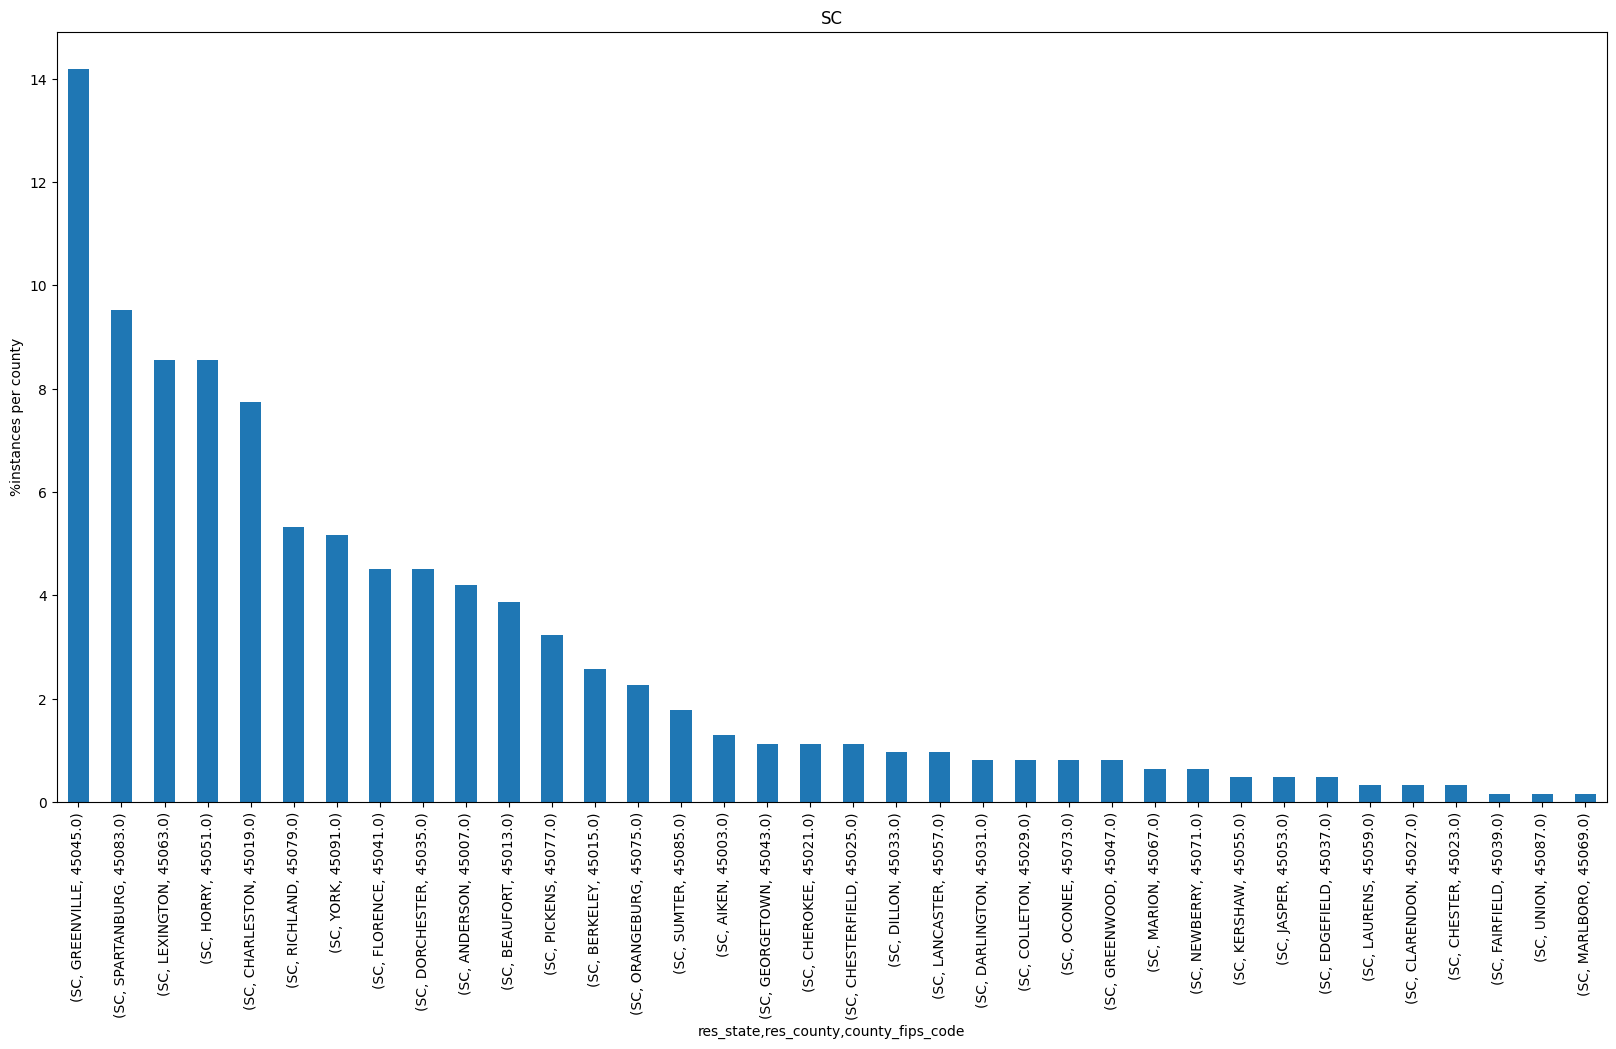

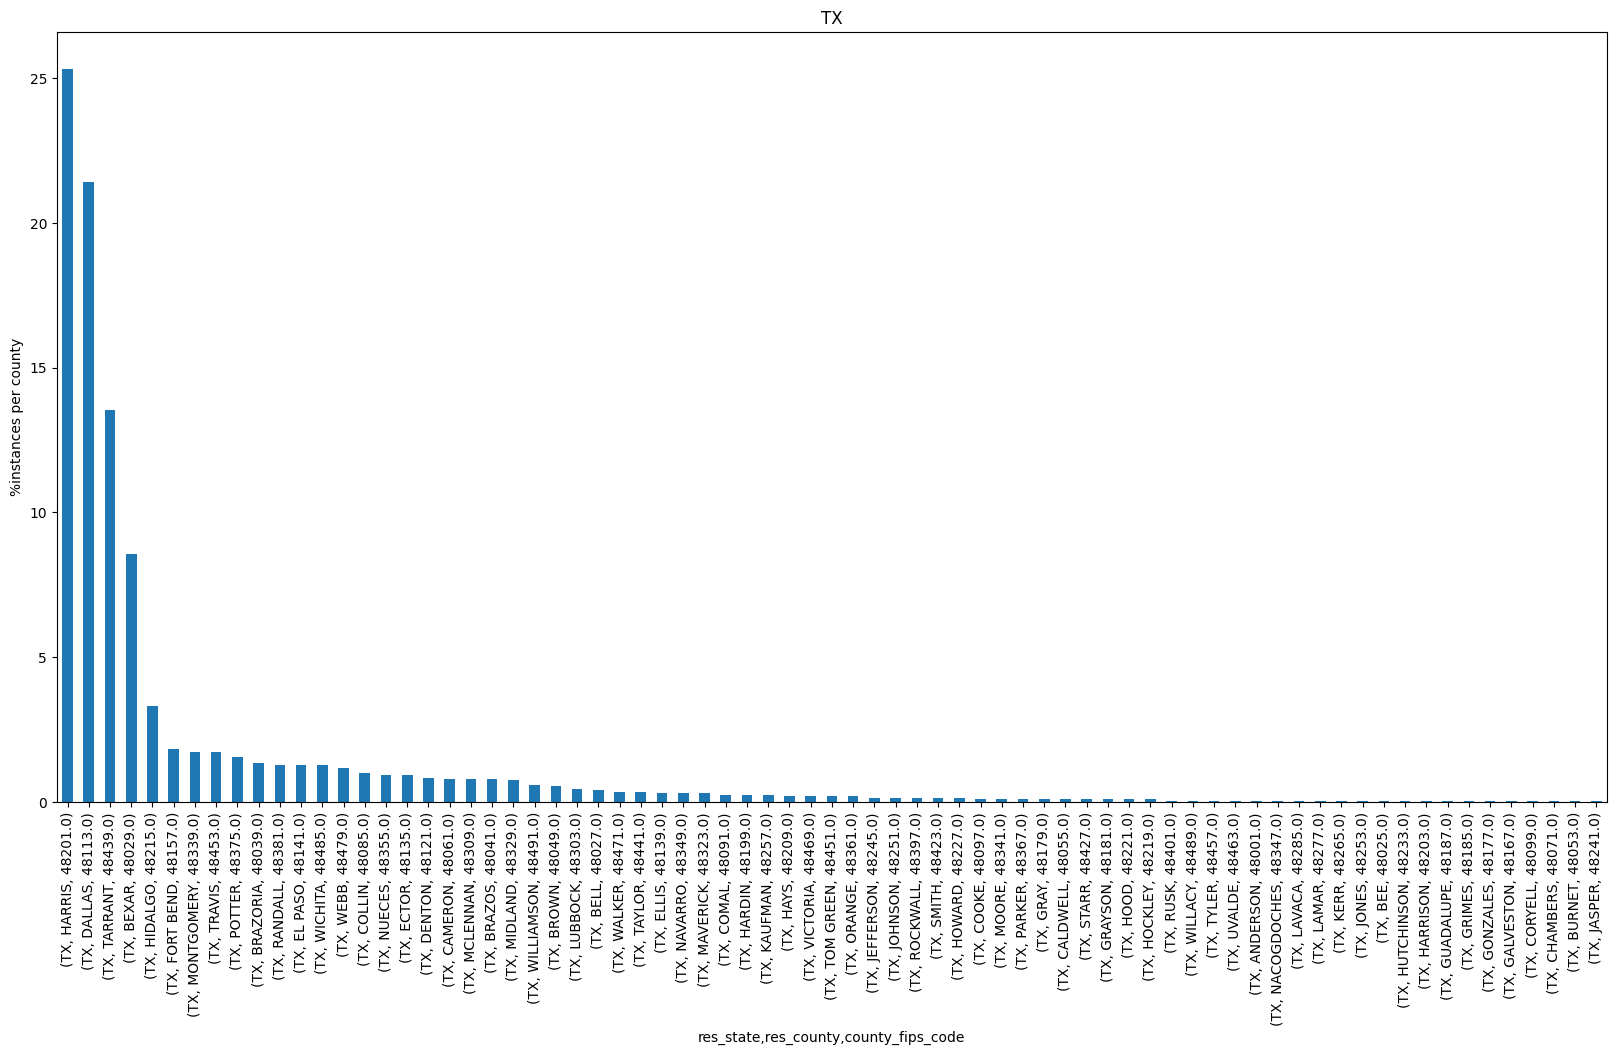

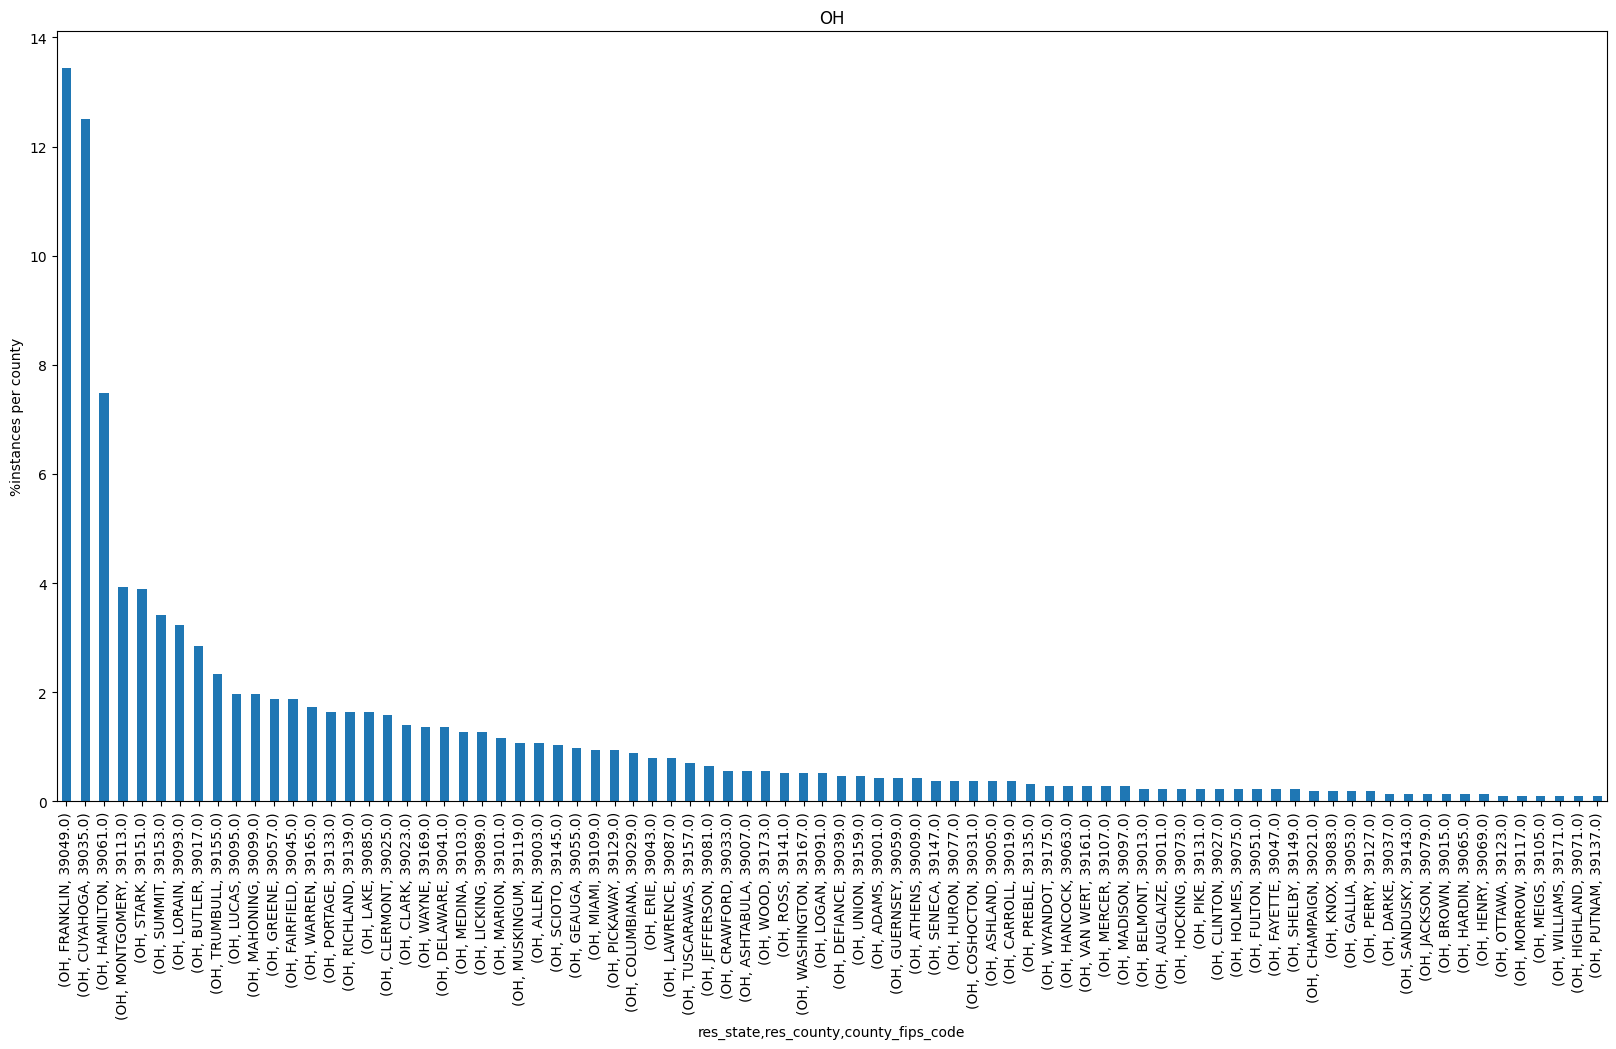

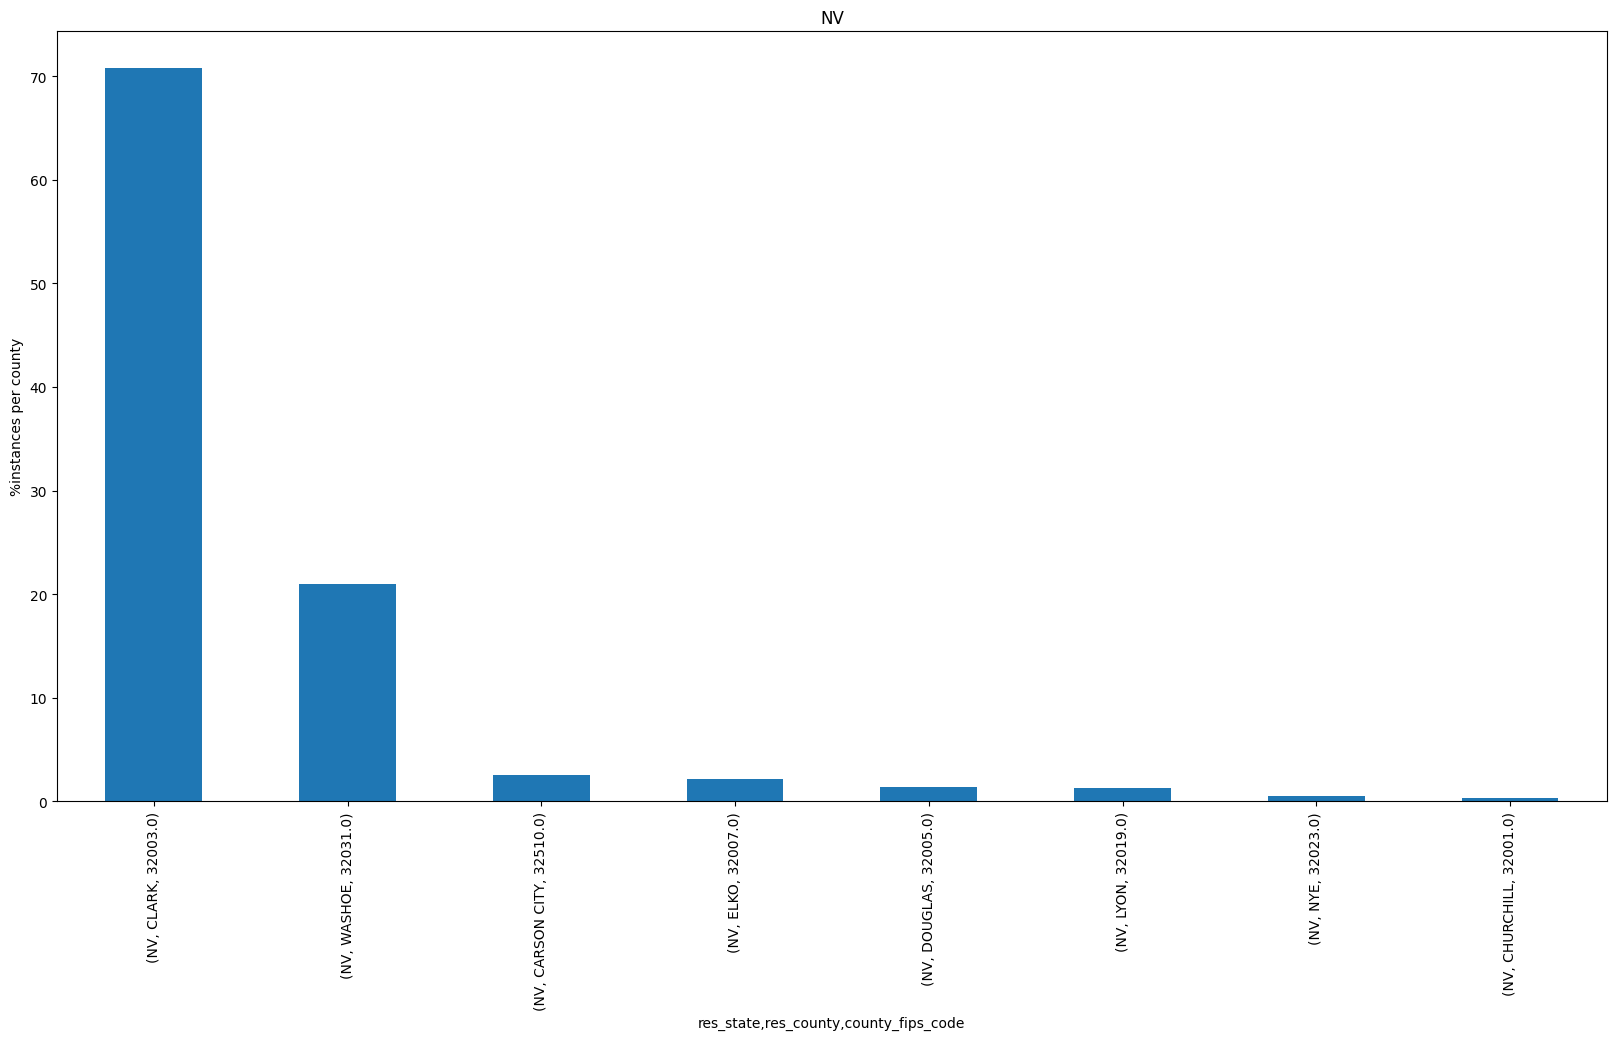

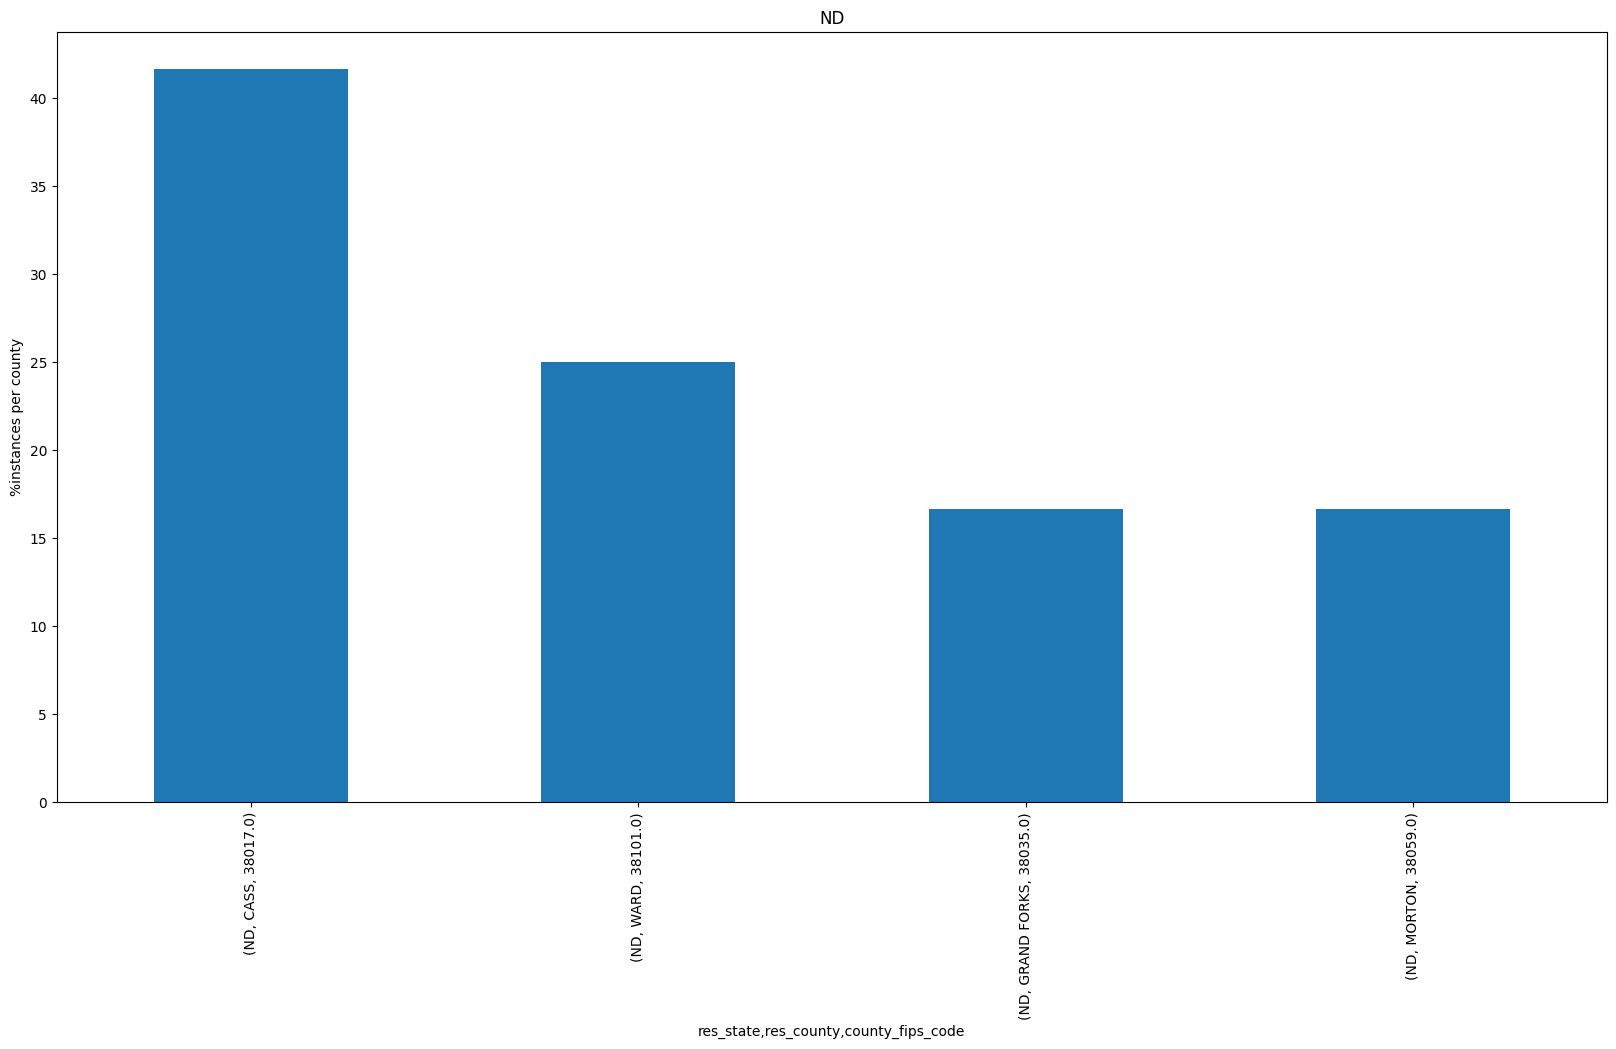

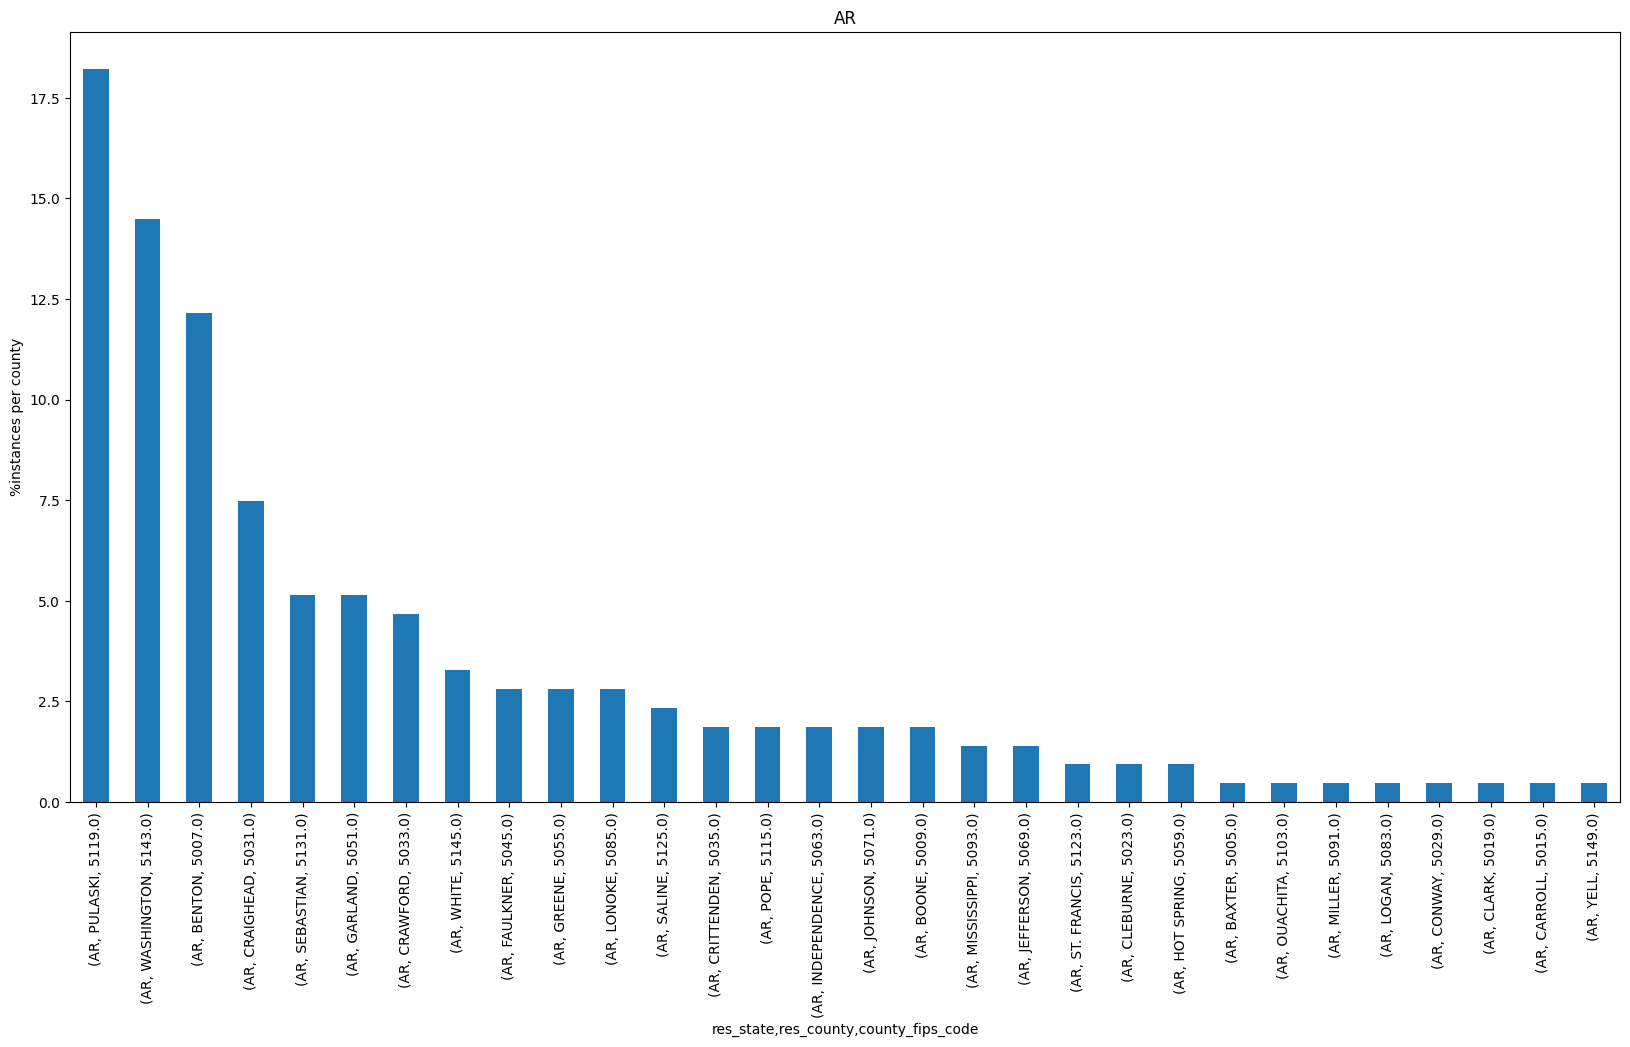

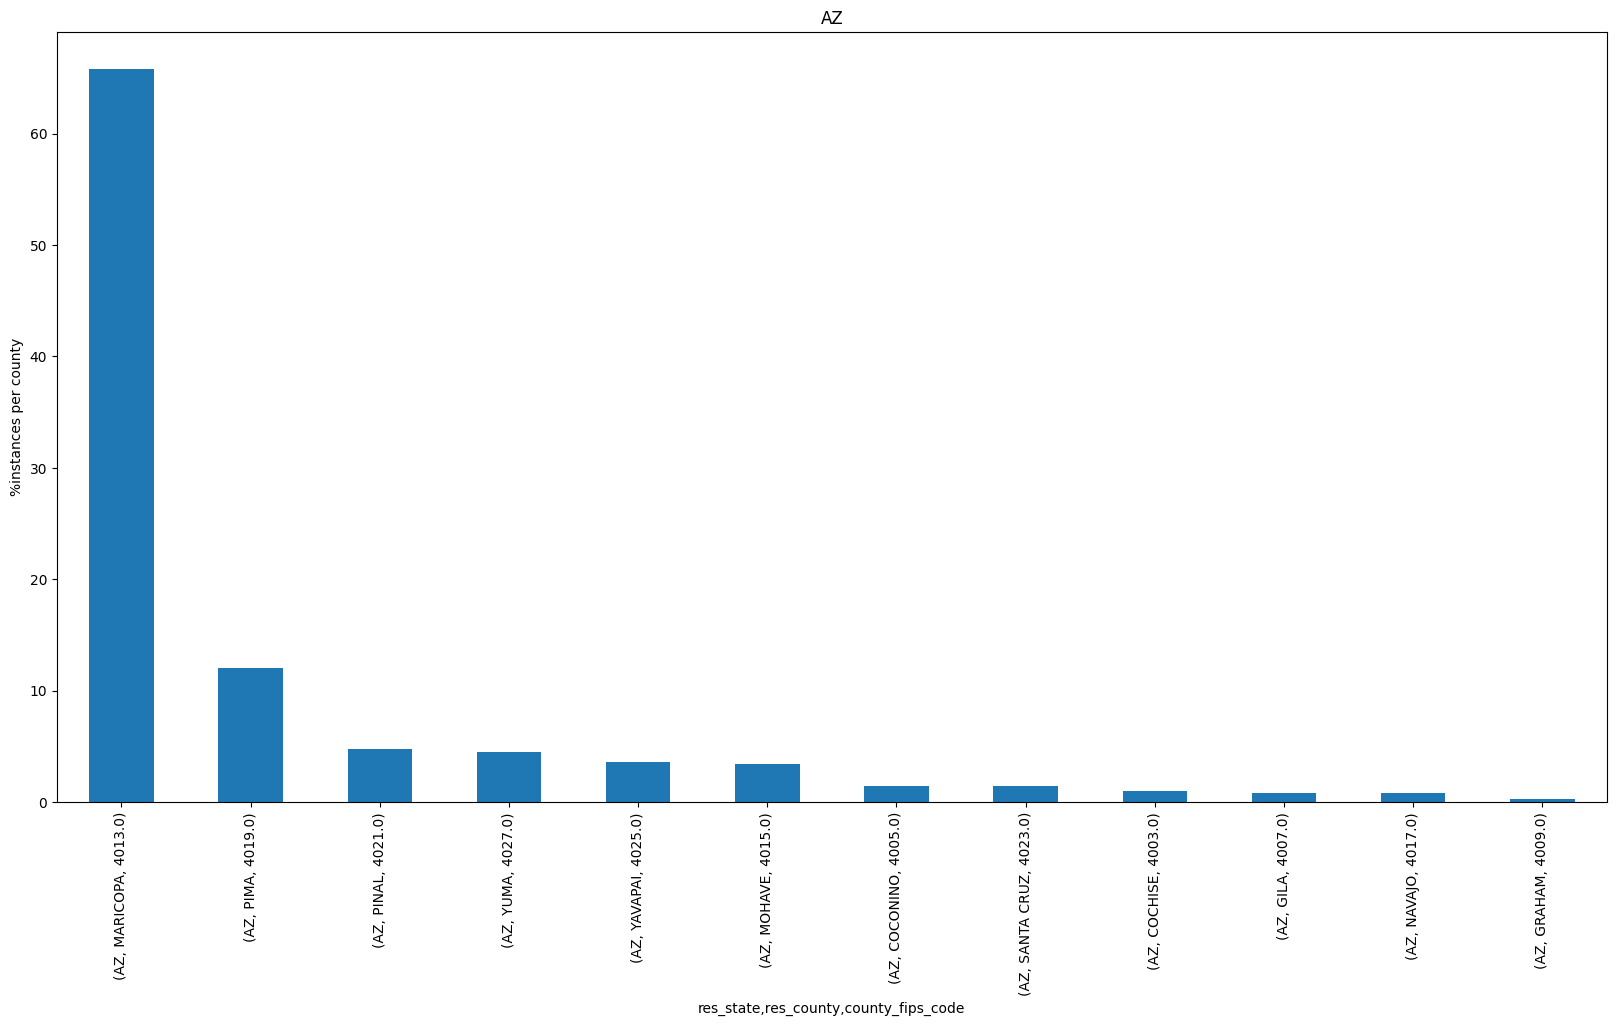

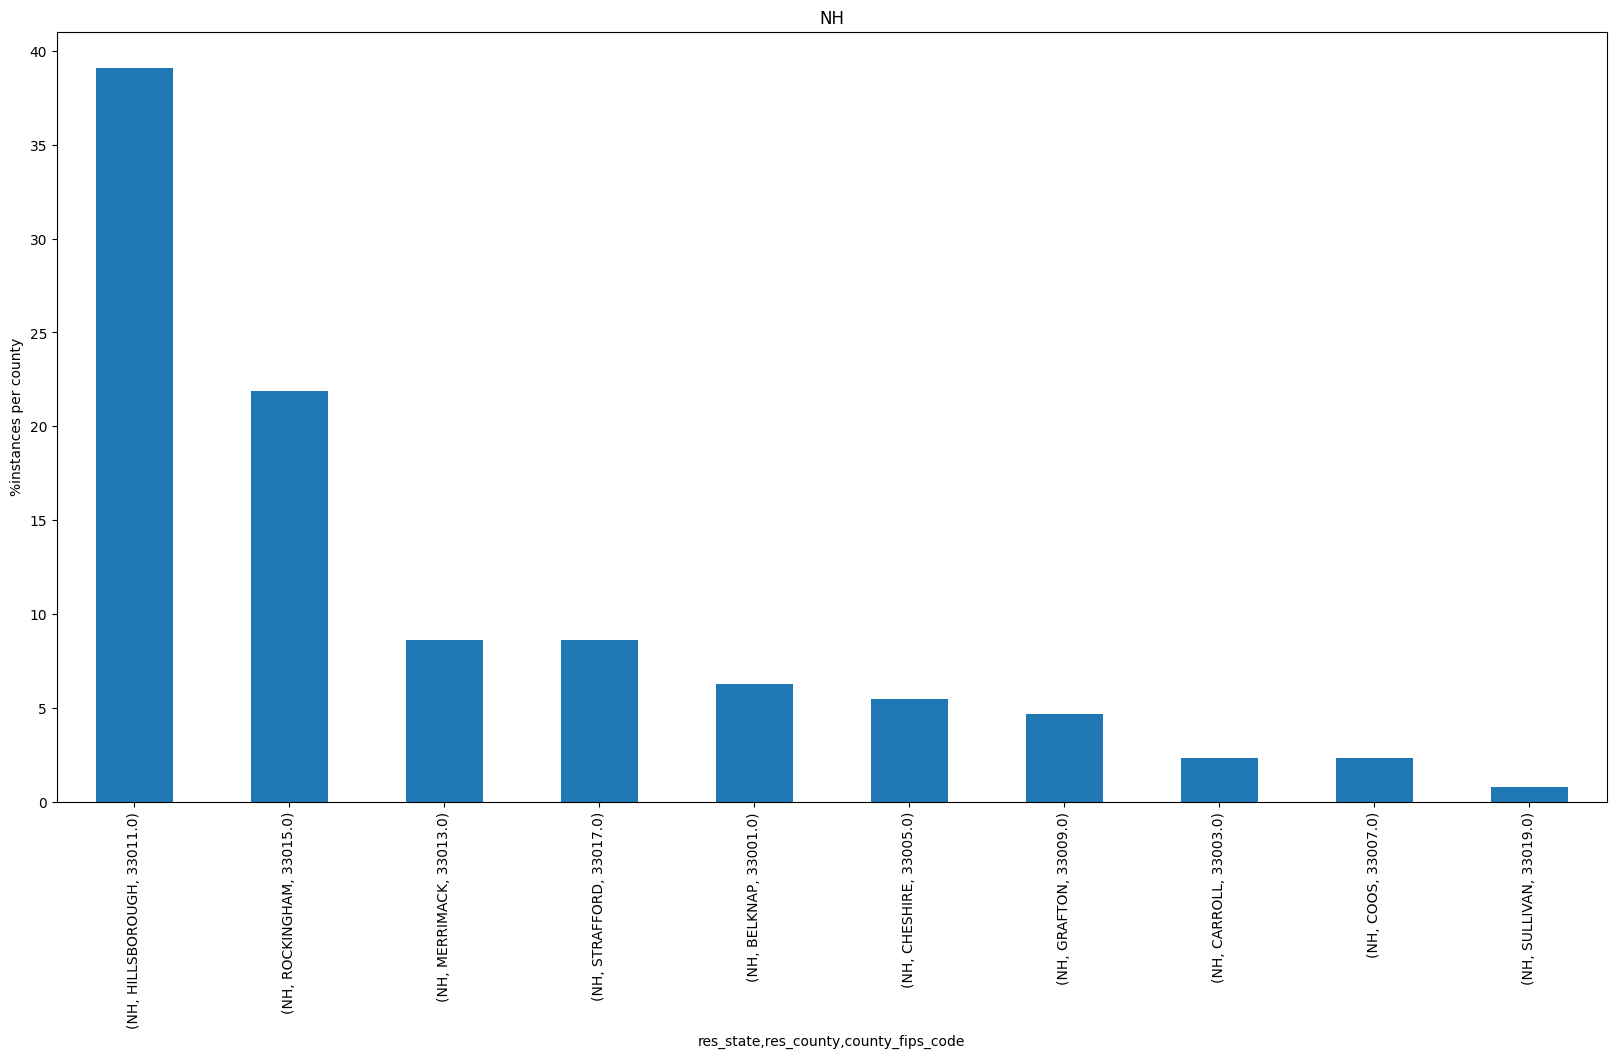

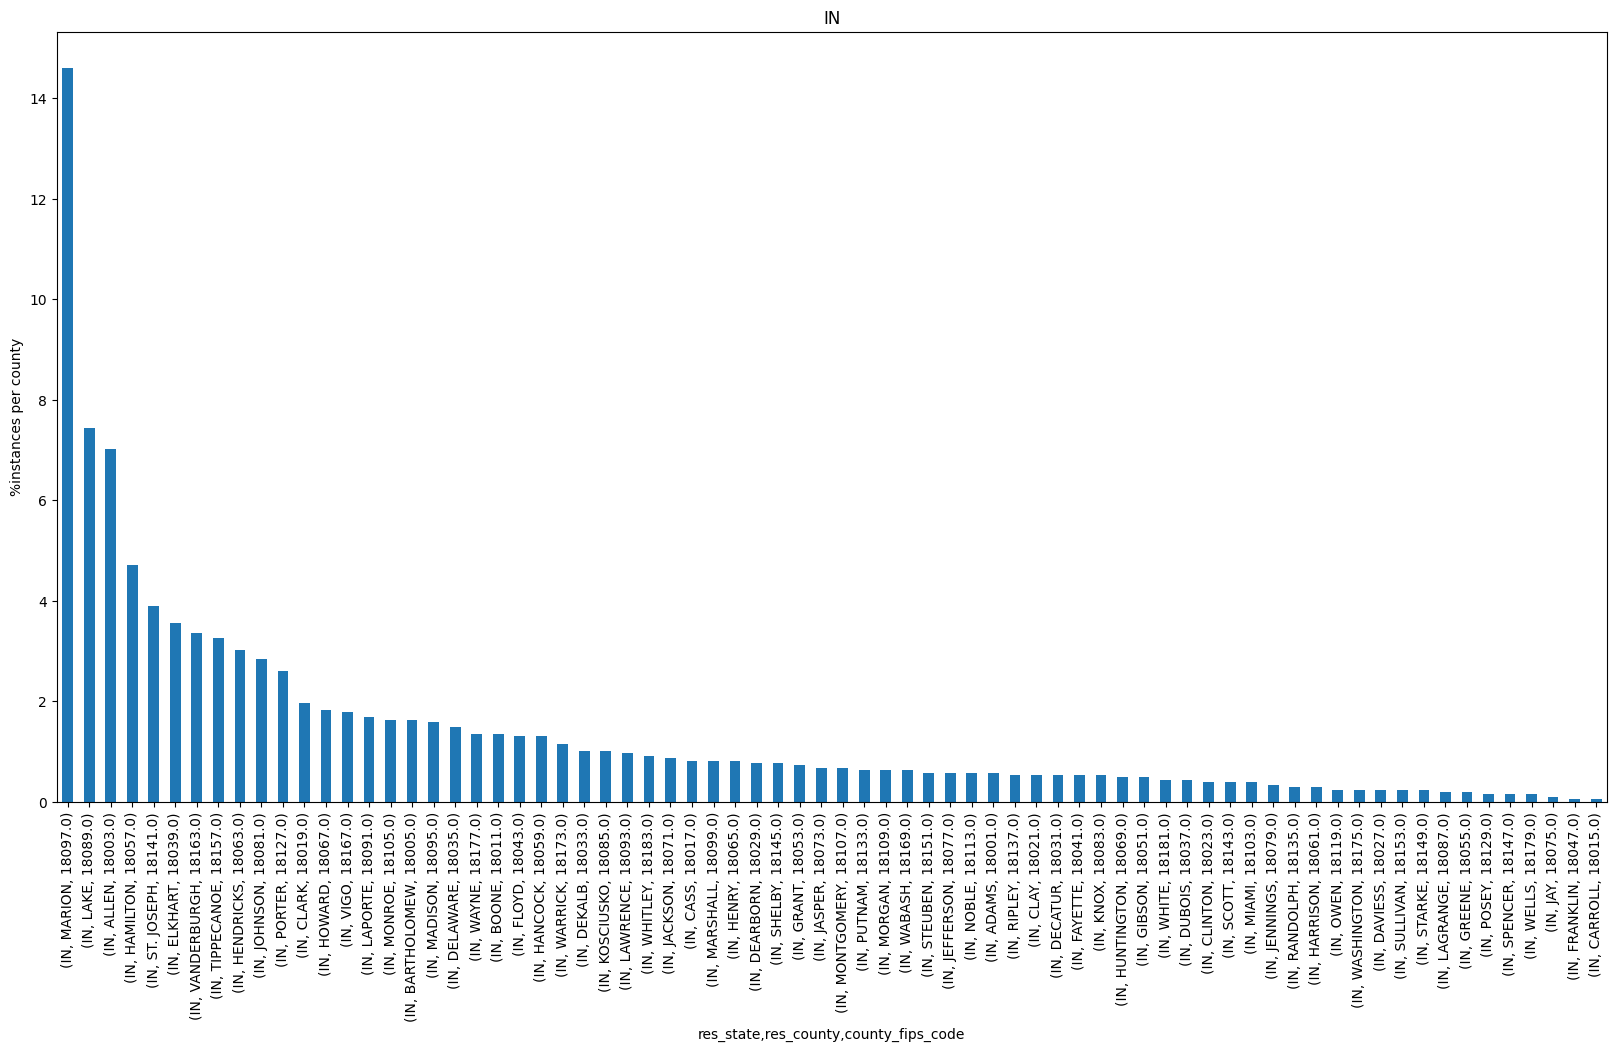

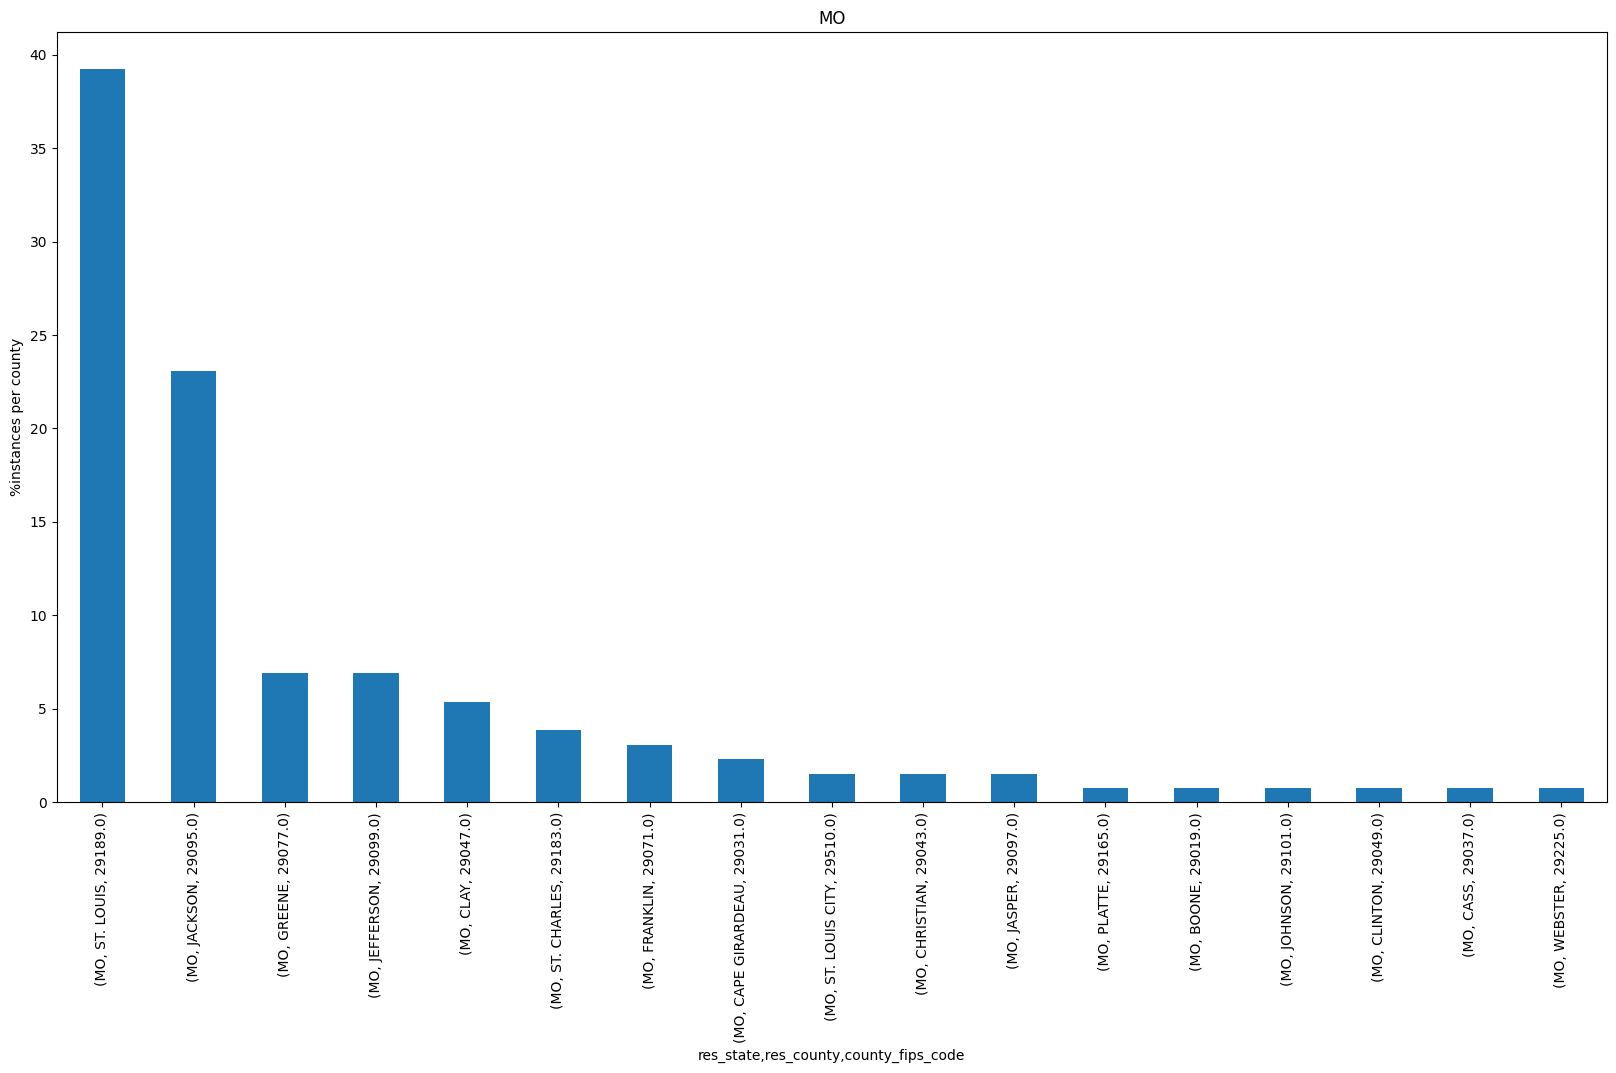

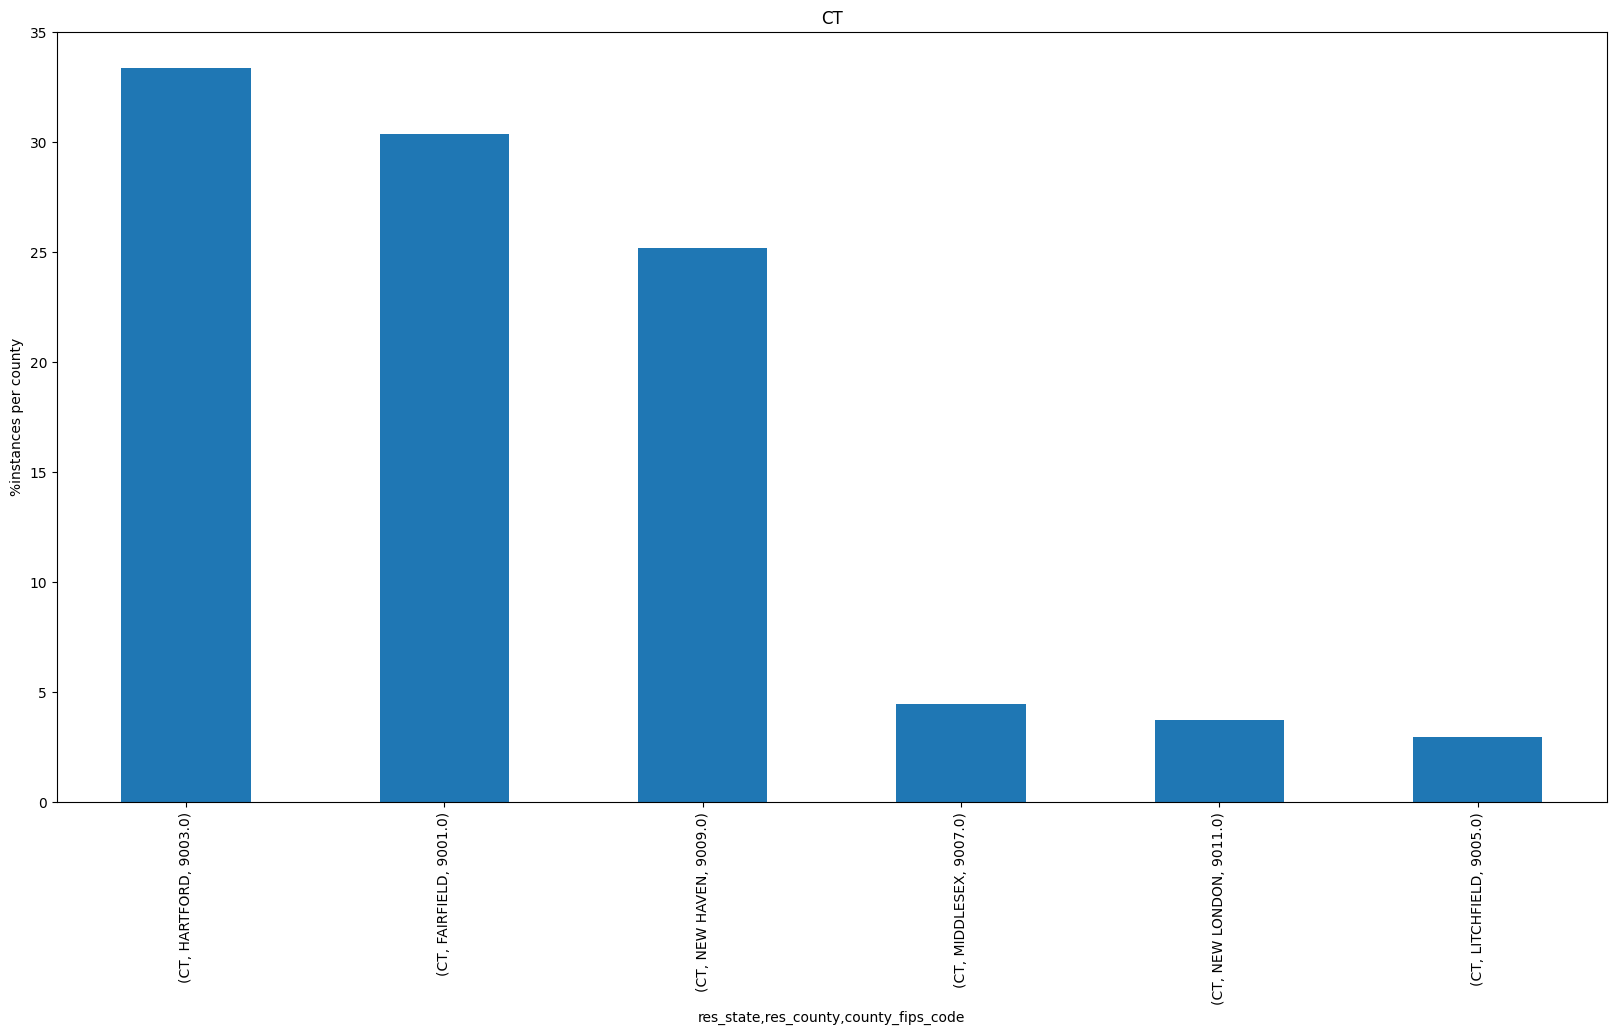

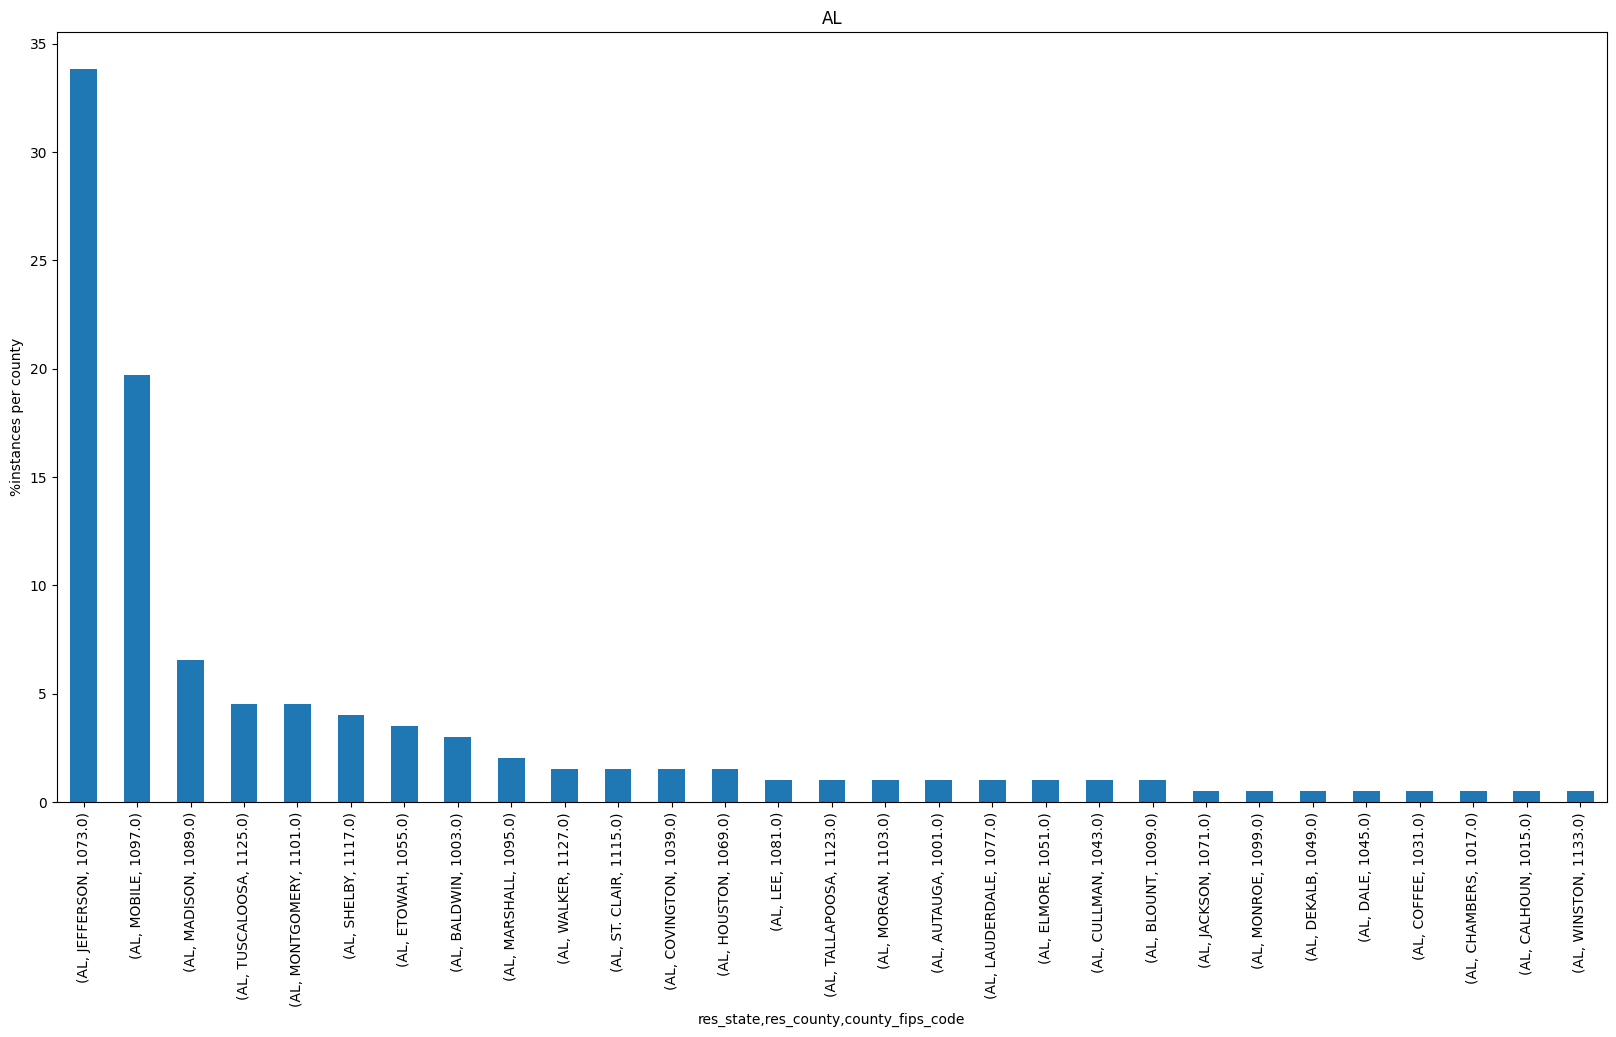

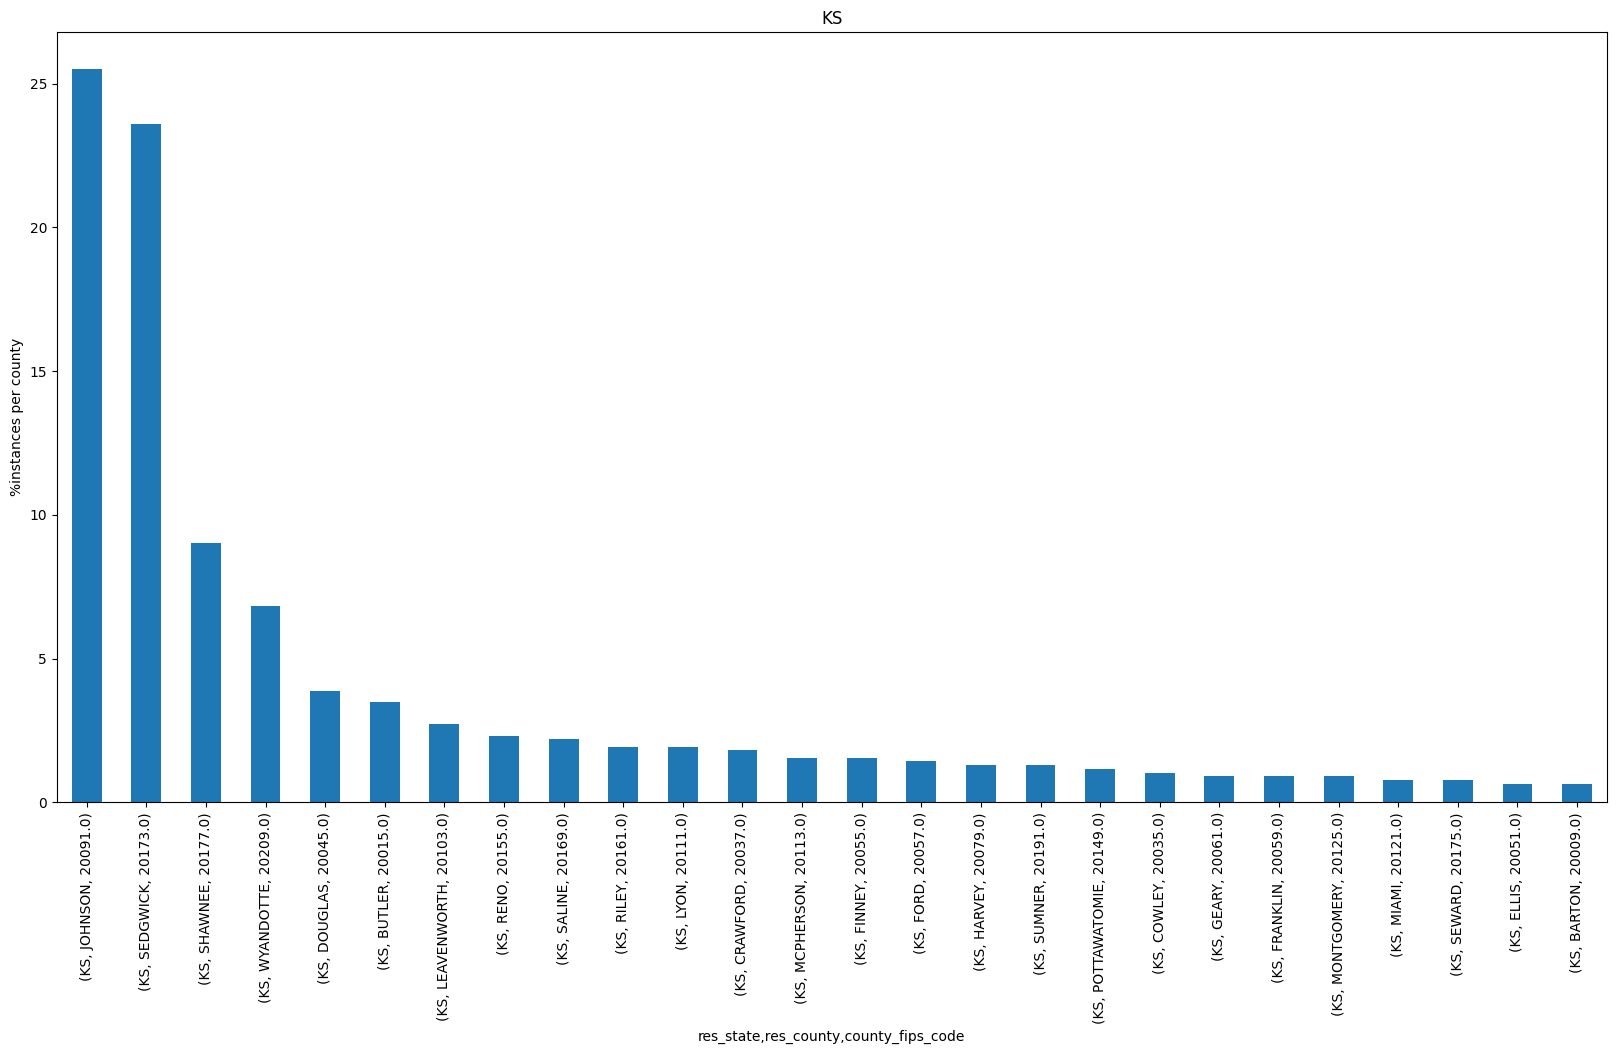

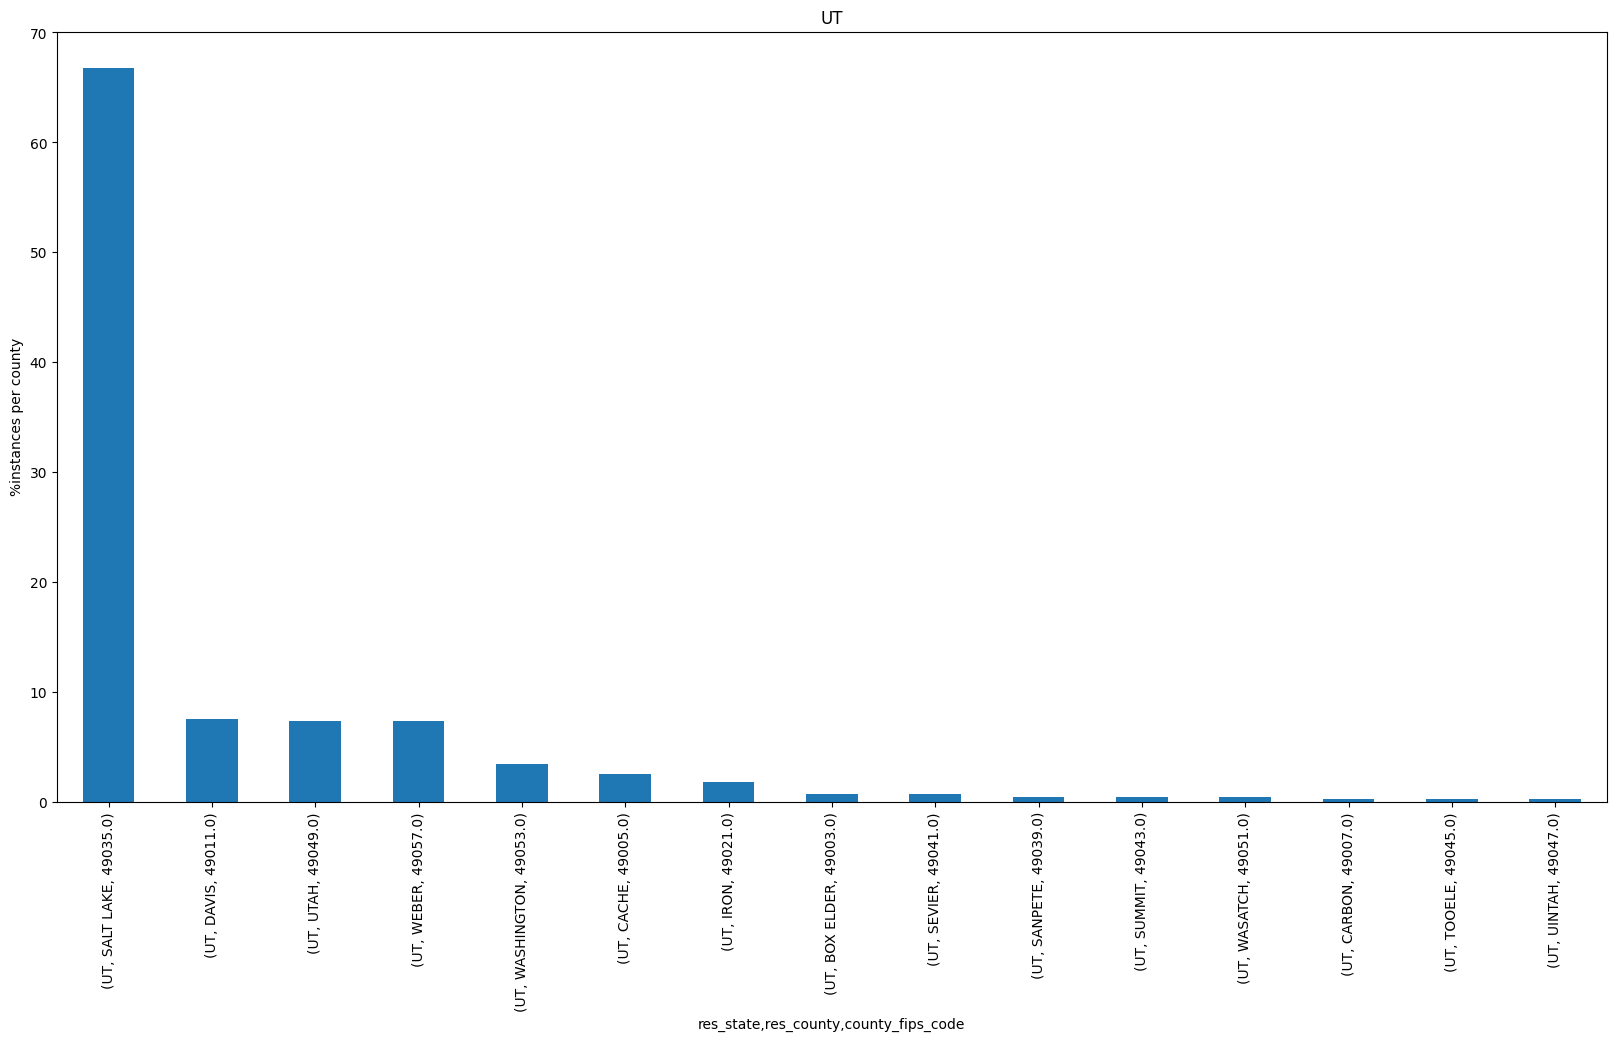

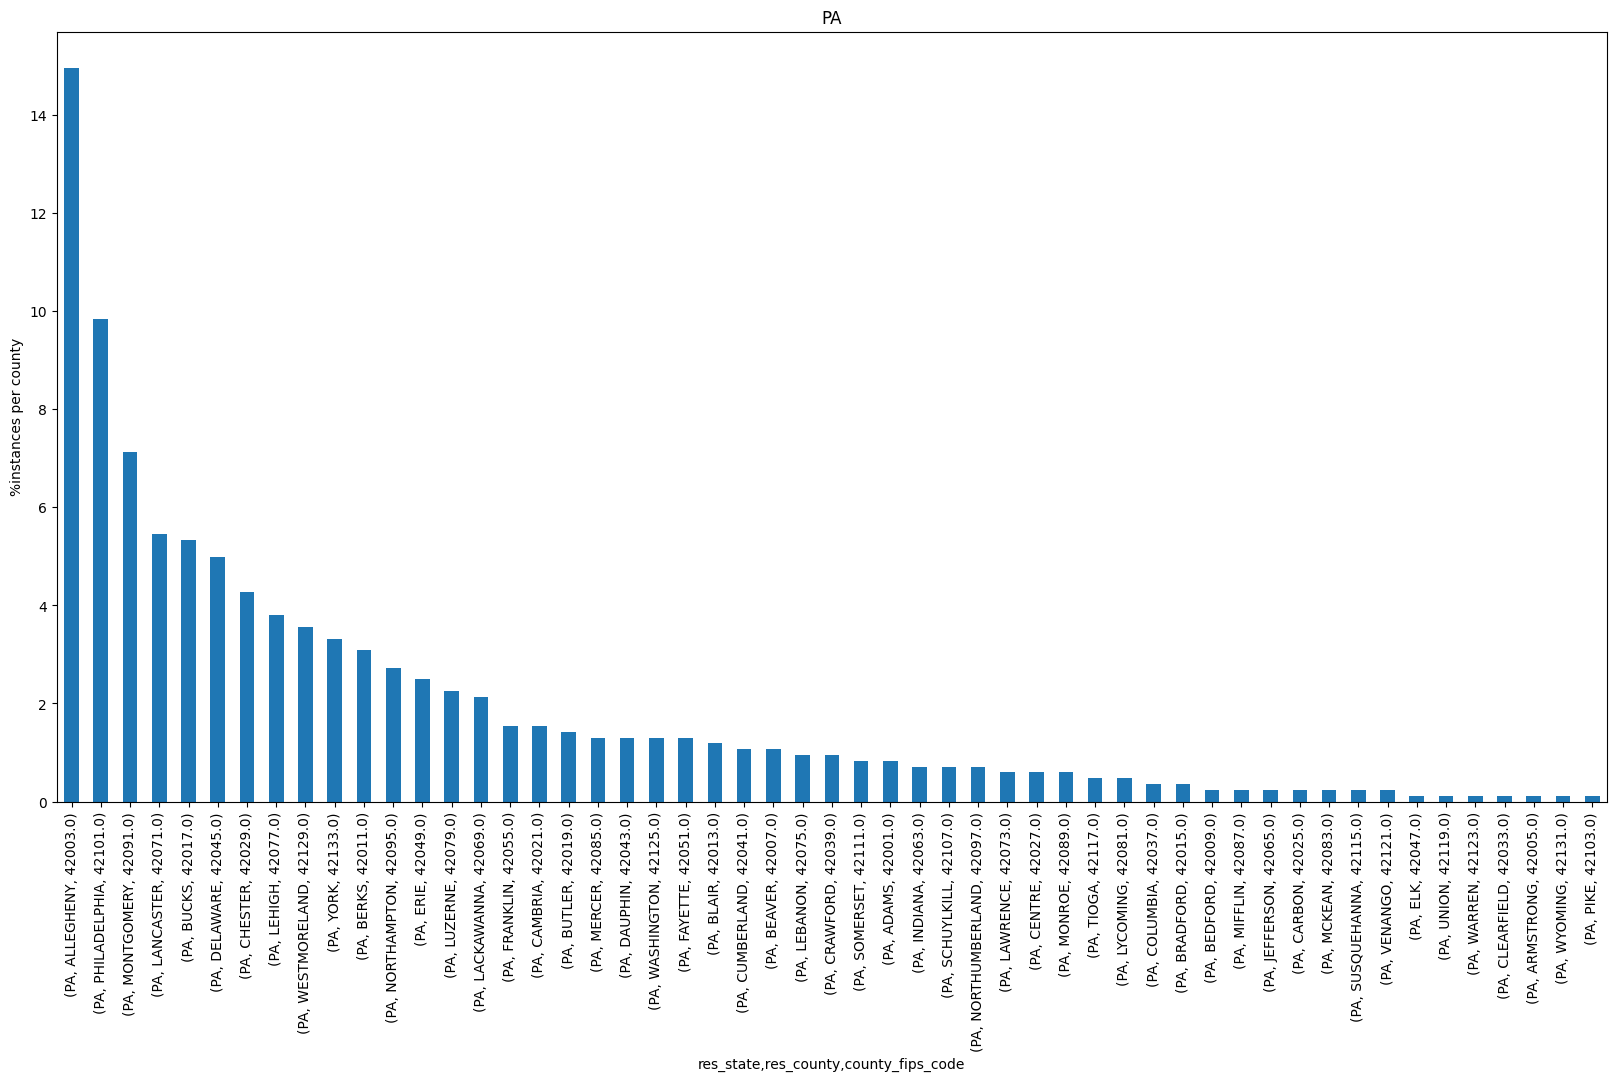

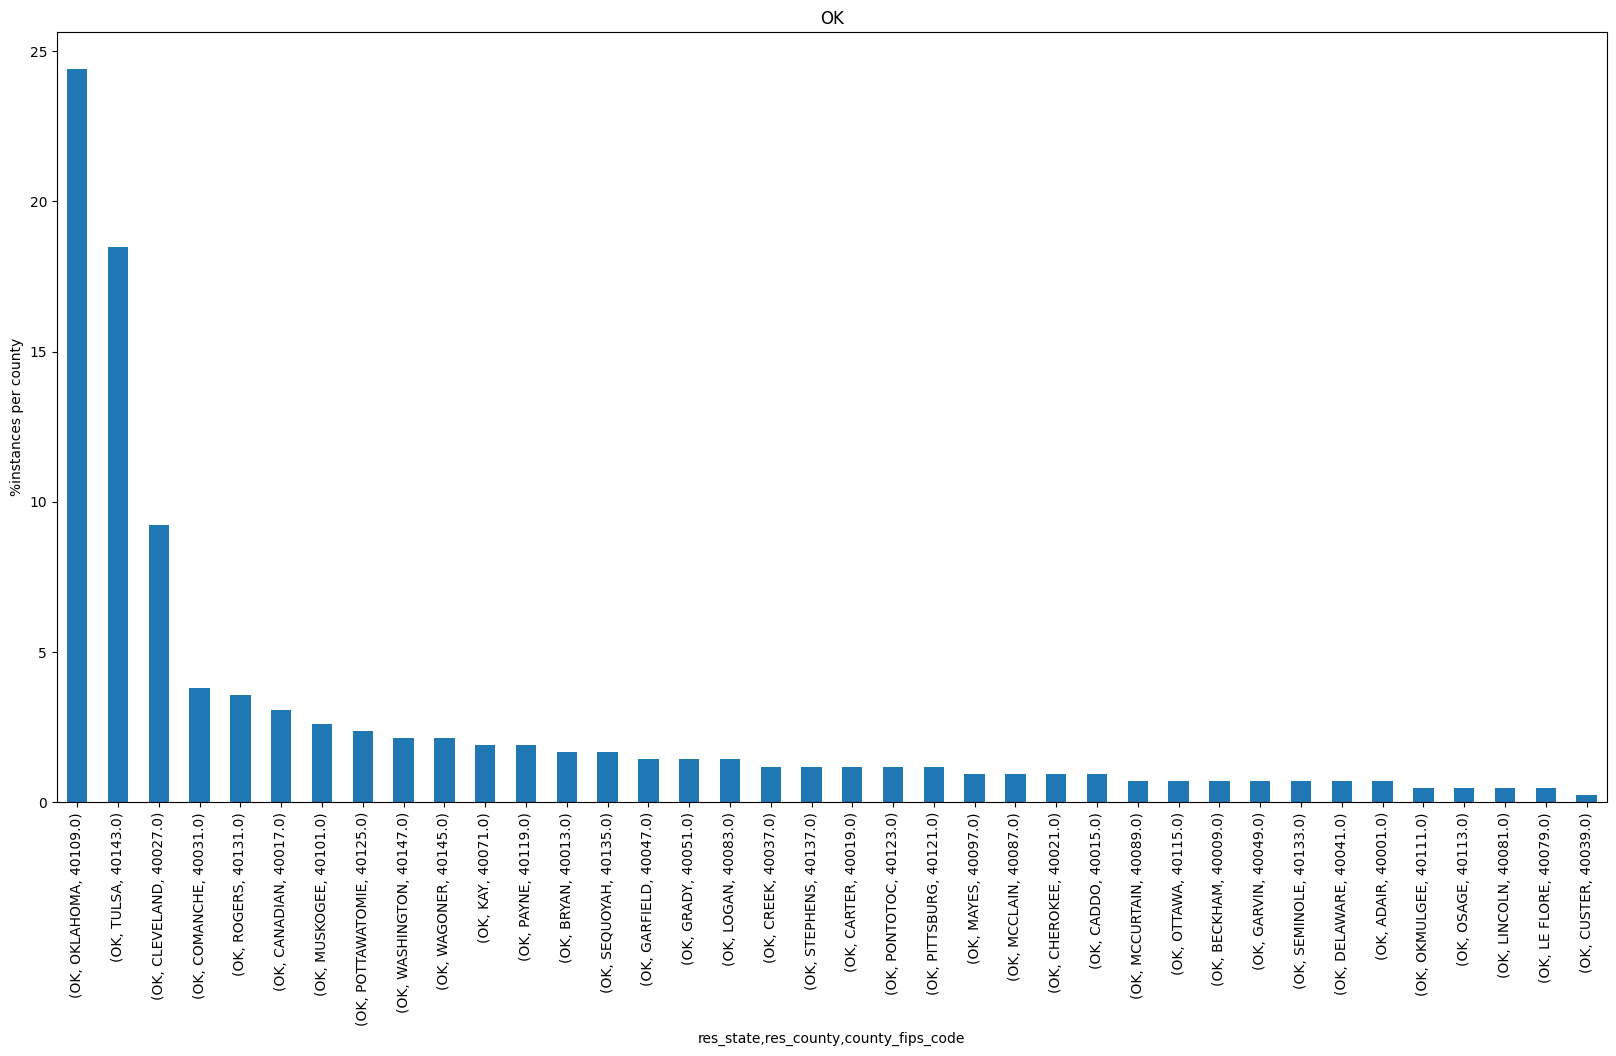

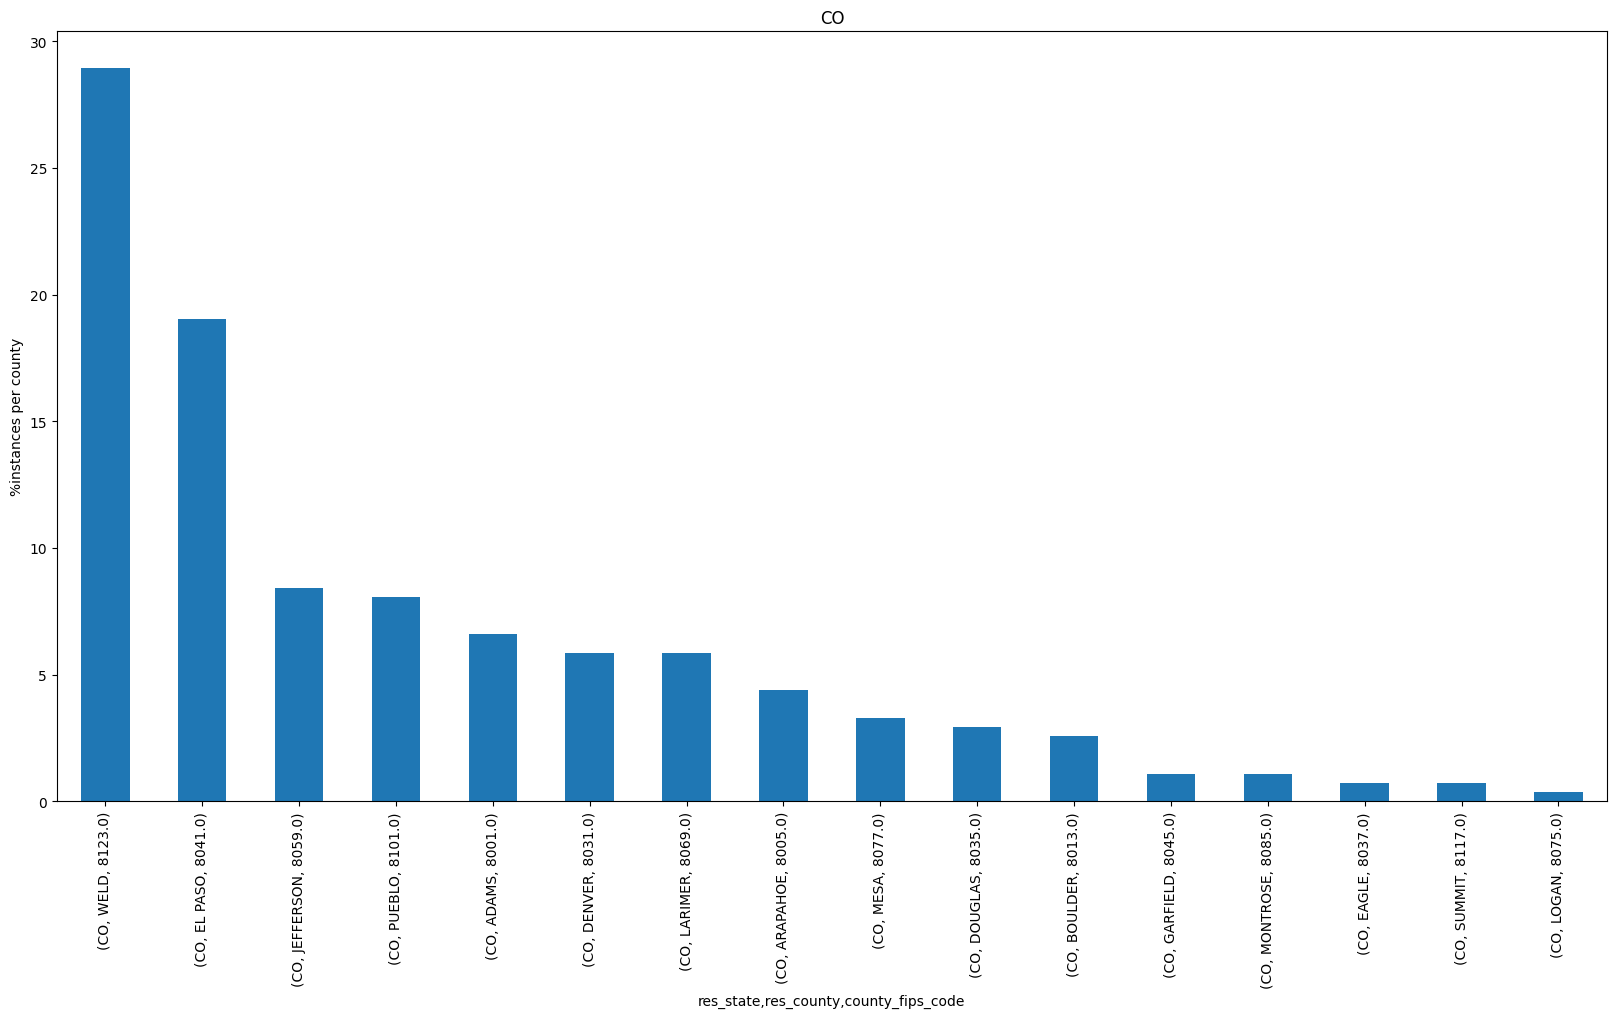

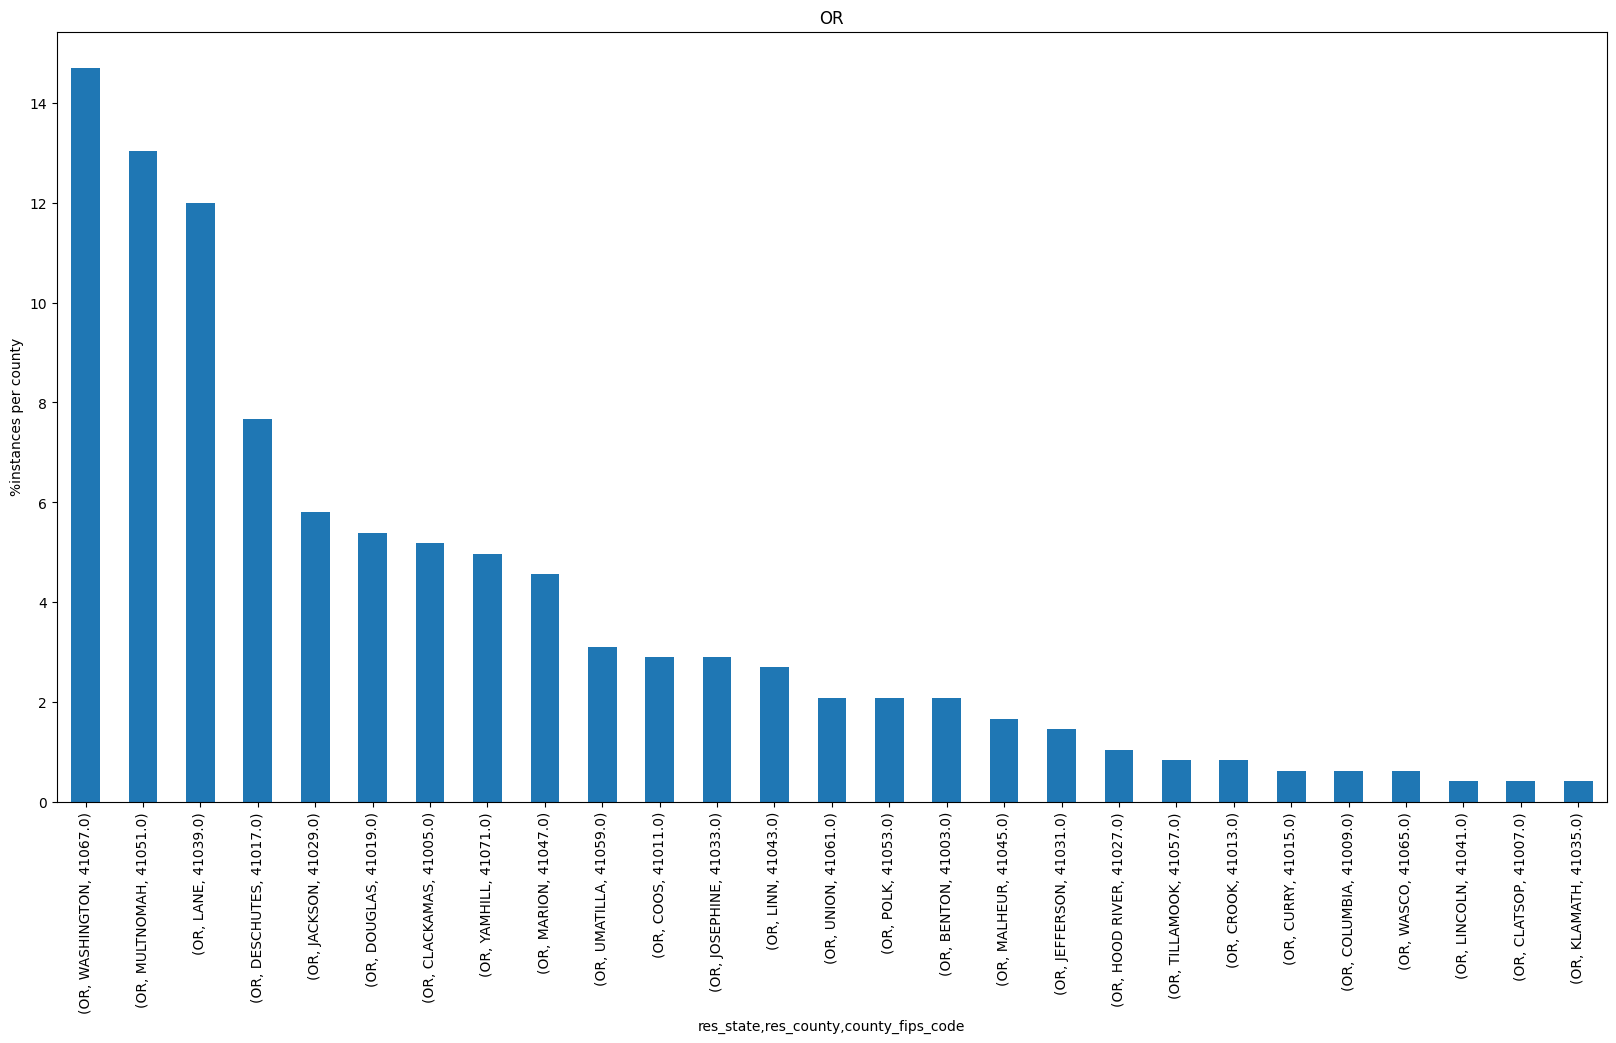

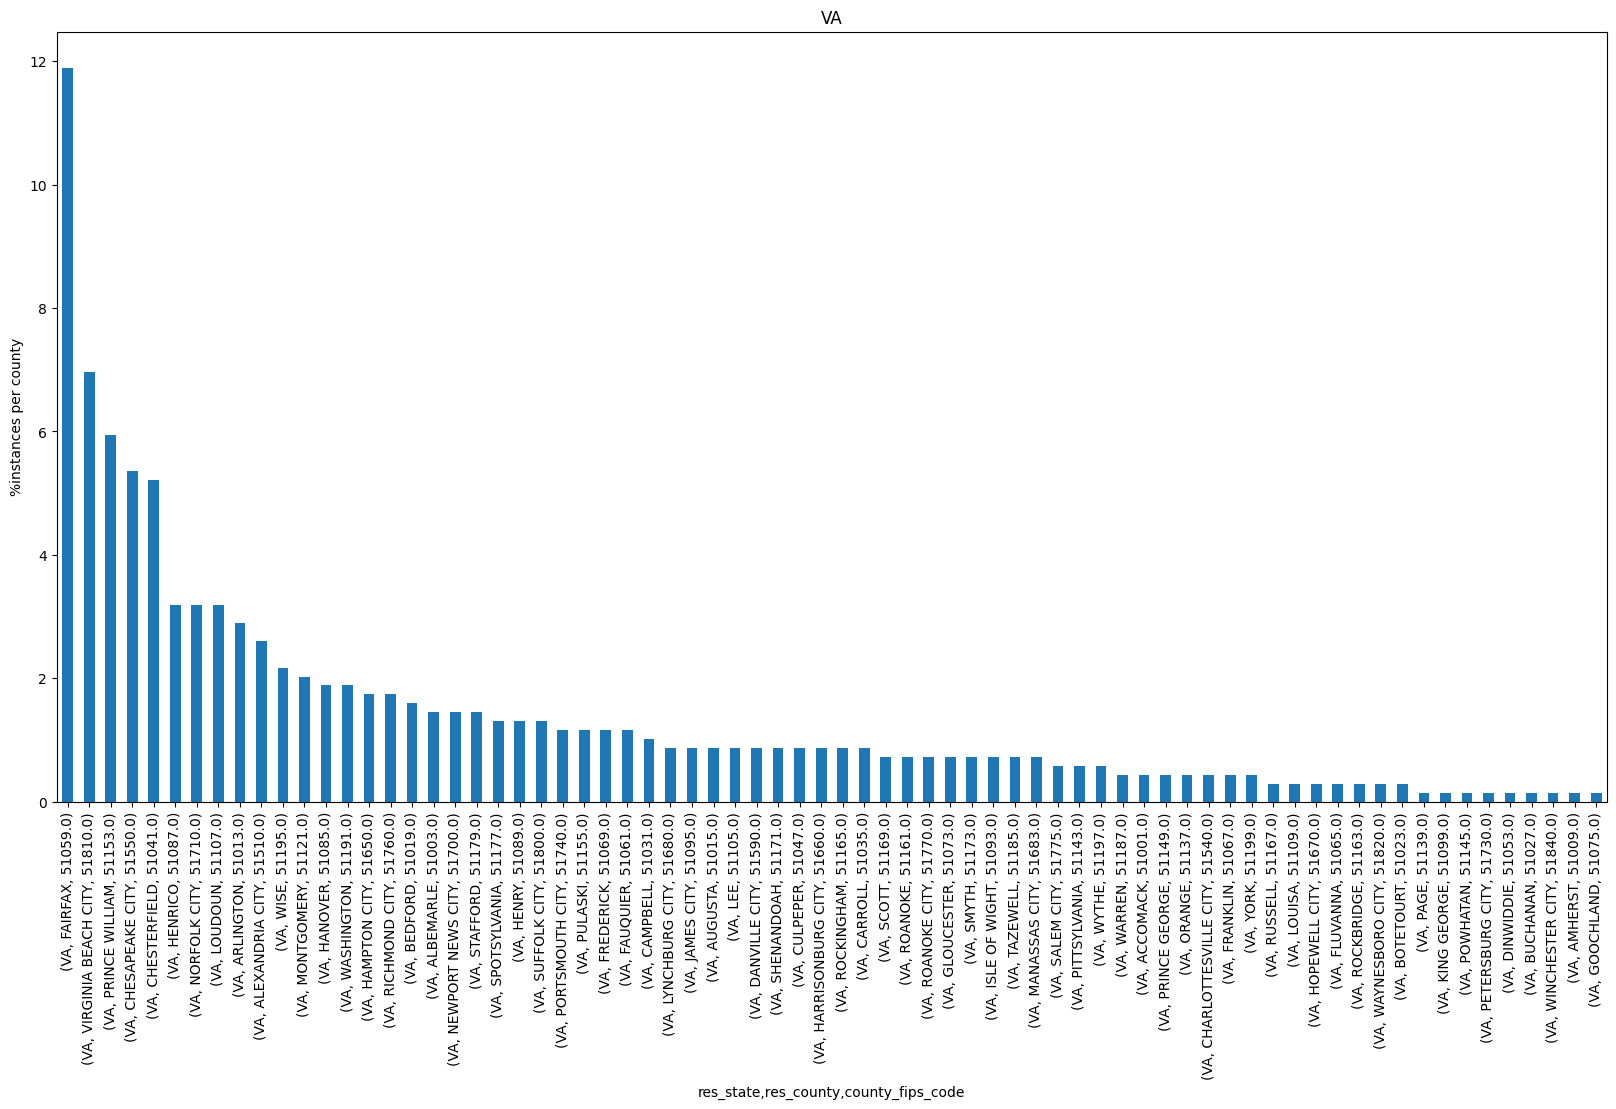

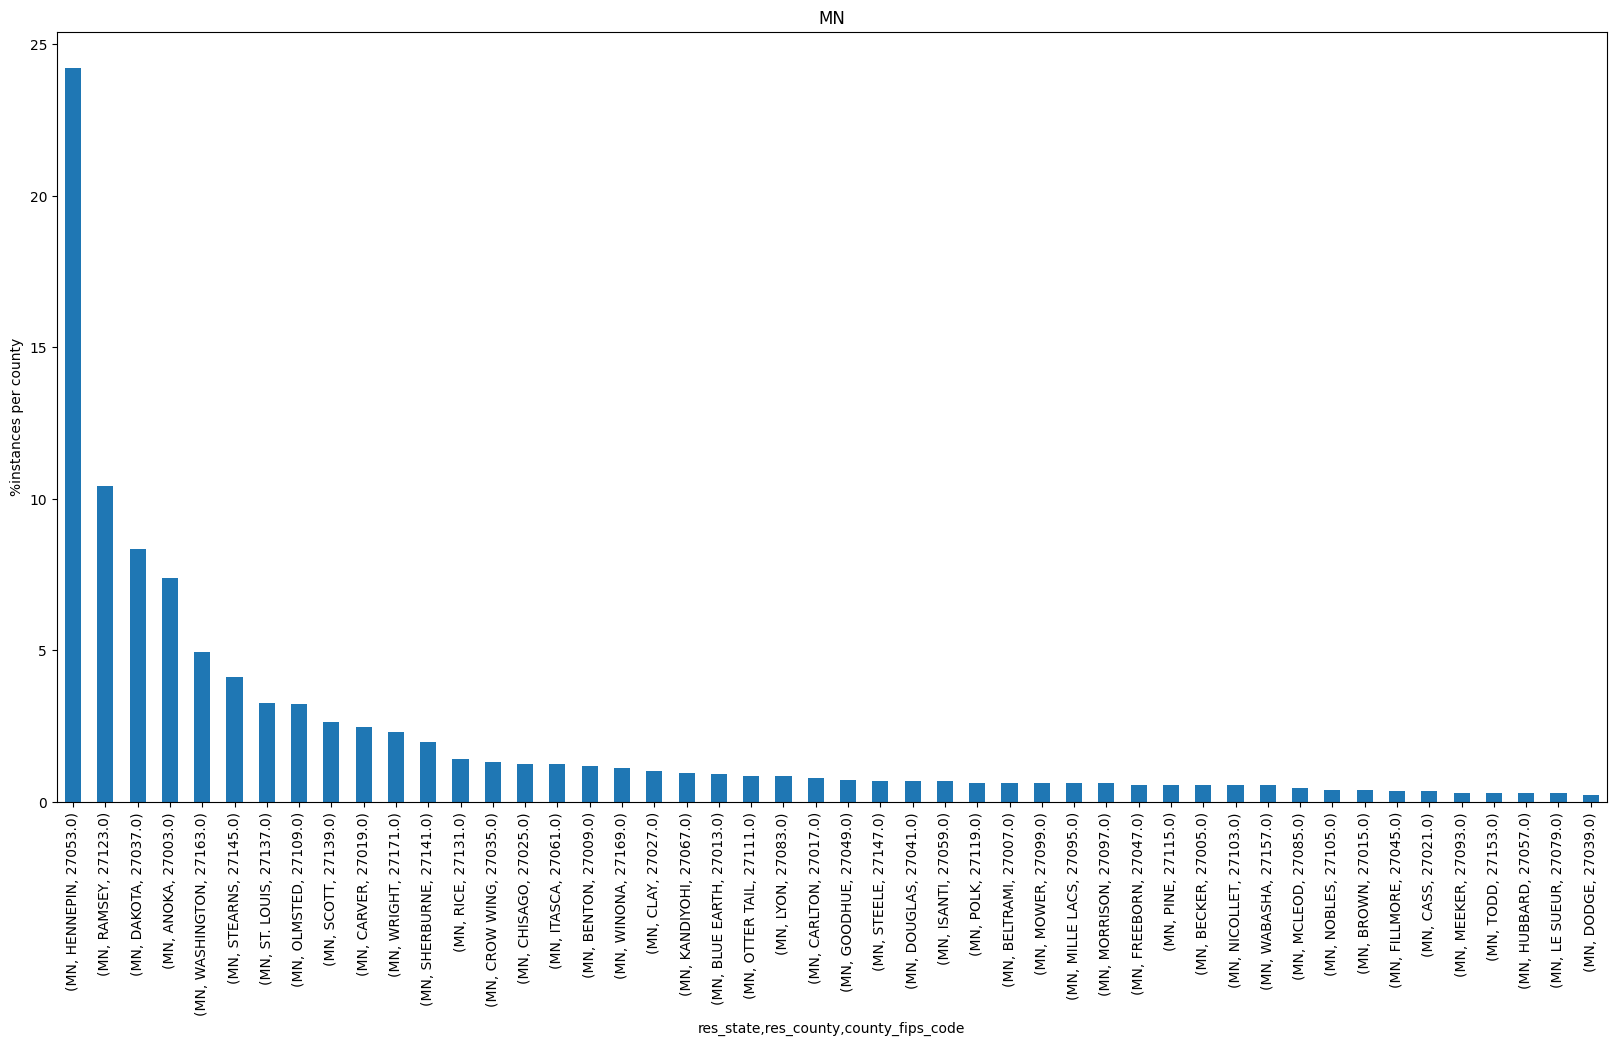

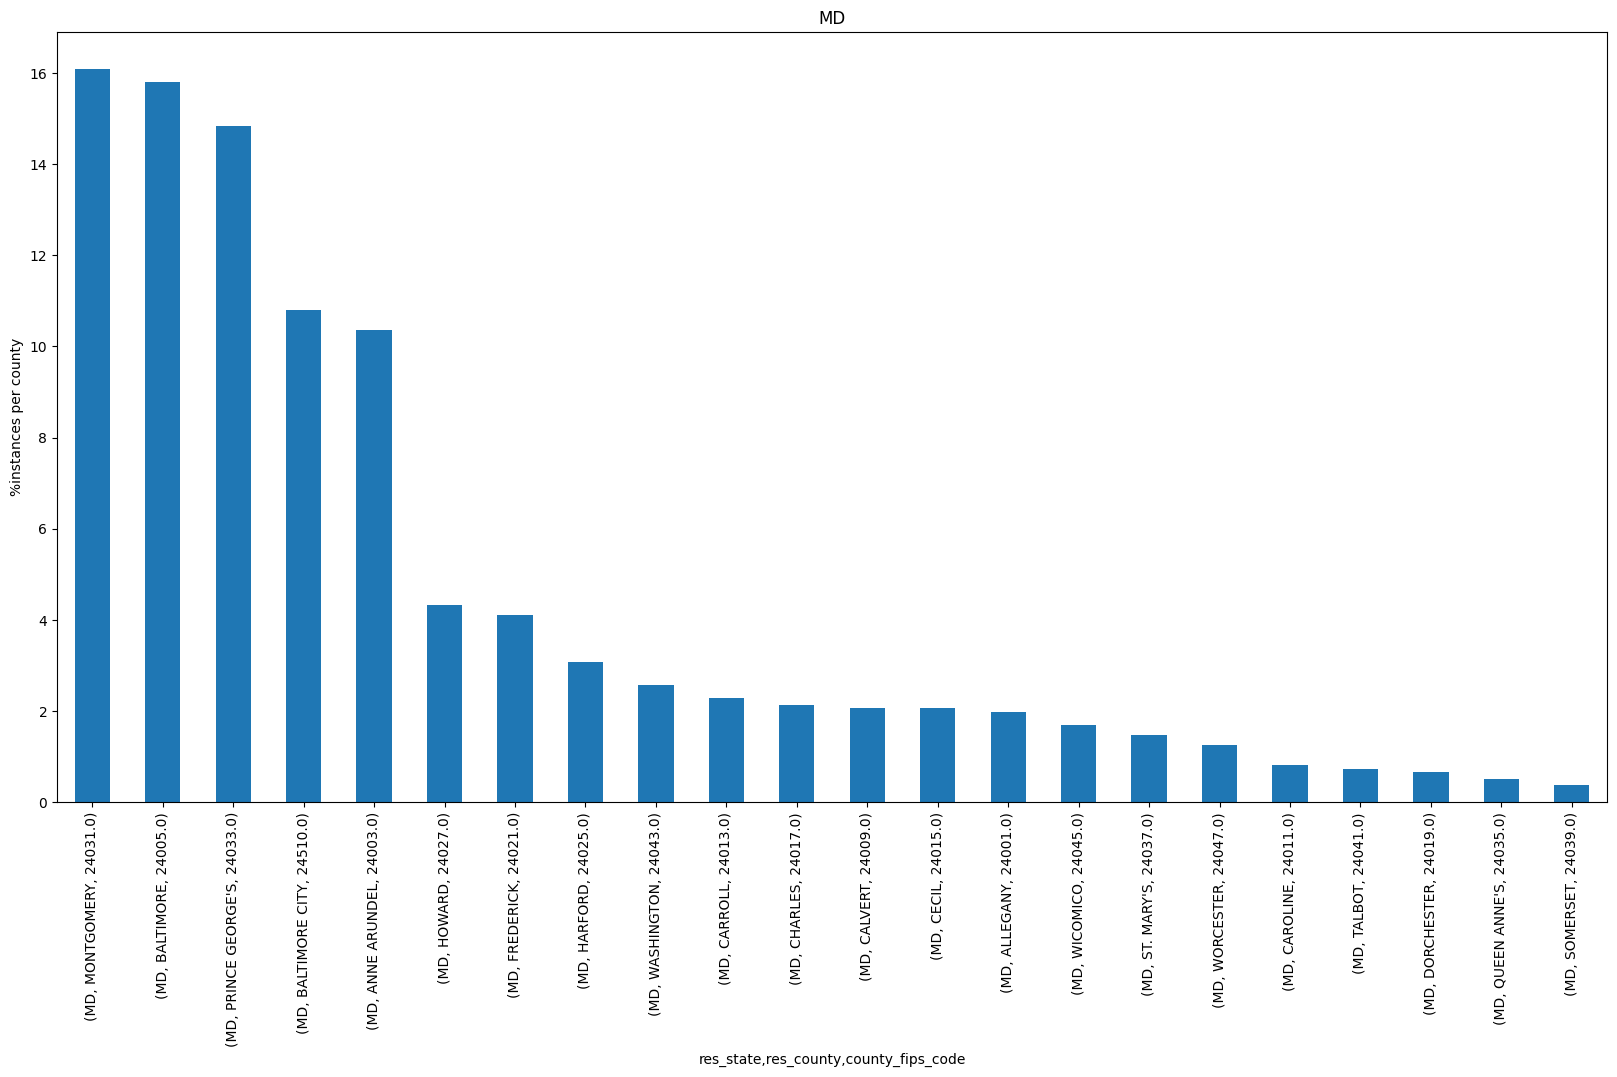

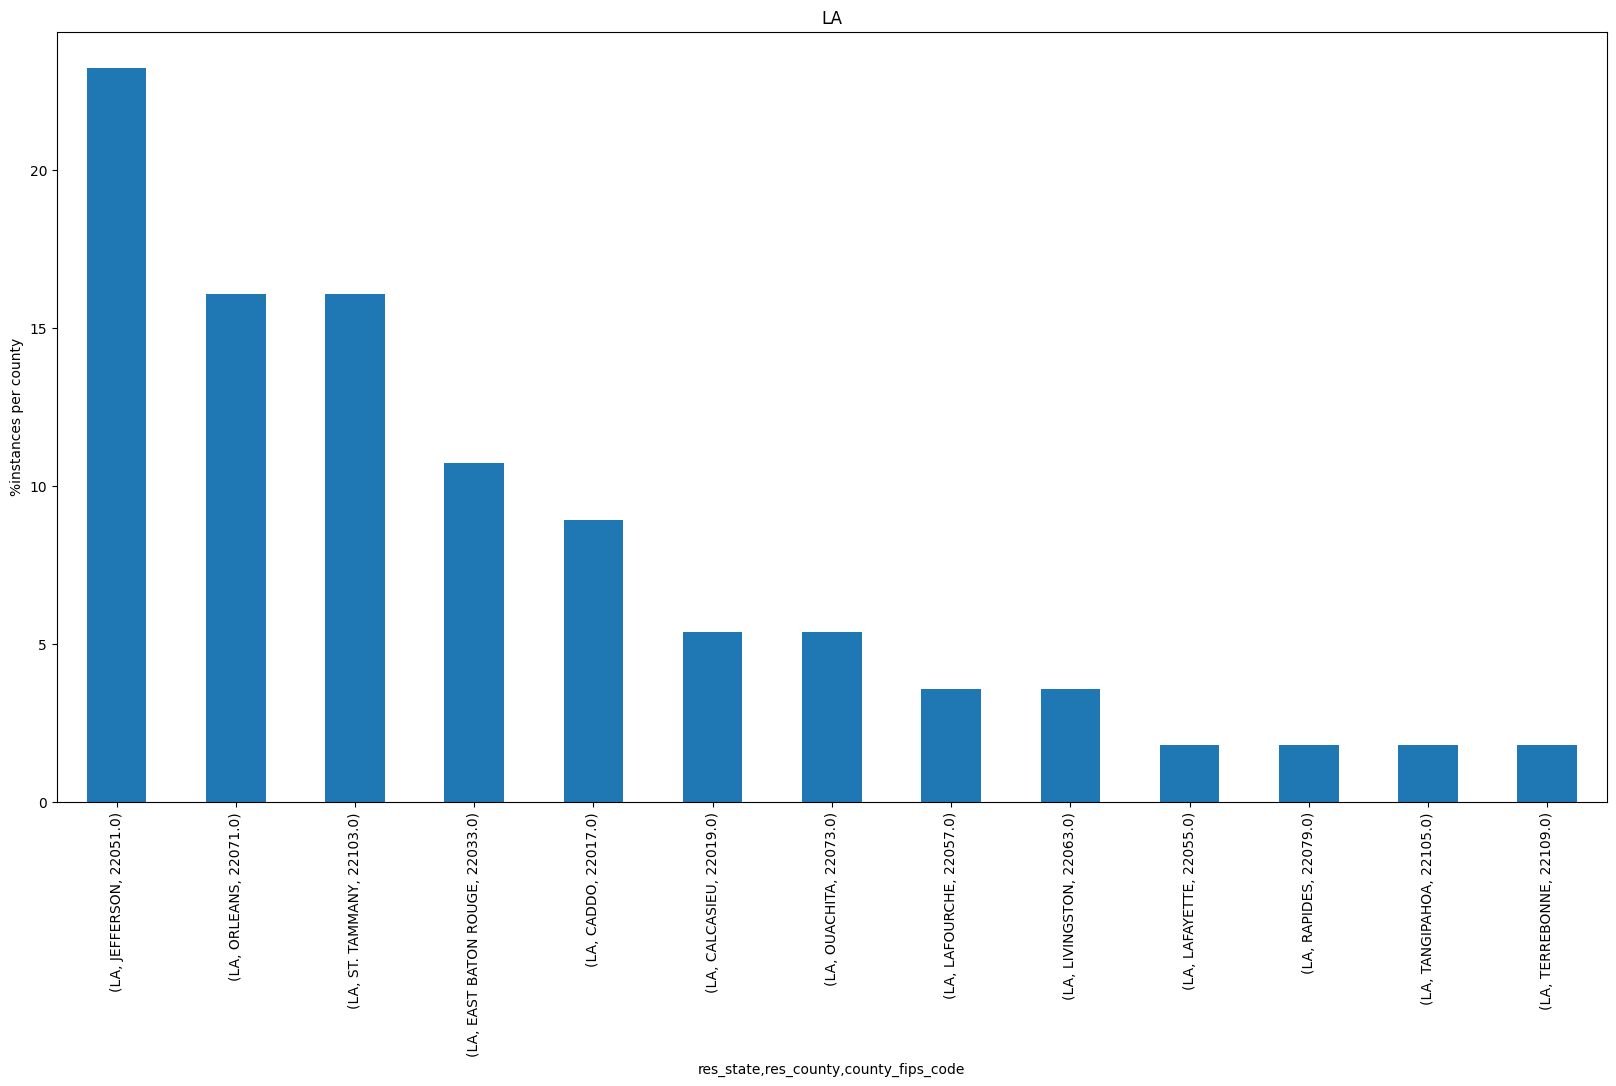

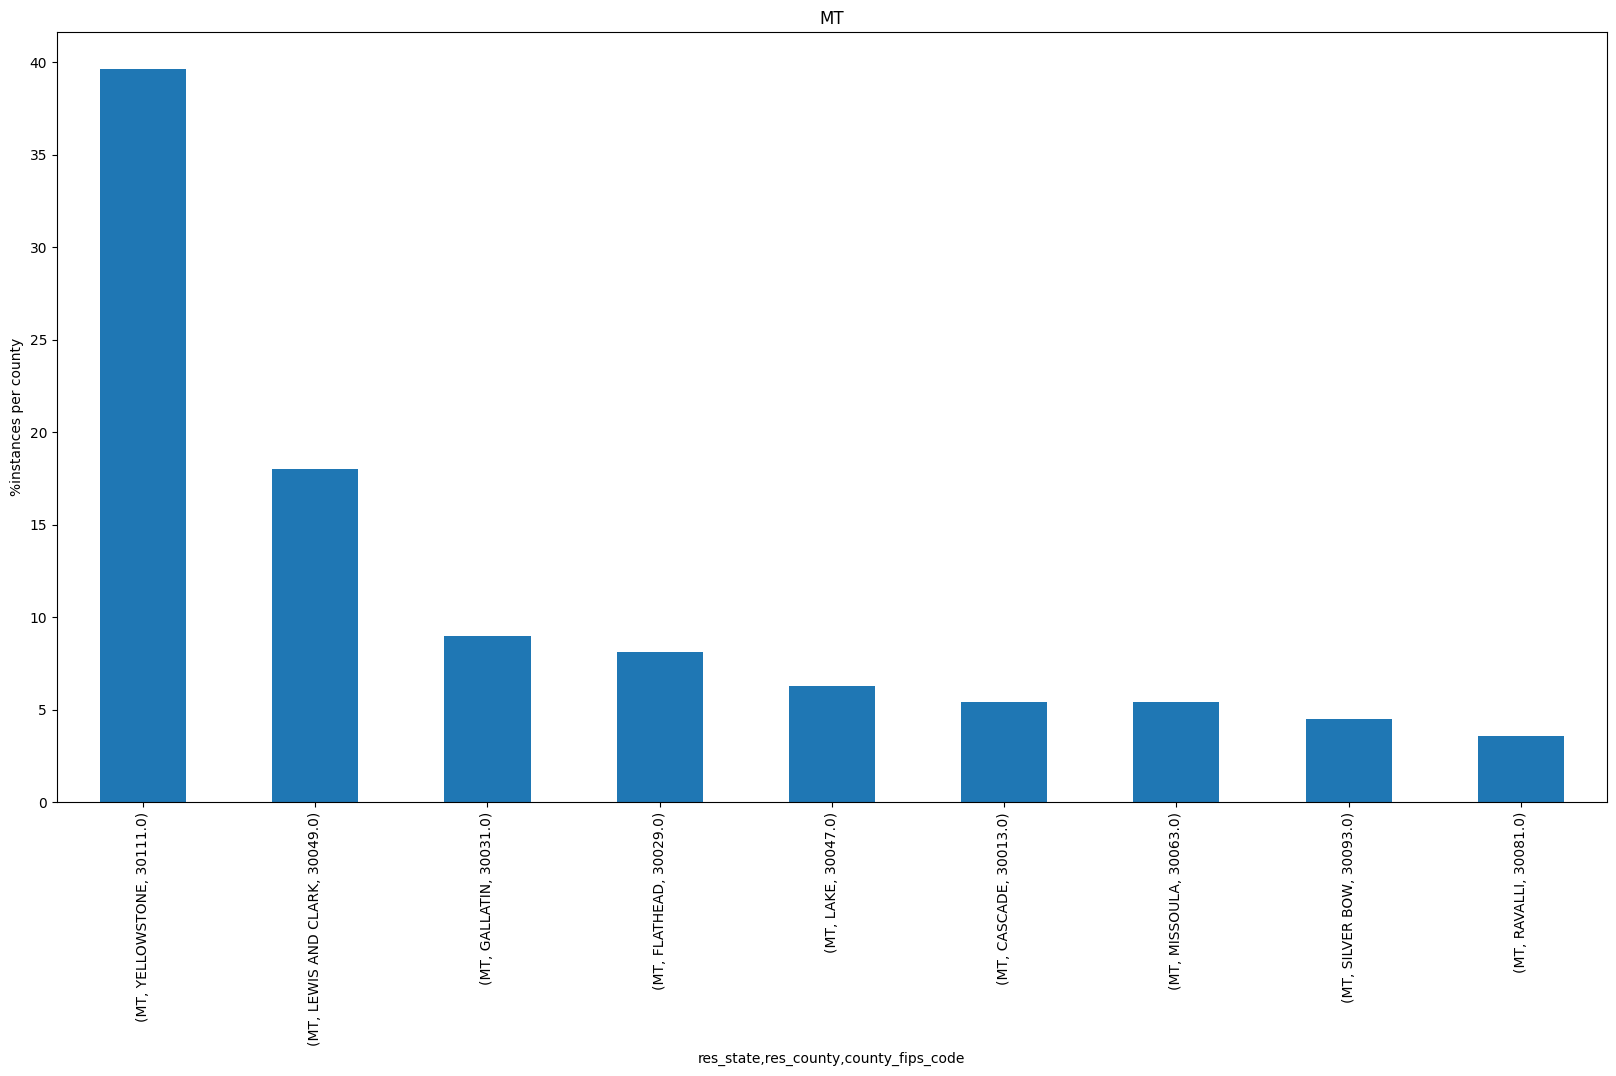

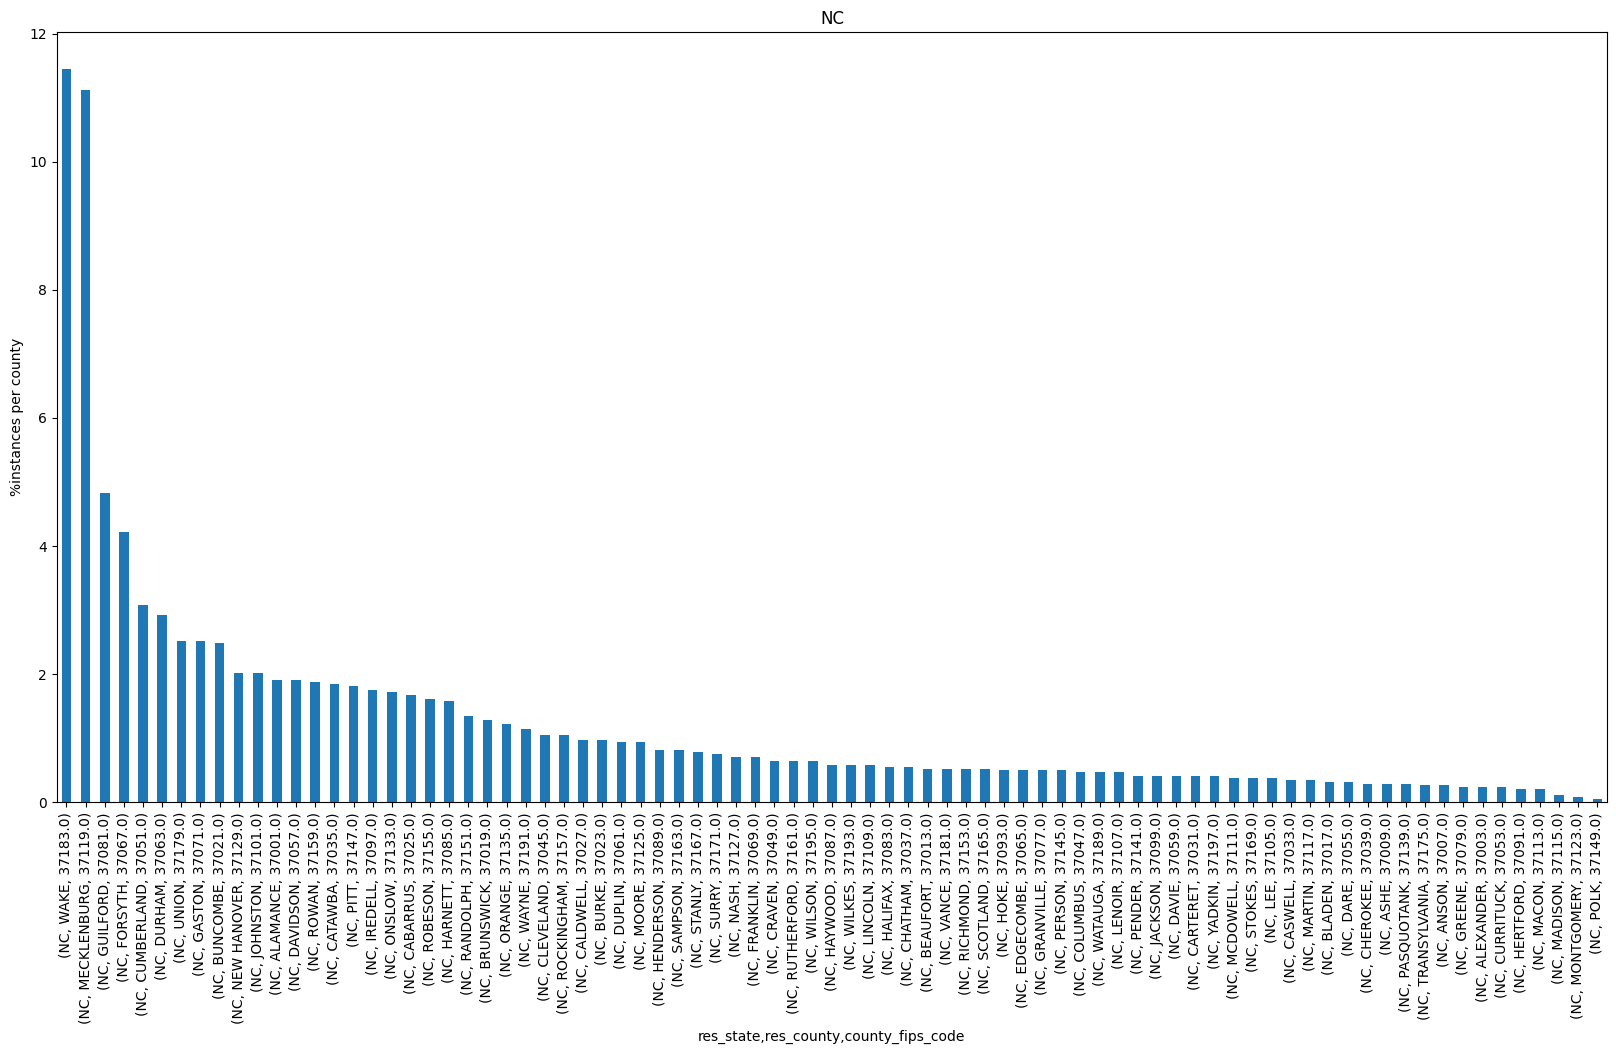

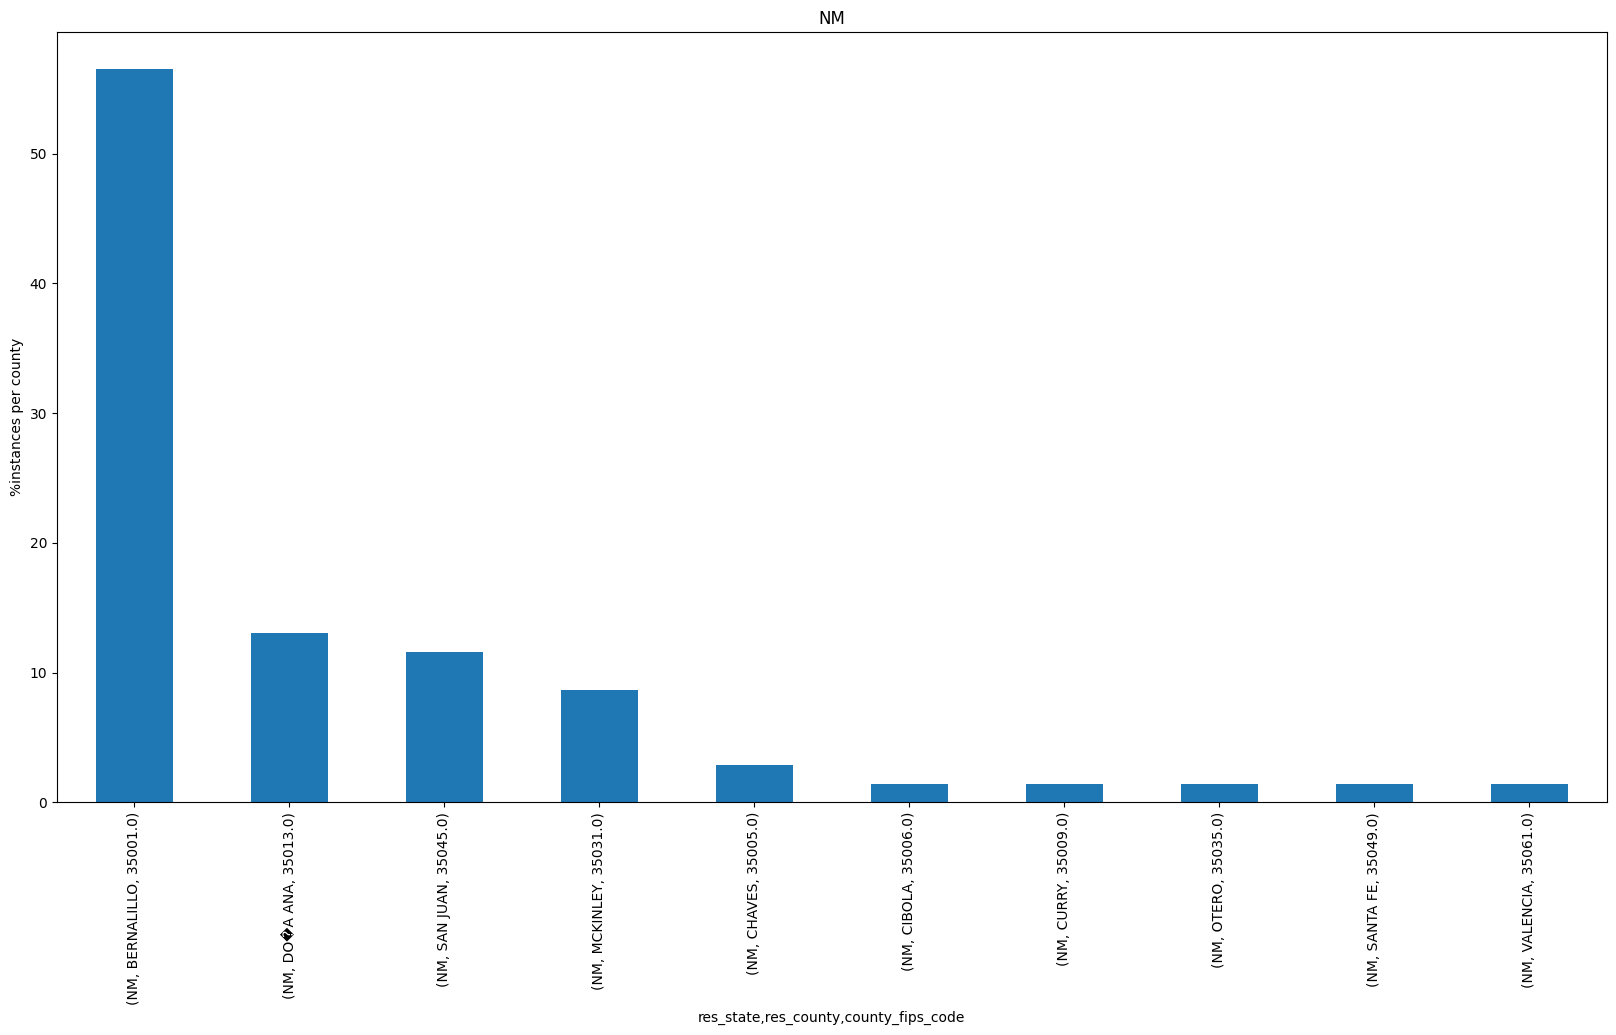

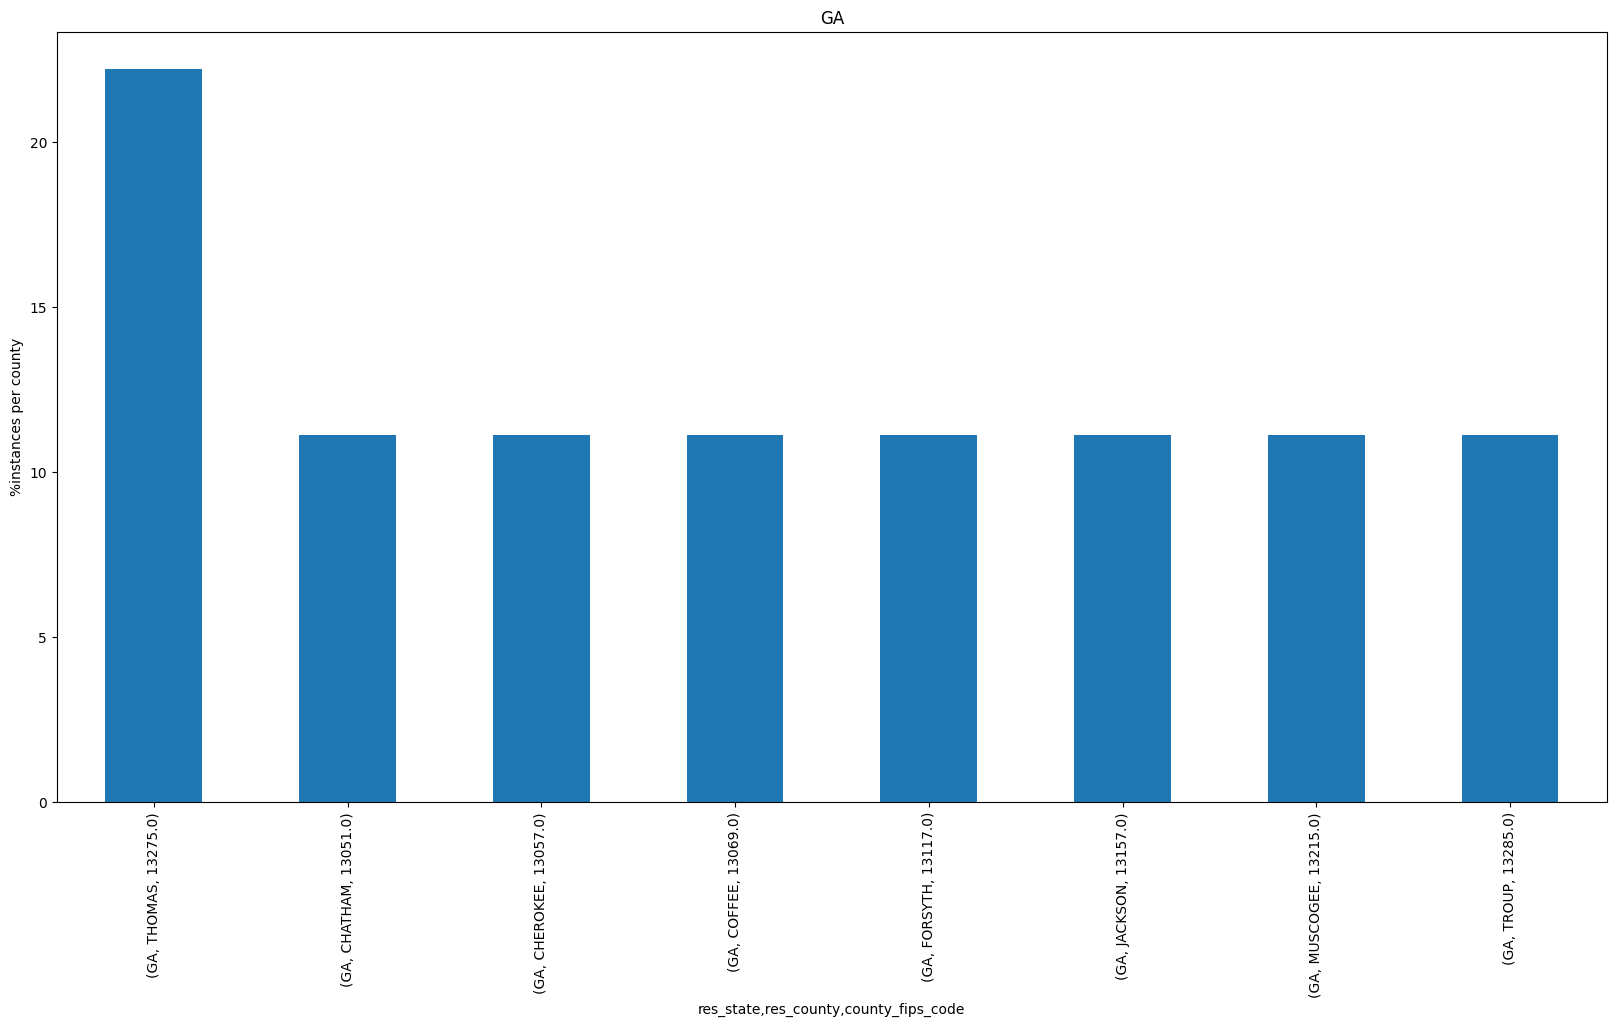

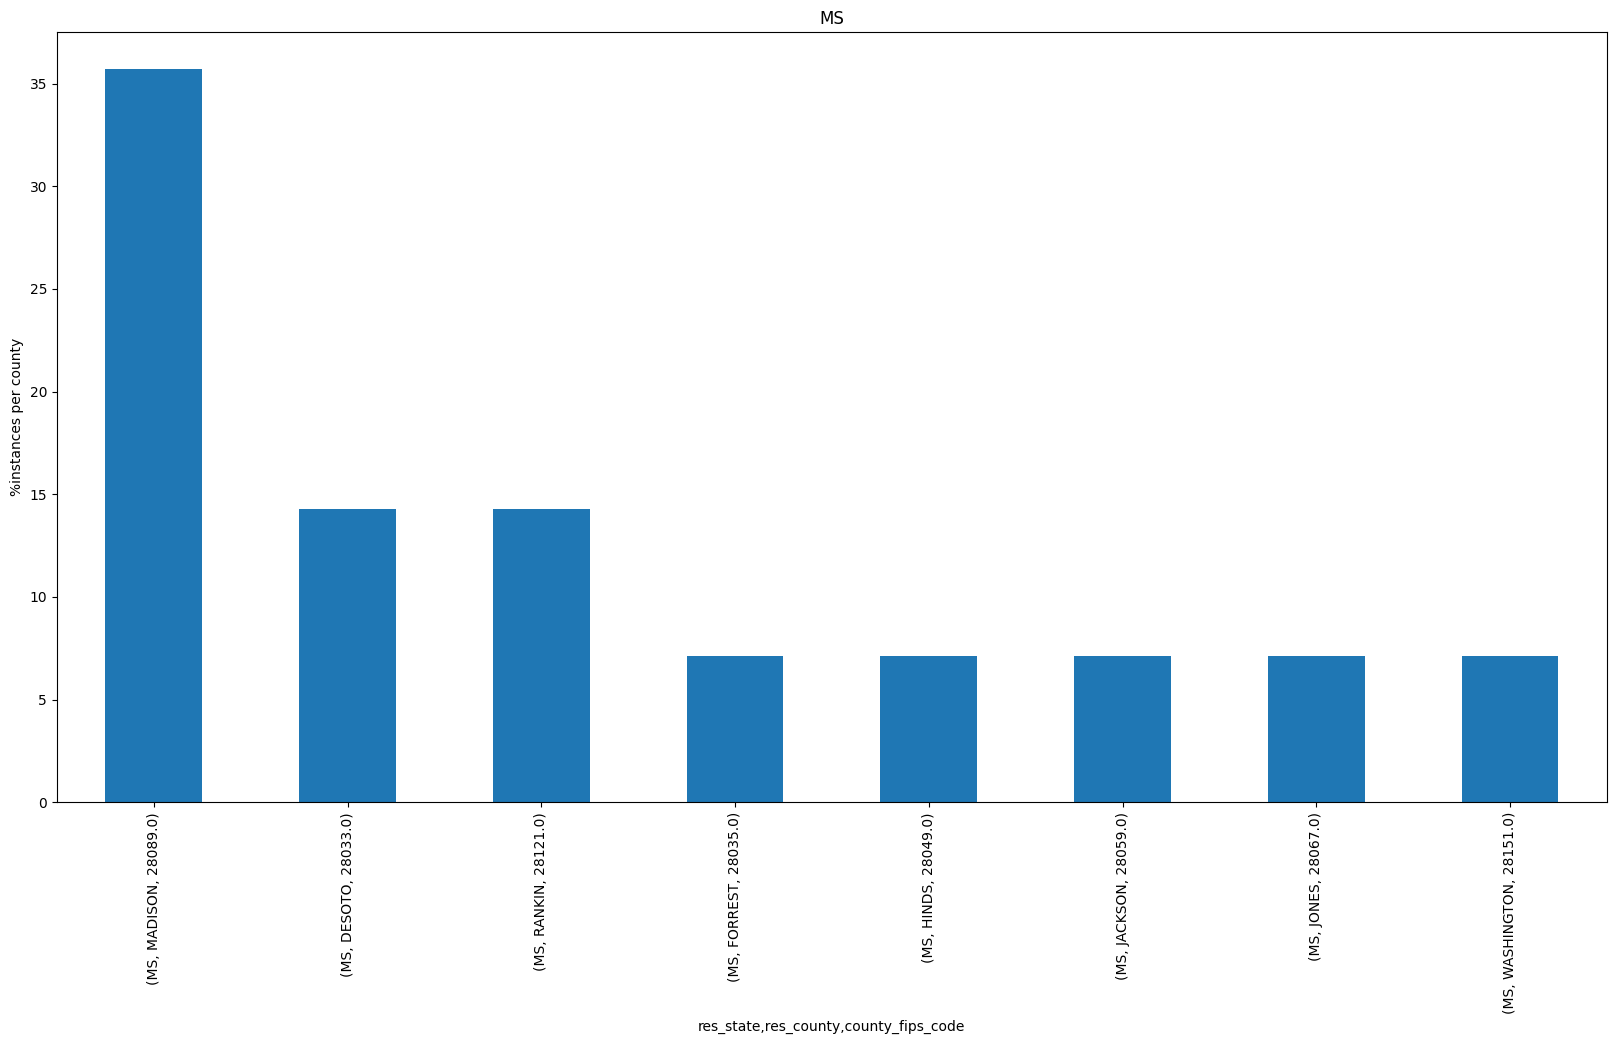

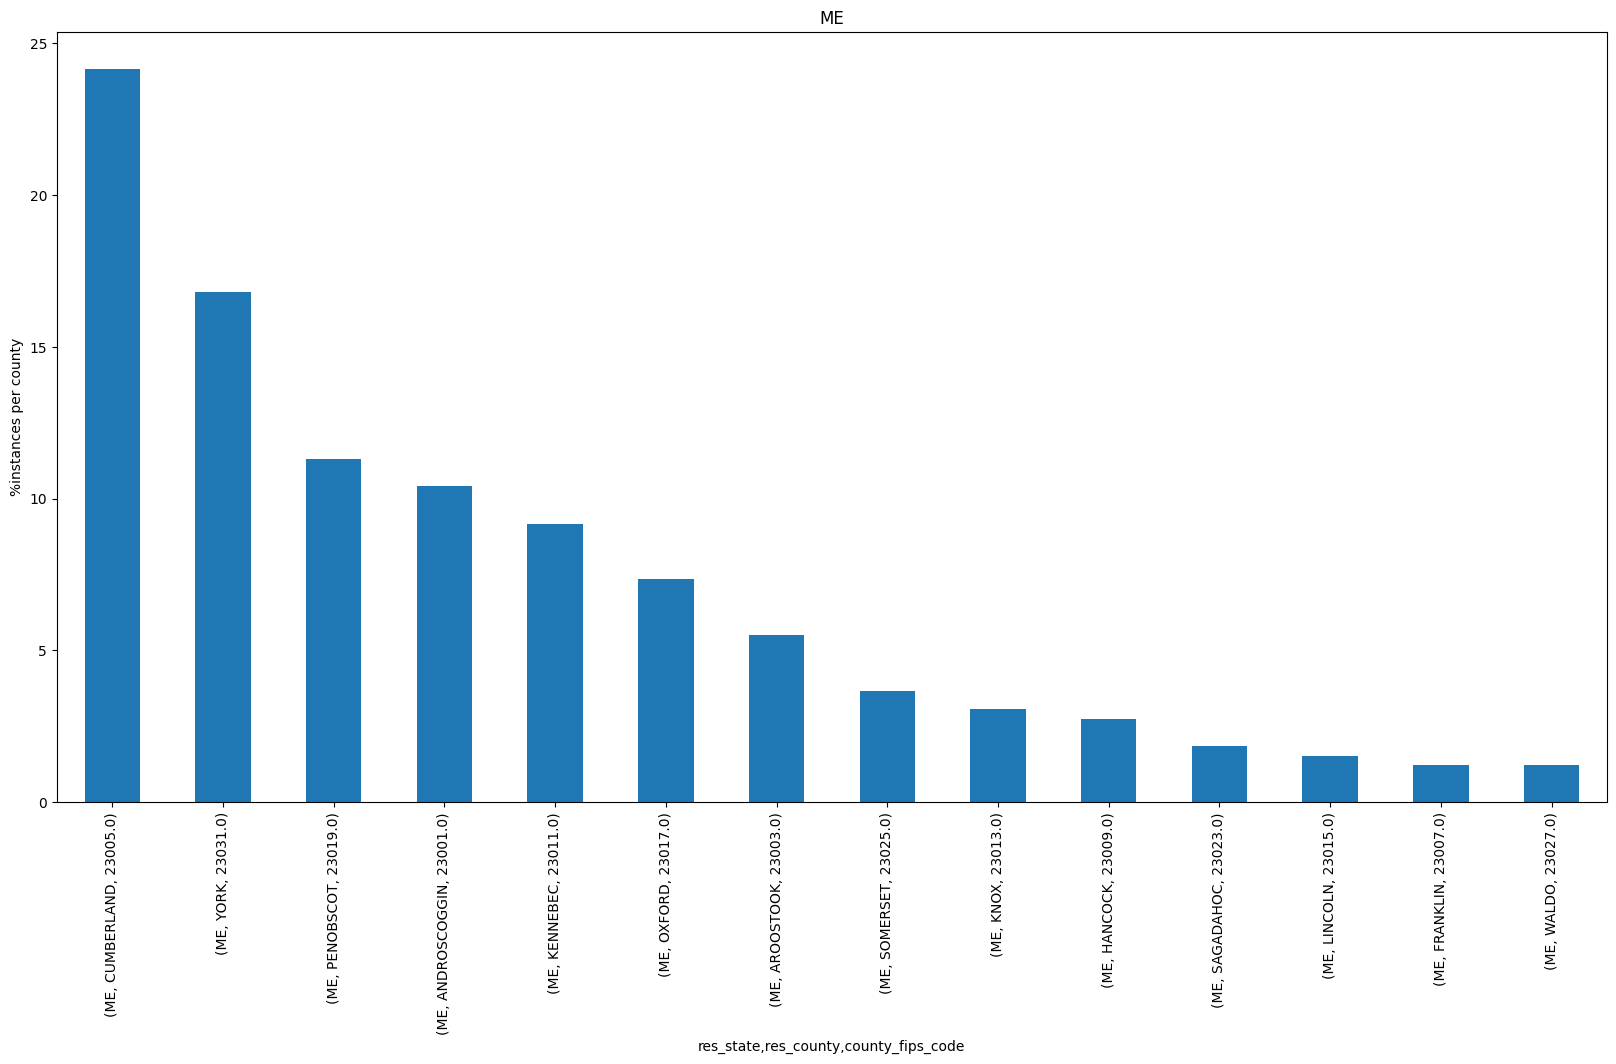

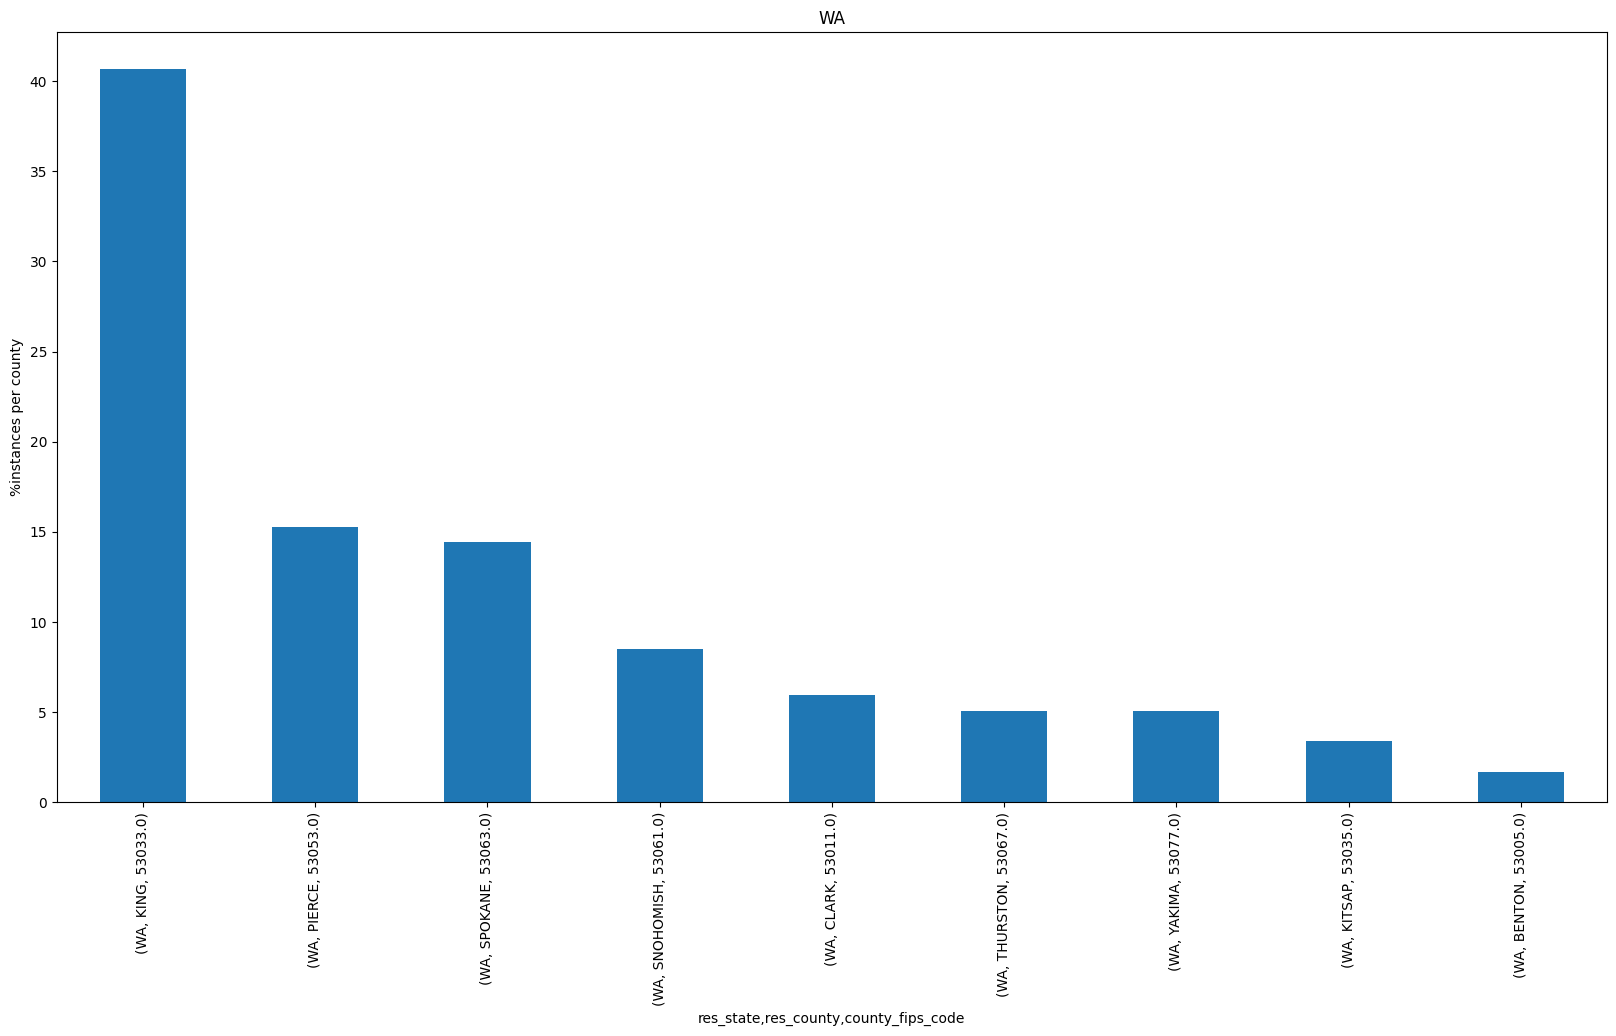

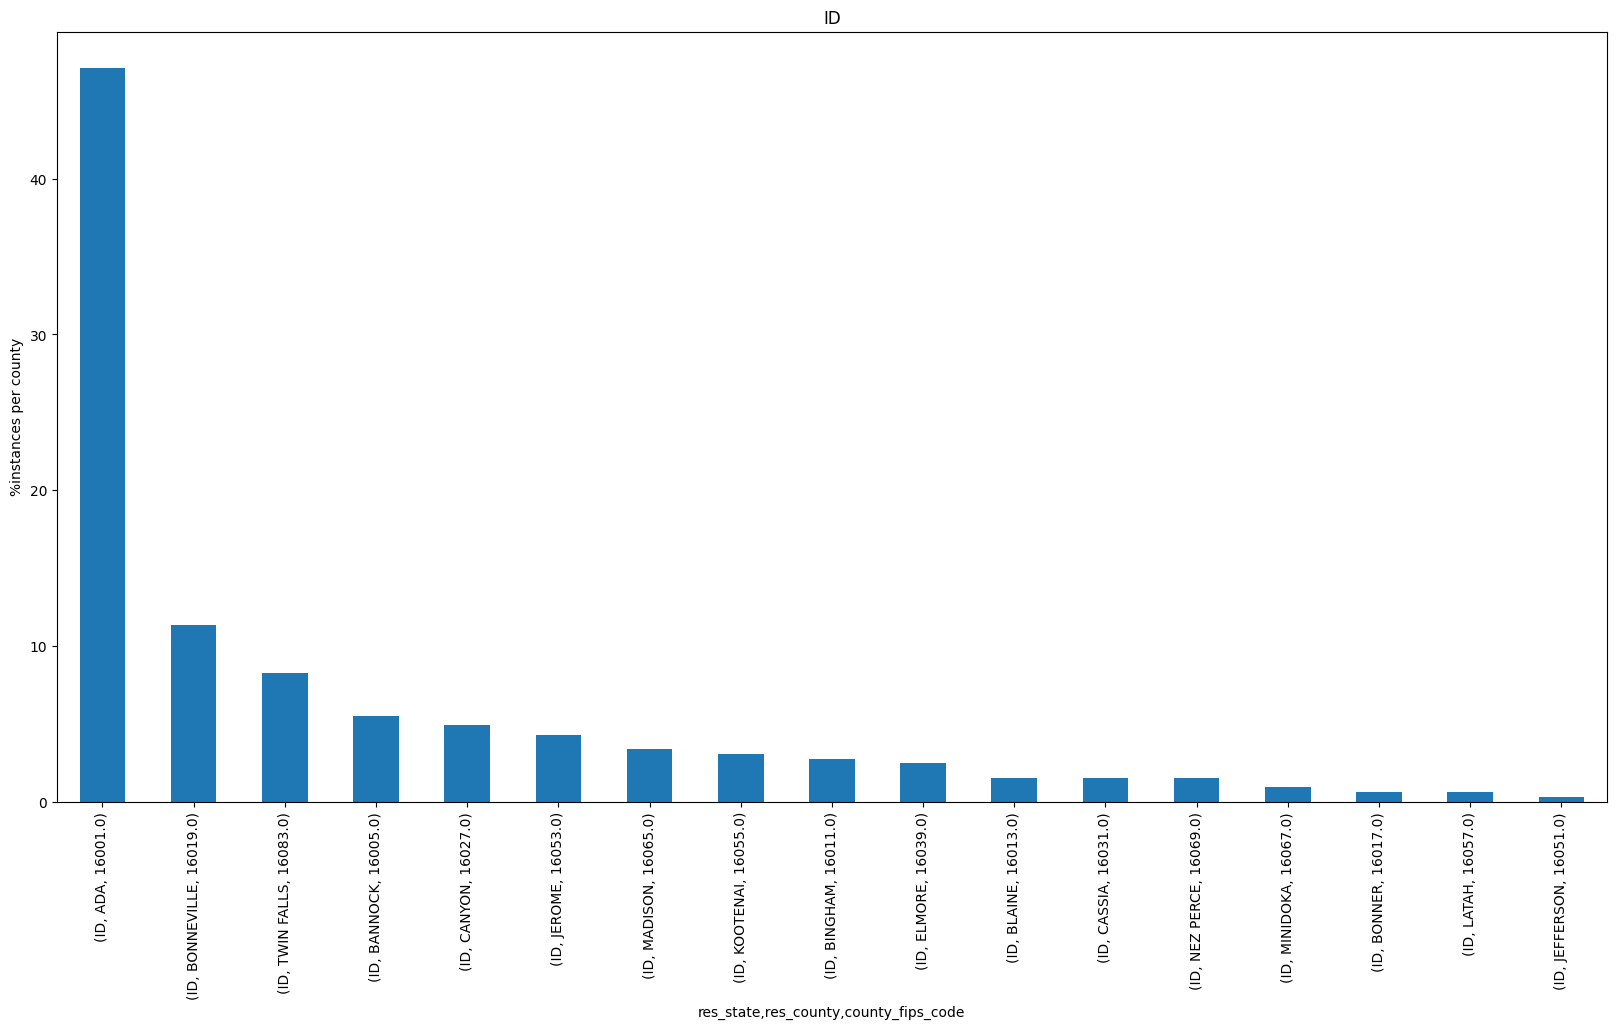

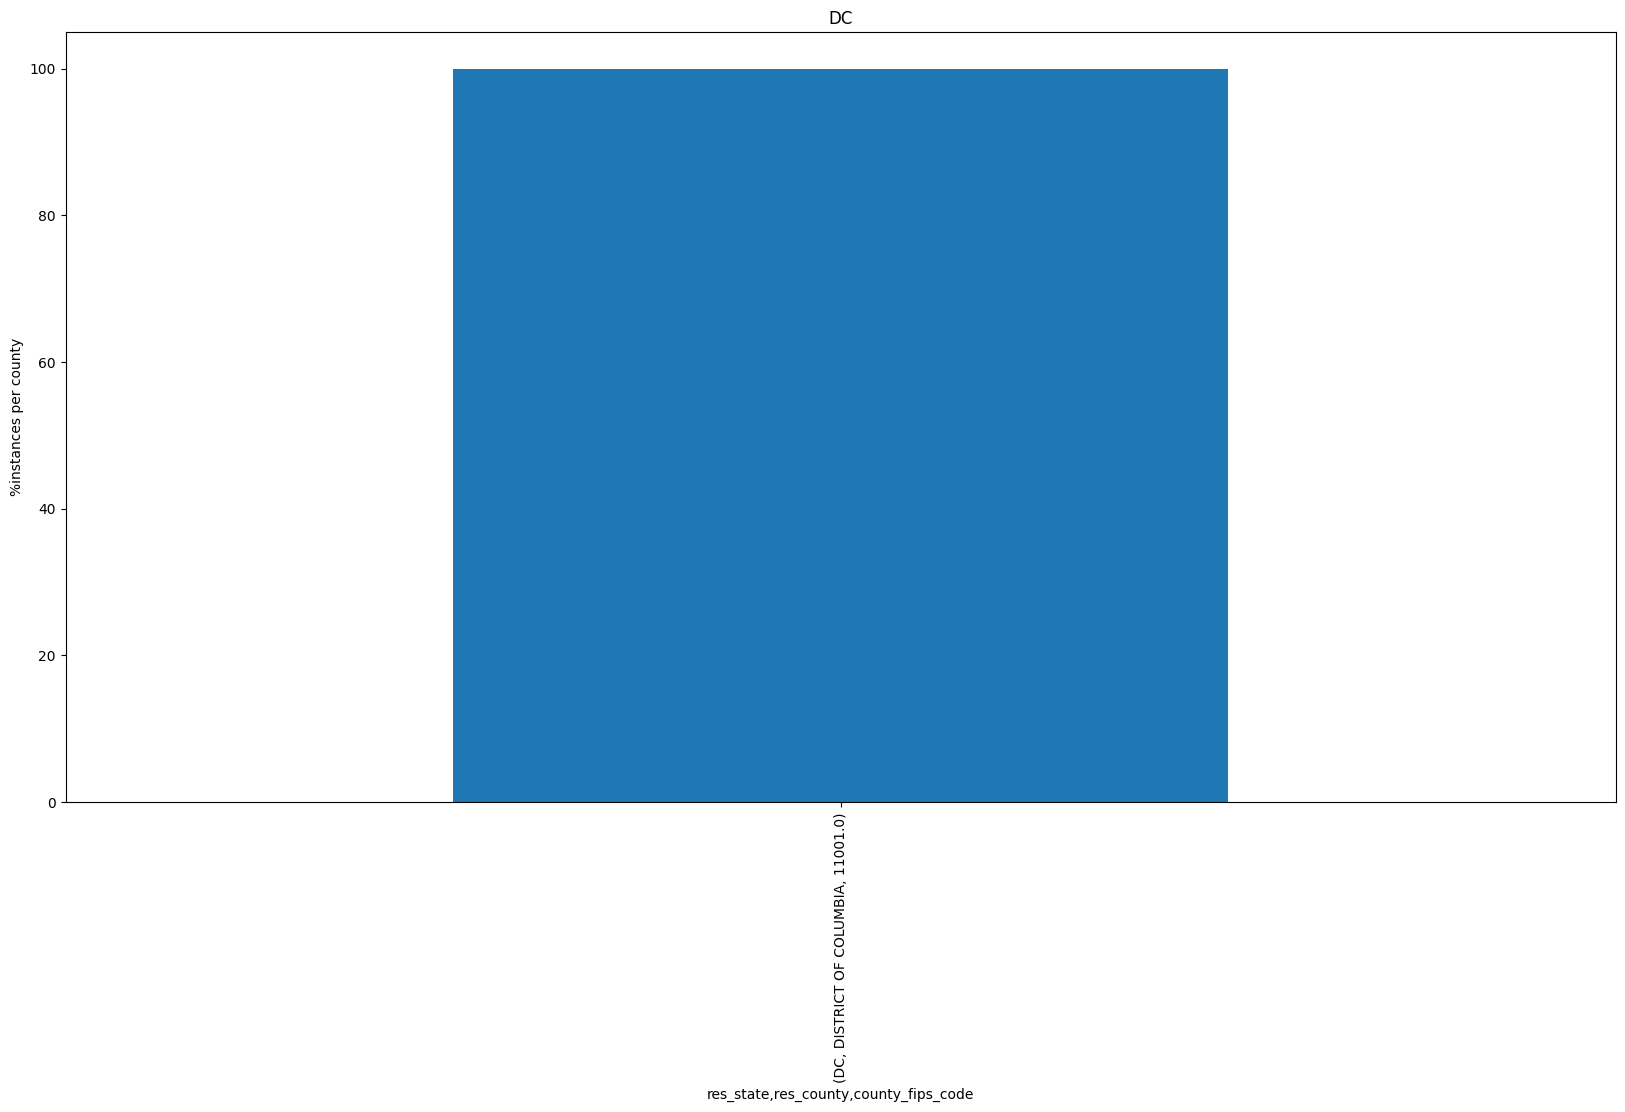

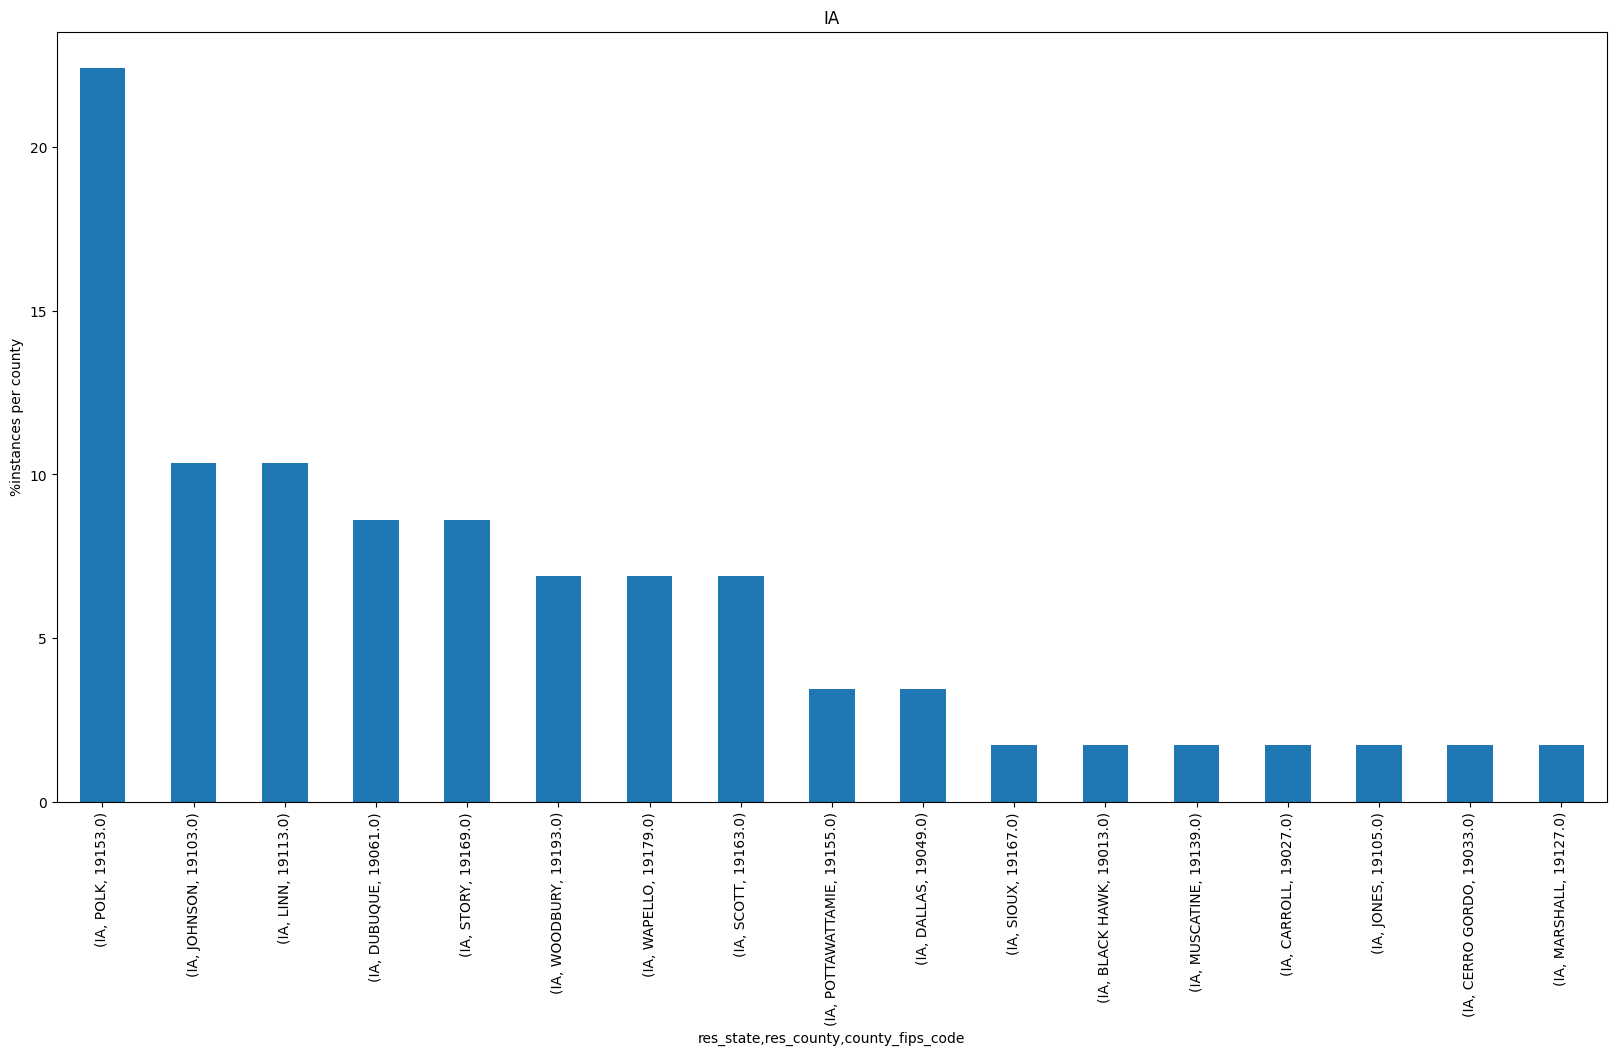

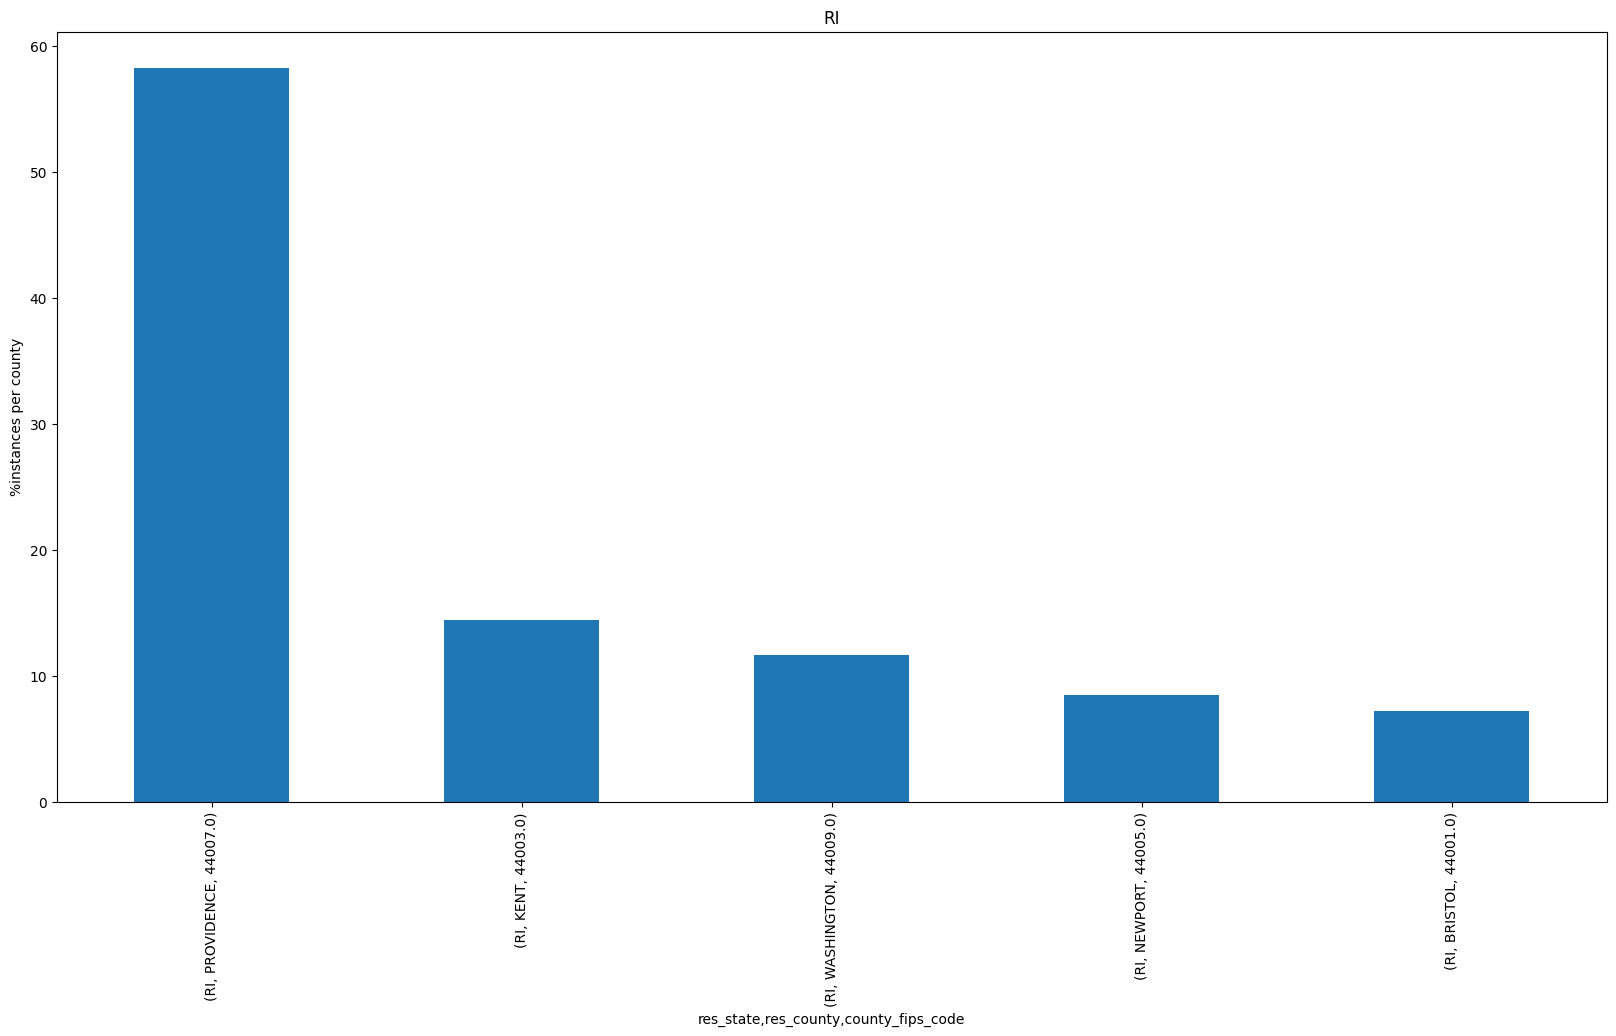

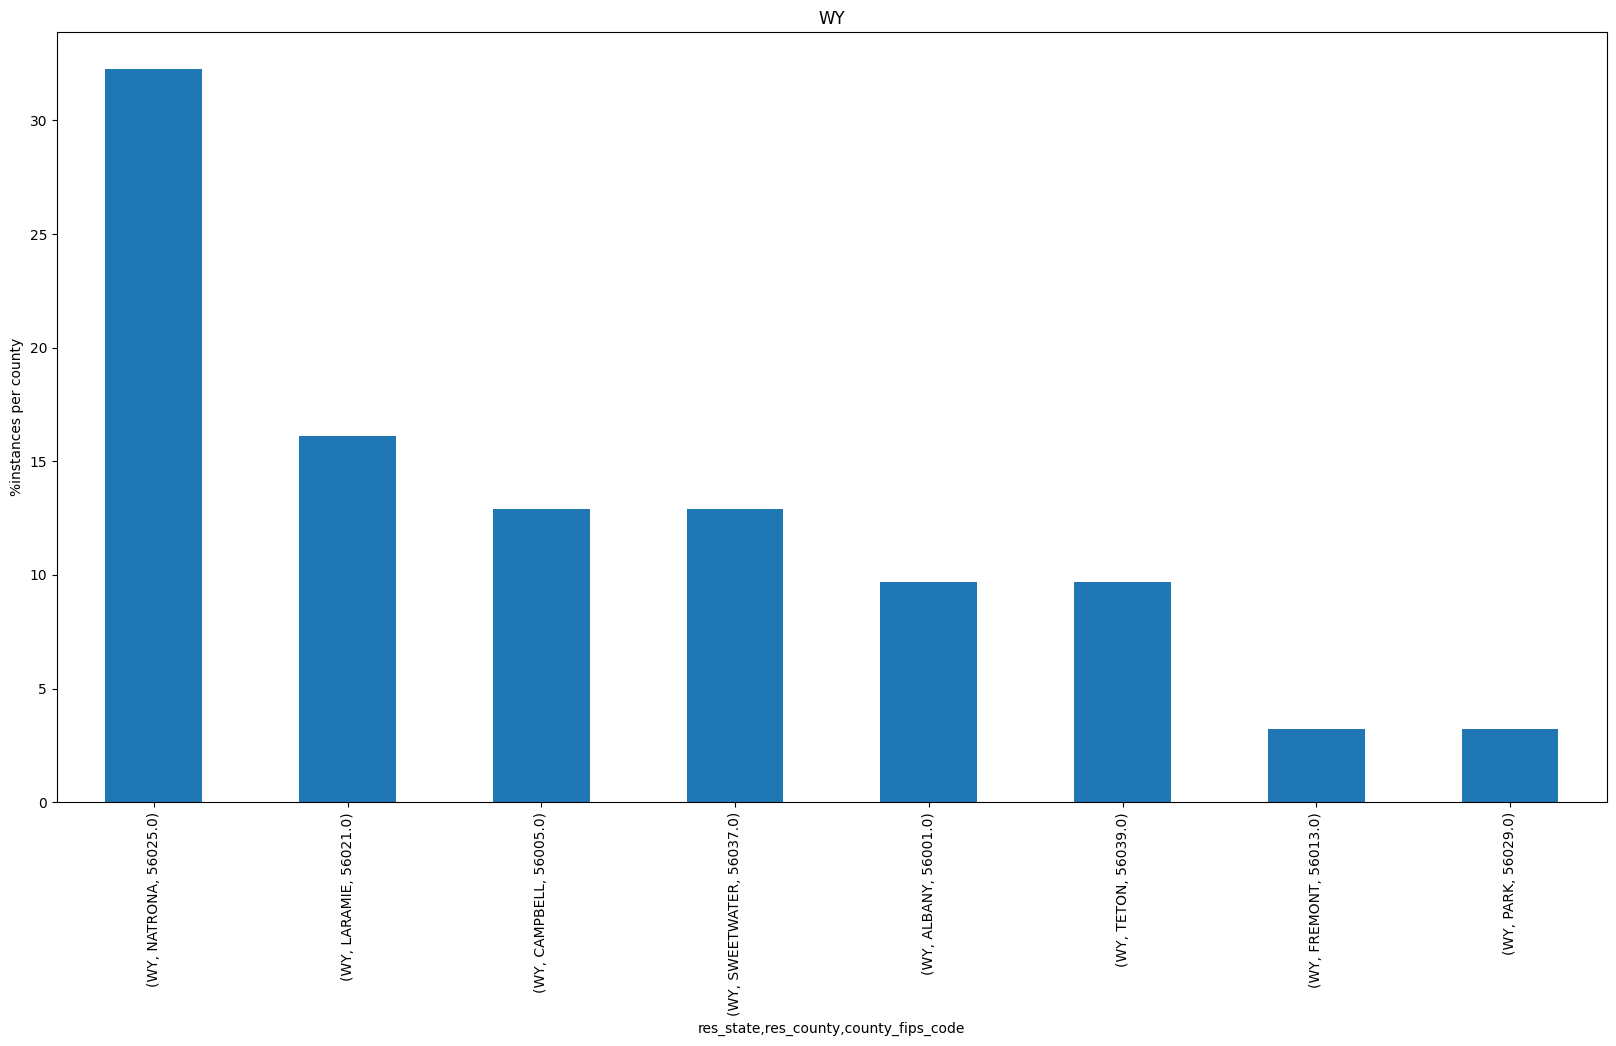

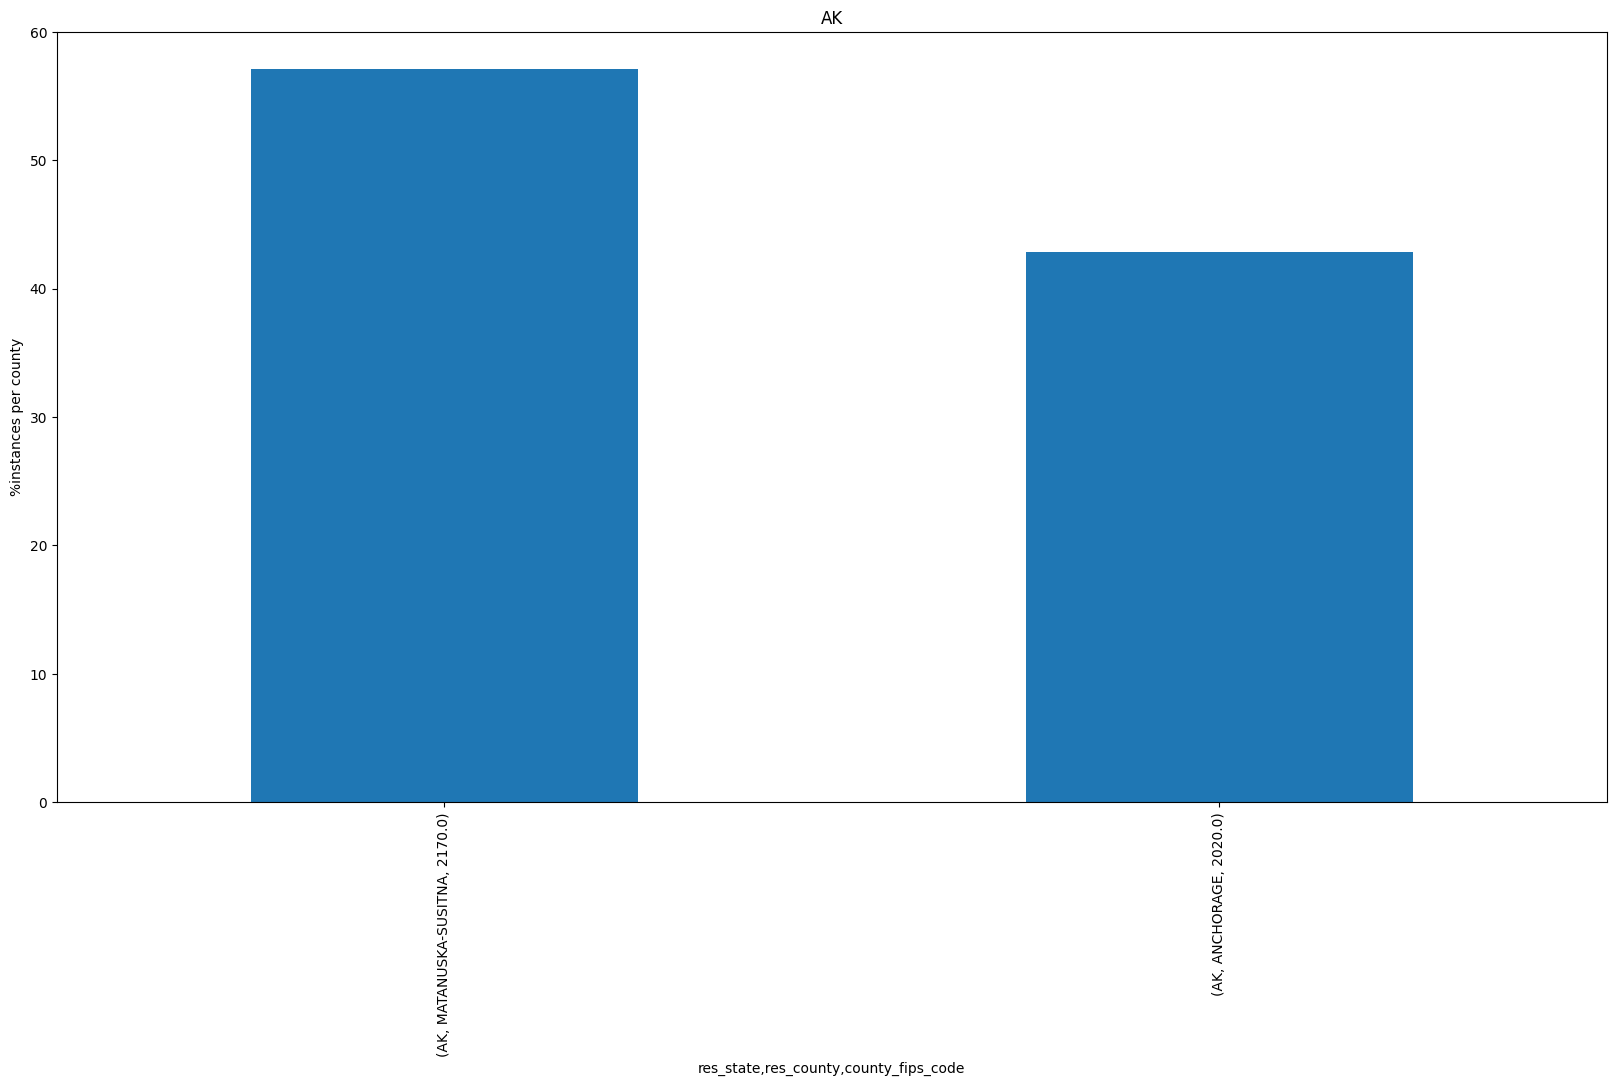

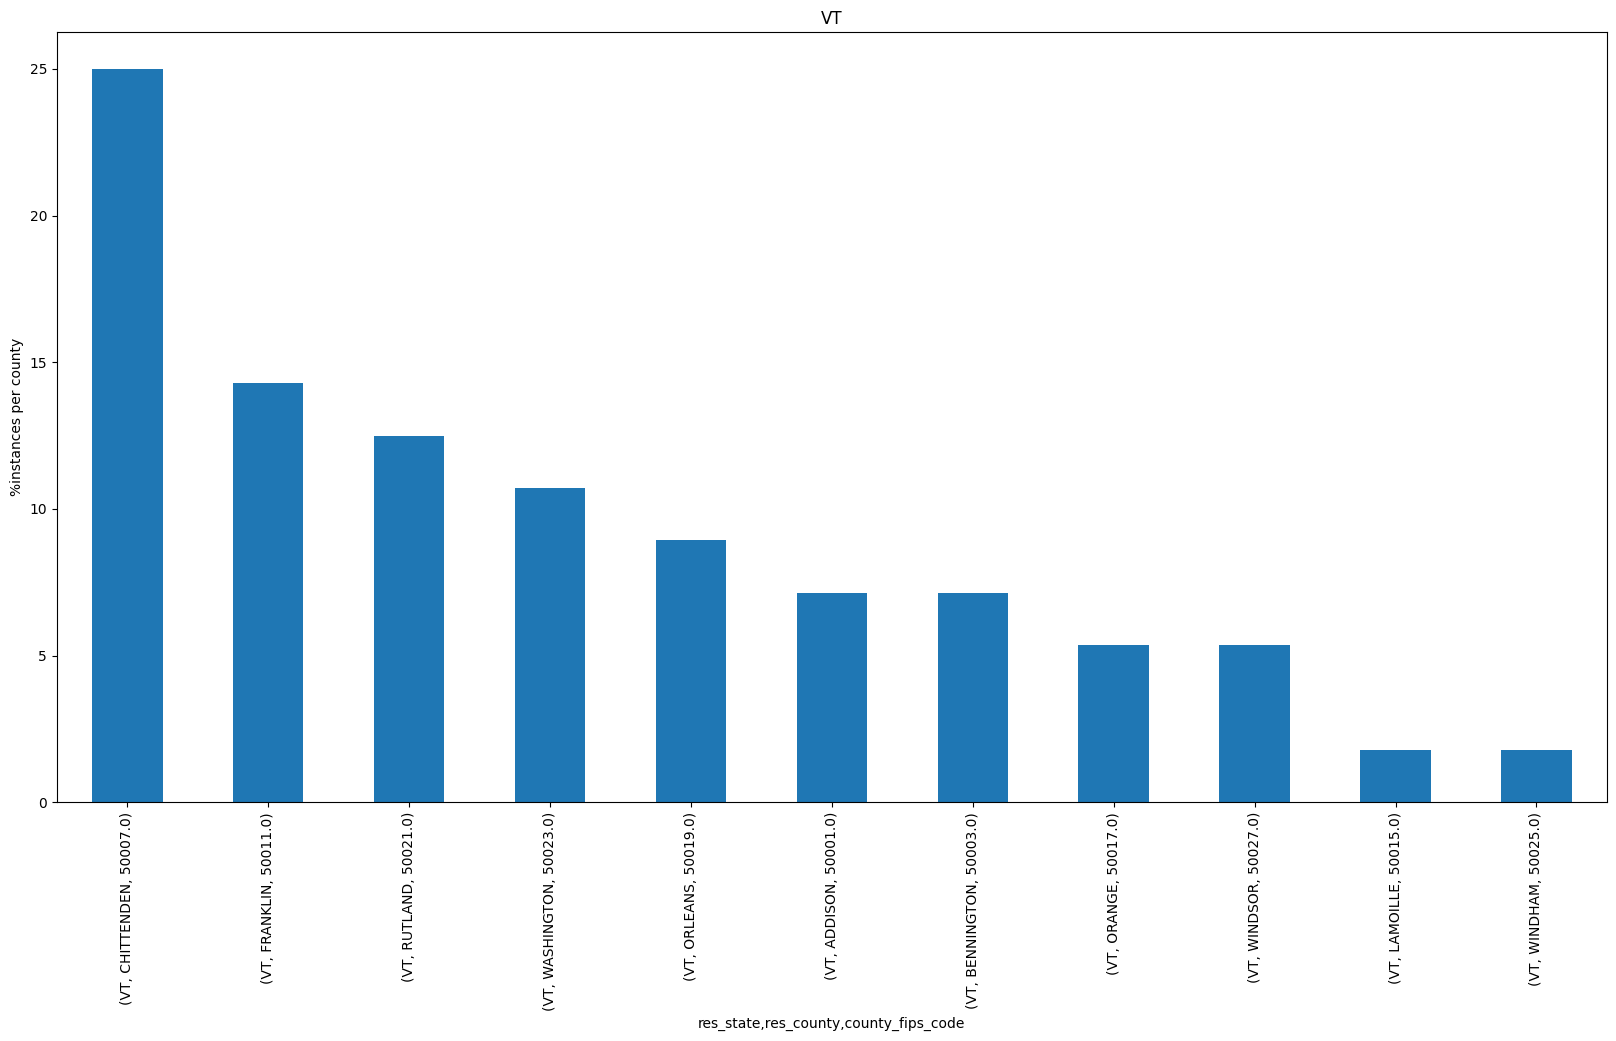

These states had no county breakdowns: ['PR', 'VI', 'GU']


In [37]:
# Breakdown the state level data into their constitute counties
df_state = df["res_state"].unique()
df_state_county = df[["res_state", "res_county", "county_fips_code"]]

no_data = []

for state in df_state:
    df_temp = df_state_county.loc[df_state_county["res_state"] == state]
    if df_temp["county_fips_code"].count() == 0:
        no_data.append(state)
    else:
        df_temp_calu_counts = df_temp.value_counts(dropna=False, normalize=True)*100
        temp = df_temp_calu_counts.plot(kind='bar', figsize=(20,10))
        plt.title(state)
        plt.ylabel("%instances per county")
        plt.savefig("categorical_barplot_"+state+"_1-1.png")
        plt.show()

print("These states had no county breakdowns:", no_data)

# Initial Findings
Initial findings and detailed discussion for each feature can be found in the accompanying Data_Quality_Report_Initial_Findings.pdf file

# (2). Create the data quality report and cleaned CSV file

## Actions to be taken based on the issues identified

### Actions
1. res_county, county_fips_code
    a.	NaN values will be replaced with the string ‘Missing’
2.	age_group, race, ethnicity
    a.	NaN and ‘Unknown’ values will be replaced with the string ‘Missing’
3.	sex
    a.	NaN values will be distributed between female and male which are the only two categories recorded in the dataset
4.	process, exposure_yn, icu_yn, underlying_conditions_yn
    a.	Will be dropped as features
5.	case_onset_interval
    a.	Will be dropped as a feature
6. case_positive_specimen_interval
    a.	Negative and NaN values will be change to the mode, 0
7.	hosp_yn, symptom_status
    a.	NaN and ‘Unknown’ values will be replaced with the string ‘Missing’



1. res_county, county_fips_code
    a.	NaN values will be replaced with the string ‘Missing’

In [38]:
df['res_county'] = df['res_county'].cat.add_categories("Missing")
df['county_fips_code'] = df['county_fips_code'].cat.add_categories("Missing")

df['res_county'] = df['res_county'].fillna("Missing")
df['county_fips_code'] = df['county_fips_code'].fillna("Missing")

2.	age_group, race, ethnicity
    a.	NaN and ‘Unknown’ values will be replaced with the string ‘Missing’

In [39]:
df['age_group'] = df['age_group'].cat.add_categories("Missing")
df['race'] = df['race'].cat.add_categories("Missing")
df['ethnicity'] = df['ethnicity'].cat.add_categories("Missing")

df['age_group'] = df['age_group'].fillna("Missing")
df['race'] = df['race'].fillna("Missing")
df['ethnicity'] = df['ethnicity'].fillna("Missing")

3.	sex
    a.	NaN values will be distributed evenly between female and male which are the only two categories recorded in the dataset

In [40]:
num_nan = df["sex"].isnull().sum()
num_females = df['sex'].value_counts()['Female']
proportion_female = num_females / df['sex'].count()
proportion_male = 1 - proportion_female
values = np.concatenate((np.full(math.ceil(num_nan*proportion_female), 'Female'), np.full(math.floor(num_nan*proportion_male), 'Male')))
df.loc[df['sex'].isnull(), 'sex'] = values

4. process, exposure_yn, icu_yn, underlying_conditions_yn
    a. Will be dropped as features

In [41]:
df.drop(columns=["process", "exposure_yn", "icu_yn", "underlying_conditions_yn"], inplace=True)

5.	case_onset_interval
    a.	Will be dropped as a feature

In [42]:
df.drop(columns=["case_onset_interval"], inplace=True)

6. case_positive_specimen_interval
    a.	Negative and NaN will be change to the mode, 0

Number of rows falling test_2: 0
case_positive_specimen_interval
Range is: 0 to 73
Value  %ofData
0     94.5575
1      4.4700
2      0.5675
3      0.1275
4      0.0700
5      0.0225
7      0.0175
6      0.0125
20     0.0100
10     0.0100
26     0.0100
9      0.0100
8      0.0100
32     0.0075
31     0.0075
22     0.0075
14     0.0075
16     0.0050
53     0.0050
27     0.0050
Name: case_positive_specimen_interval, dtype: float64 



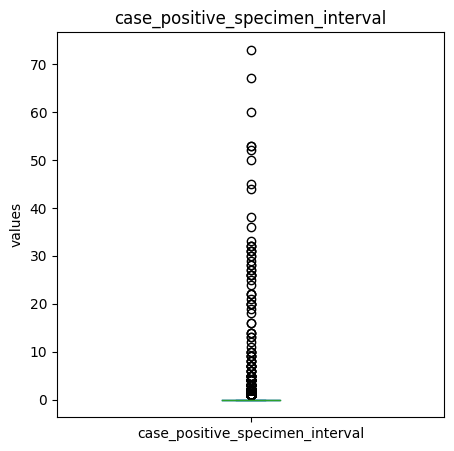

In [43]:
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].mask(df['case_positive_specimen_interval'].lt(0), 0)
print('Number of rows falling test_2:', (df[["case_positive_specimen_interval"]][df["case_positive_specimen_interval"] < 0]).shape[0])
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].fillna(0)

#No NaN values and the decimal point is meaningless as this feature is a rounding up to the nearest week so changed to an integer
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].astype('int64')

#Check the percentage proportion of the 20 largest values in the feature
df_unique_interval_instances = (df['case_positive_specimen_interval'].value_counts(normalize=True)*100).nlargest(20)
print('case_positive_specimen_interval')
print("Range is:", df['case_positive_specimen_interval'].min(), "to", df['case_positive_specimen_interval'].max())
print('{0:.5}  {1}'.format("Value", "%ofData"))
print(df_unique_interval_instances, "\n")

#Checking outliers once the negative values have been removed
df['case_positive_specimen_interval'].plot(kind='box', figsize=(5, 5))
plt.title('case_positive_specimen_interval')
plt.ylabel('values')
plt.show()

There are many outliers still in the feature, however, they could be legitimate as there may have been a long lag time for some cases.This is the time between when the CDC may have been notified about a case or the sample taken and when the symptoms began. I can not conclude that the outliers are wrong, so I have left them in the dataset in order to prevent cleaning the data too much for machine learning algorithms. There is also a high instance of 0, however, the column will not be dropped as in case_onset_interval as the 2nd, 3rd and 4th mode take up a higher proportion of values for this feature.

In [44]:
df['symptom_status'] = df['symptom_status'].cat.add_categories("Missing")
df['hosp_yn'] = df['hosp_yn'].cat.add_categories("Missing")

df['symptom_status'] = df['symptom_status'].fillna("Missing")
df['hosp_yn'] = df['hosp_yn'].fillna("Missing")

Check on whether all appropriate columns have been removed and NaN values replaced or imputed

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case_month                       40000 non-null  category
 1   res_state                        40000 non-null  category
 2   state_fips_code                  40000 non-null  category
 3   res_county                       40000 non-null  category
 4   county_fips_code                 40000 non-null  category
 5   age_group                        40000 non-null  category
 6   sex                              40000 non-null  category
 7   race                             40000 non-null  category
 8   ethnicity                        40000 non-null  category
 9   case_positive_specimen_interval  40000 non-null  int64   
 10  current_status                   40000 non-null  category
 11  symptom_status                   40000 non-null  category
 12  hosp

### Summary of data quality plan:

| Feature Names                      | Data Quality Issue                     | Handling Strategy                |
|------------------------------------|----------------------------------------|----------------------------------|
| case_month                         | None                                   | Do Nothing                       |
| res_state                          | None                                   | Do Nothing                       |
| state_fips_code                    | None                                   | Do Nothing                       |
| res_county                         | Missing Values (6%)                    | Replace with 'Missing'           |
| county_fips_code                   | Missing Values (6%)                    | Replace with 'Missing'           |
| age_group                          | Missing Values (0.8%)                  | Replace with 'Missing'           |
| sex                                | Missing Values (2%)                    | Impute based on data proportions |
| race                               | Missing Values (23%)                   | Replace with 'Missing'           |
| ethnicity                          | Missing Values (31%)                   | Replace with 'Missing'           |
| case_onset_interval                | Constant Column                        | Drop                             |
| case_process_specimen_interval     | Negative Values & Missing Values (56%) | Replace with mode                |
| process                            | Missing Values (91%)                   | Drop                             |
| exposure_yn                        | Constant Column                        | Drop                             |
| current_status                     | None                                   | Do Nothing                       |
| sympotom_status                    | Missing Values (53%)                   | Replace with 'Missing'           |
| hosp_yn                            | Missing Values (33%)                   | Replace with 'Missing'           |
| icu_yn                             | Missing Values (91%)                   | Drop                             |
| death_yn                           | None                                   | Do Nothing                       |
| underlying_conditions_yn           | Missing Values (91%)                   | Drop                             |

### - Save the new dataframe in a CSV file and the data quality plan pdf.


Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [46]:
# Write the cleaned dataframe to a csv file
df.to_csv('covid19_cdc_19211297_cleaned_1-2.csv', index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

Given that 5 features had to be dropped and the majority of features are categorical, the pairwise feature interaction I will examine are the below:
- Number of deaths by sex
- Number of deaths by race
- Number of deaths by state
- Number of hospitalisations by state
- Number of hospitalisations by sex
- Heatmap of case month, state, age group, sex, race, ethnicity, current status, syptom status, hospitalisation against deaths

and the following categorical-continuous relationship:
- Relationship between state and case positive specimen interval

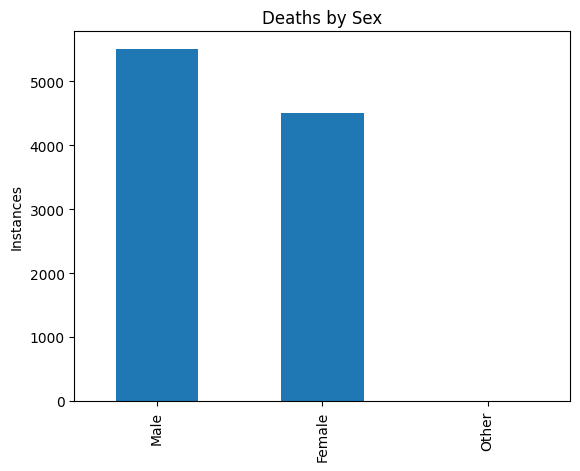

In [47]:
# Deaths by sex
df_deaths = df[df['death_yn'] == "Yes"]
df_deaths['sex'].value_counts().plot(kind='bar')
plt.ylabel("Instances")
plt.title("Deaths by Sex")
plt.show()

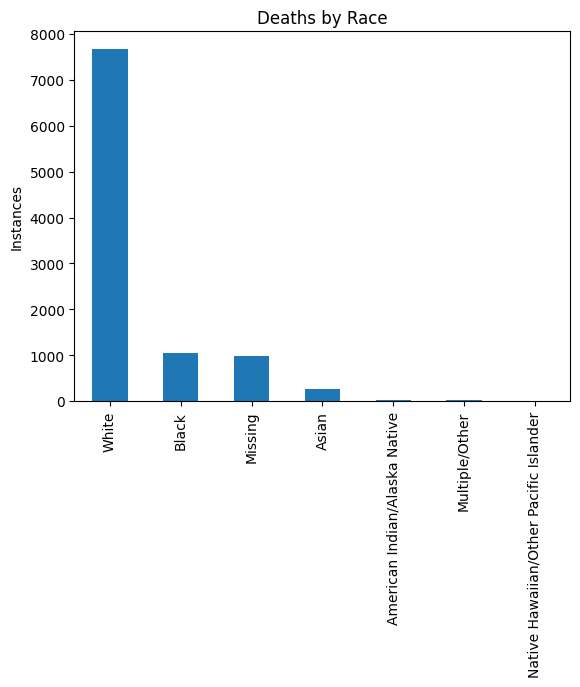

In [48]:
# Deaths by race
df_deaths['race'].value_counts().plot(kind='bar')
plt.ylabel("Instances")
plt.title("Deaths by Race")
plt.show()

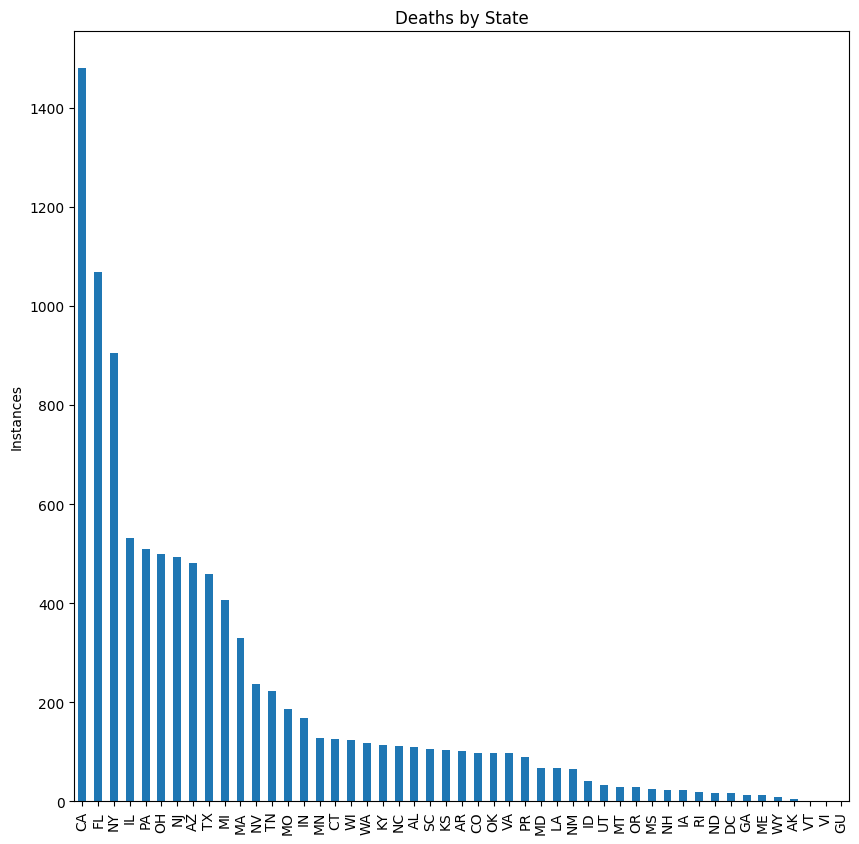

In [49]:
# Deaths by state
df_deaths['res_state'].value_counts().plot(kind='bar', figsize=(10,10))
plt.ylabel("Instances")
plt.title("Deaths by State")
plt.show()

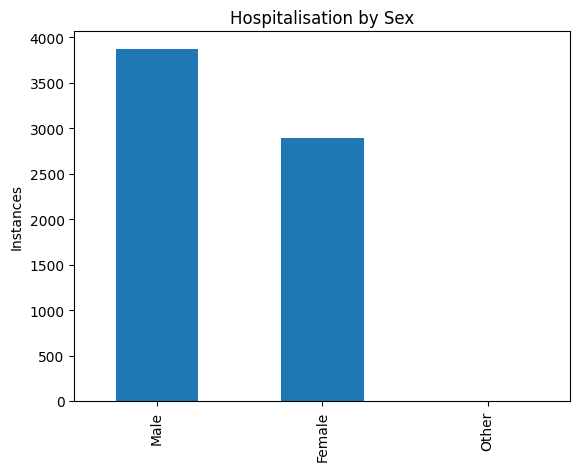

In [50]:
# Hospitalisations by sex
df_hosp = df[df['hosp_yn'] == "Yes"]
df_hosp['sex'].value_counts().plot(kind='bar')
plt.ylabel("Instances")
plt.title("Hospitalisation by Sex")
plt.show()

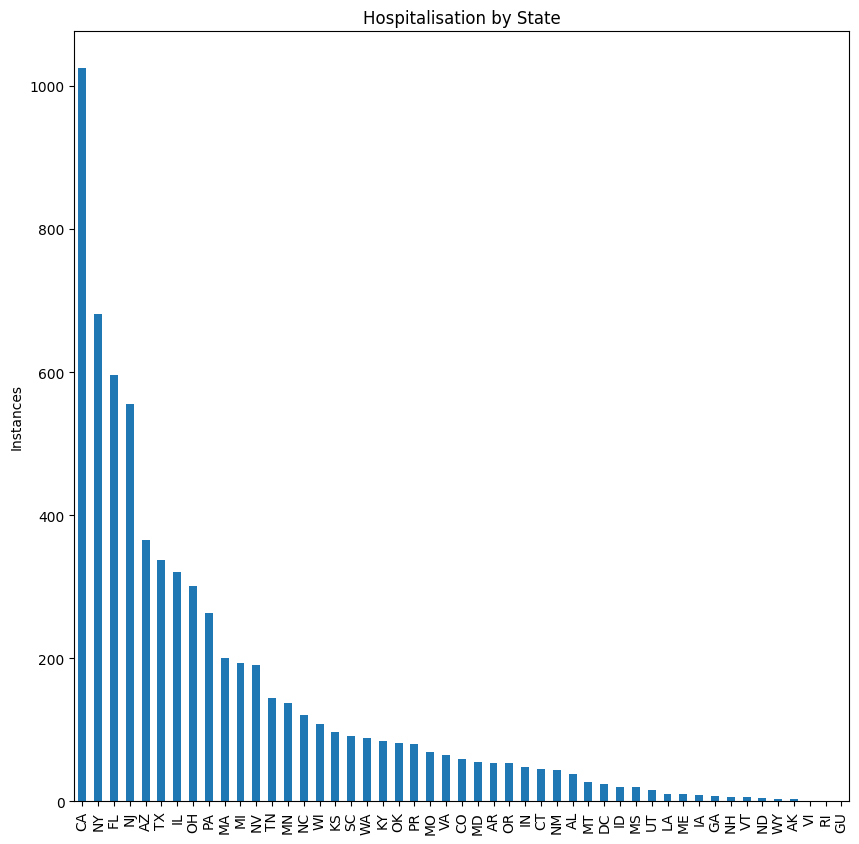

In [51]:
# Hospitalisations by state
df_hosp['res_state'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.ylabel("Instances")
plt.title("Hospitalisation by State")
plt.show()

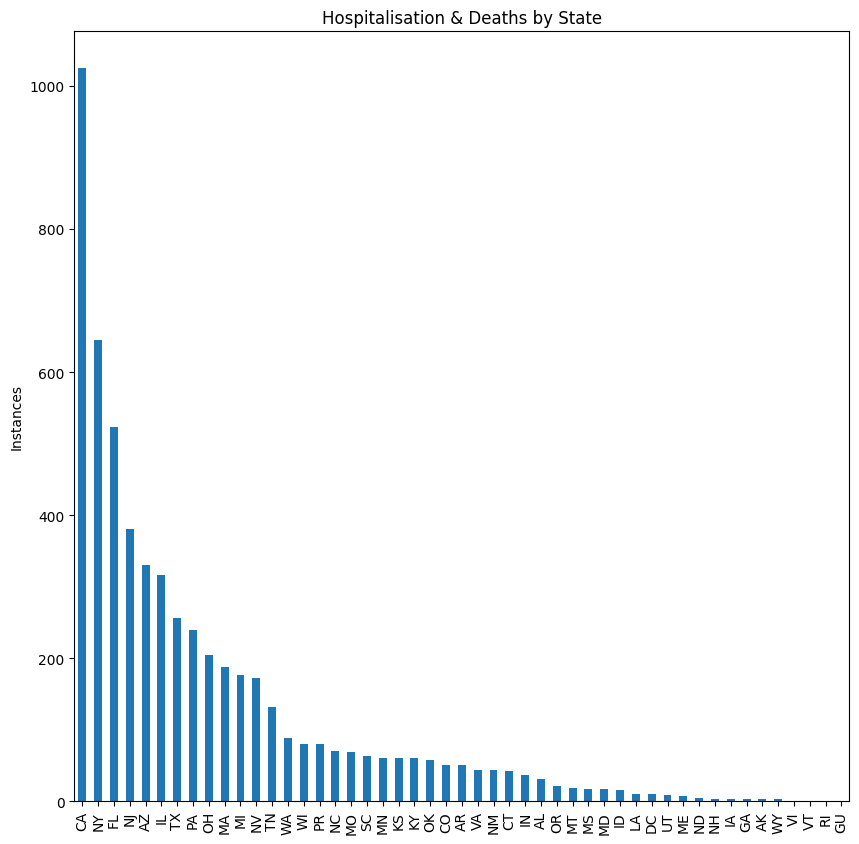

In [52]:
# Hospitalisations & deaths by sex
df_deaths_hosp = df_deaths
df_deaths_hosp = df_deaths_hosp[df_deaths_hosp['hosp_yn'] == "Yes"]
df_deaths_hosp['res_state'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.ylabel("Instances")
plt.title("Hospitalisation & Deaths by State")
plt.show()

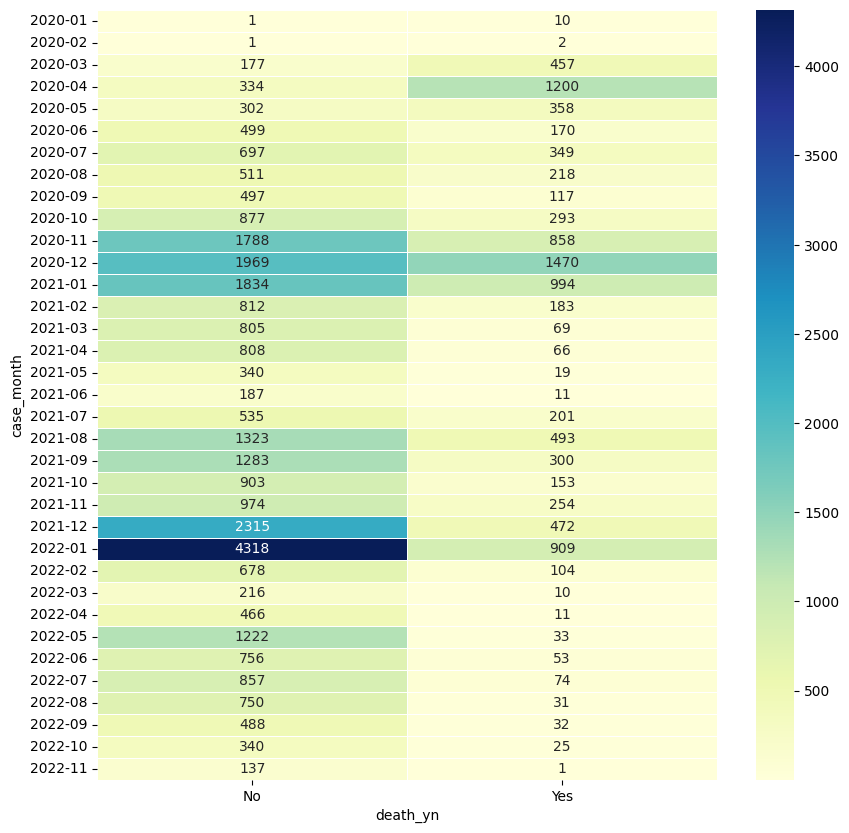

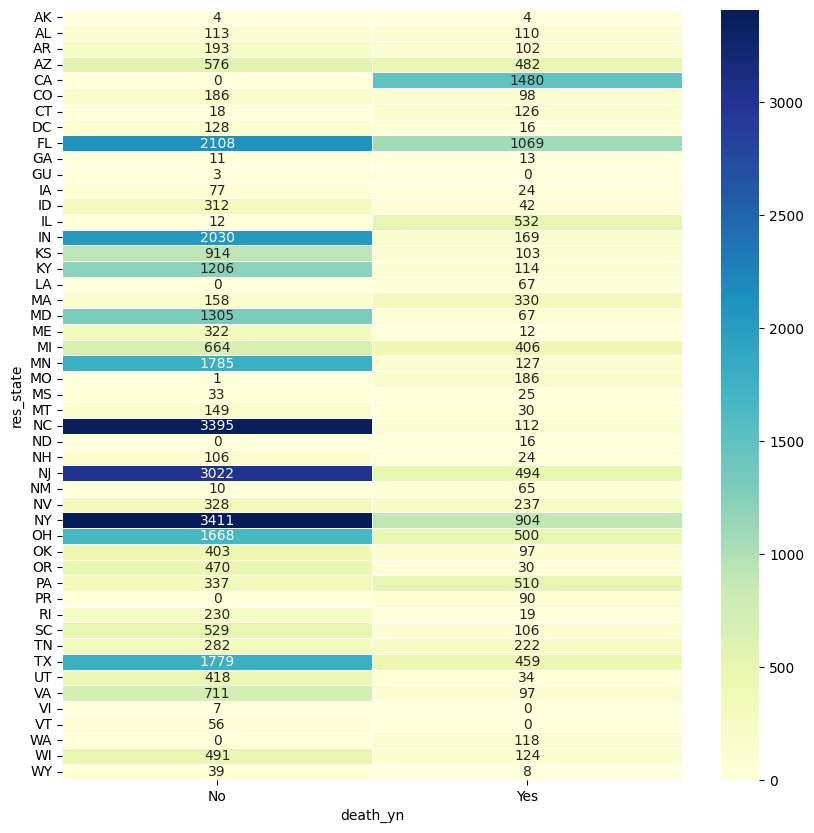

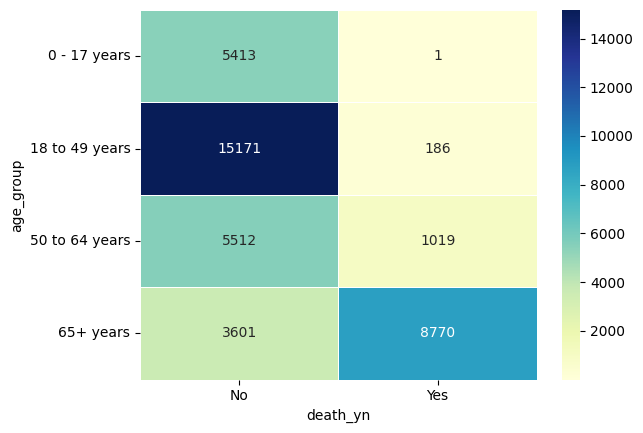

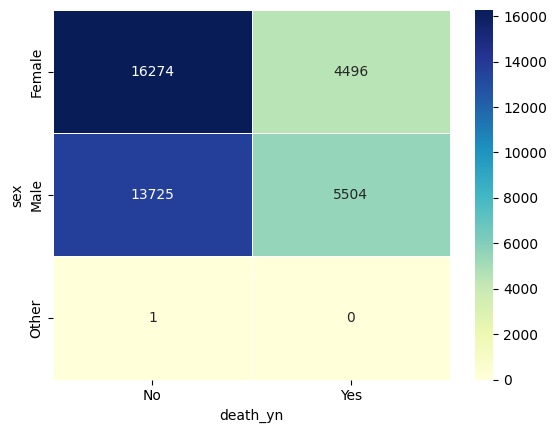

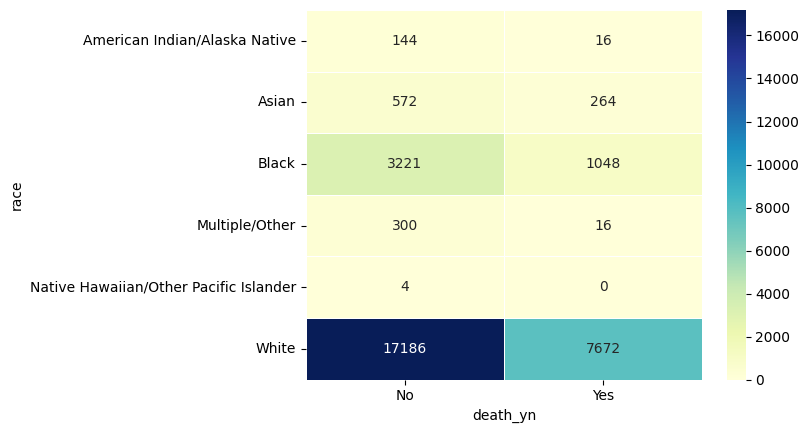

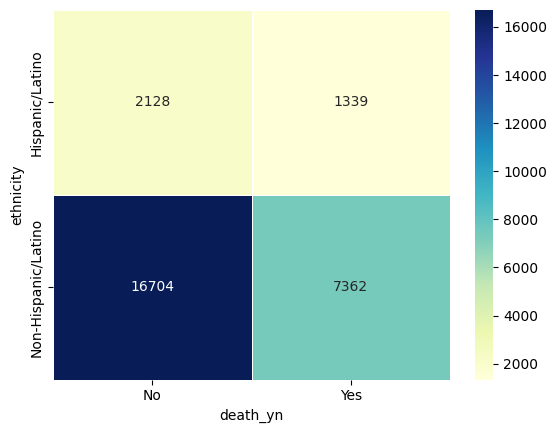

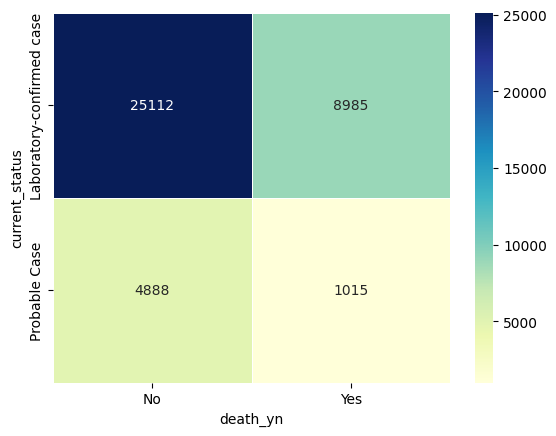

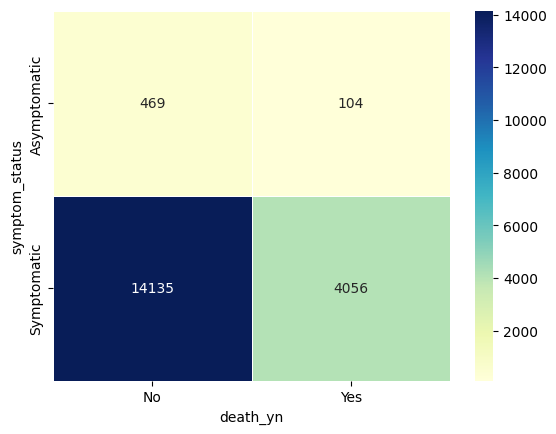

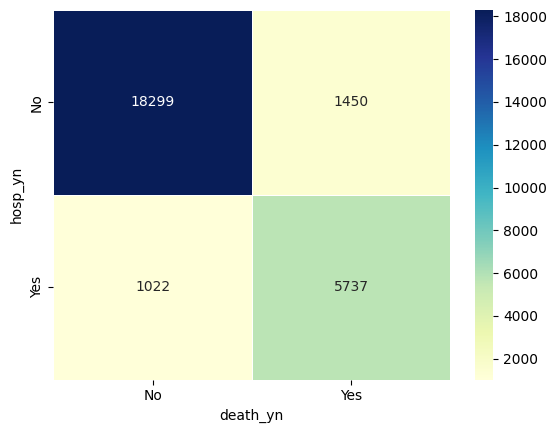

In [53]:
# Ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html

df_cleaned_category_columns = df.select_dtypes('category').columns
df_cleaned_category_columns_no_deaths = df_cleaned_category_columns.drop(['death_yn', 'state_fips_code', 'res_county', 'county_fips_code'])

#Remove missing values from the graph by making them NaN
df_no_missing_values = df.replace("Missing", np.nan)

for column in df_cleaned_category_columns_no_deaths:
    if column == "res_state" or column == "case_month":
        fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(pd.crosstab(df_no_missing_values[column], df_no_missing_values['death_yn']),cmap='YlGnBu', linewidth=.5, fmt='d', annot=True)
    plt.show()

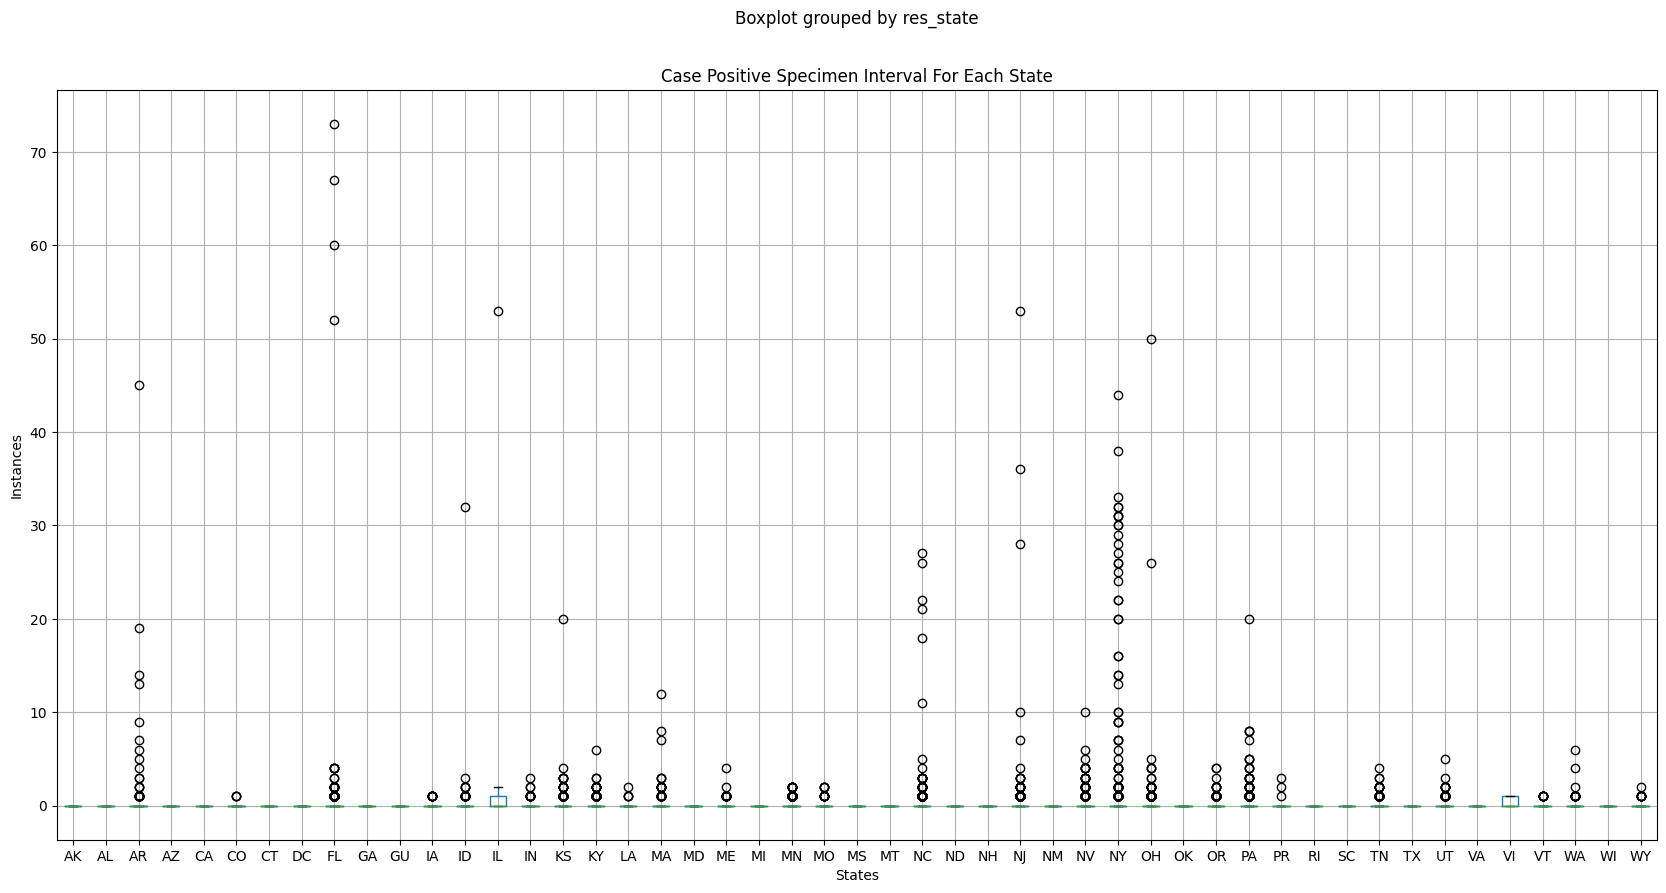

In [54]:
# Relationship number of instances between case positive specimen interval for each state
df.boxplot(column=['case_positive_specimen_interval'], by=['res_state'], figsize=(20,10))
plt.title('Case Positive Specimen Interval For Each State')
plt.ylabel('Instances')
plt.xlabel('States')
plt.show()

## Discussion of Findings so Far
### Sex:
* We can see that even though a slightly higher percentage of females had Covid-19, more males died from it which is interesting.
* Also interesting is that more males were hospitalised with Covid-19

### Race
* Unsurprisingly more people in the White category of the race feature died as a result of Covid-19, this is unsurprising given the higher incidence of the illness in this cohort

### State
* While, NY had the highest incidence of cases, it only had the 3rd highest incidence of deaths and 2nd highest incidence of hospitalisations in the dataset. CA had the highest deaths and hospitalisation, while it had the 9th highest incidence of cases. This may be due to underreporting of numbers in CA because of a relative lack of facilities for testing to NY or less willingness of the population to undergo testing.
* FL is also relatively higher, at 2nd highest for deaths and 3rd highest for hospitalisation but 4th for number of cases.
* This is an interesting relationship, however, a domain expert would be needed to make appropraite conclusions.

### Heatmaps:
* The heatmap shows that the most amount of cases occured in 2020-01 with a relatively high number of deaths but the most deaths occured earlier in the pandemic, in 2020-12. There was the most deaths in the period 2020-11 to 2021-01 which is very interesting
* While the 18-49 age group had the highest incidence of cases, it had one of the lowest deaths. The 65+ age group had the highest deaths which suggests age was a majority contributor to deaths from Covid-19
* Another interesting heatmap is the hospitalisation versus deaths, the data suggests that those that many that were hospitalised died and few died that were not hospitalised. This is an interesting statistic as it suggests that the vast majority received medical care in a hospital if their case was severe enough to result in death.

### Case Positive Specimen Interval
* It can be seen that the majority of states have a 0 week interval. However, there is the presence of many outliers, the data documentation states that the data is updated dynamically, therefore, these outliers can not be ruled out as some cases may have submitted late to the CDC and that was taken as the earliest date in the dataset.
* NY has one of the highest instances of outliers, this is unsurprising given that it one of the highest number of cases for a state.
* FL had the largest outliers of 60 and 70 weeks

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

I will create the following new features:
1. Likelihood of death for an instance as a percentage, given sex and age_group. This was tried for all demographic factors but there wasn't enough granular data to create plausible probabilities. This is interesting and useful the probabilities of death can be summed between different age ranges e.g. all instances below the 65+ category
2. Likelihood of death for an instance as a percentage, given the medical information of their symptoms and whether they were hospitalised. This is an indicator of a person's likelihood of death based on if they present with symptoms and are hospitalised or are asymptomatic and are hospitalised. Expanding this out to a wider population would help in predicting the likelihood of death once a person needs to be hospitalised. Efficient utilisation of a hospitals resources is an important factor and if a person's likelihood of death is very high once they are admitted to hospital it could be argued that resources should be redirected to treatment of patients that do not require hospitalisation if the goal is to decrease total deaths, as these patients are more likely to survive. However, there are other considerations outside the scope of this data, such as quality of life and palliative care, beyond survival rates. Appropriate resource allocation would have to be reviewed by a domain expert.
3. I extended the existing features in the dataset to include which party won the respective state during the 2020 presidential election. Given, the bipartisan politics in the US, it is interesting to take a political lenses on the case and death numbers to see if there is a greater number of cases in Democratic or Republican voting states. These variables will be taken in isolation but their interaction with other variables such as geographic location, climate, population density of Democratic versus Republican voting states would have to be taken into account in order to make plausible correlations, however, this is outside the scope of the assignment.
4. The percentage of deaths per case_month will be added as an additional feature as it will be interesting to see if there was a higher likelihood of death depending on the month the case was discovered in. This could reflect policy decisions at the time and resources available to treat patients with Covid-19 as well as effective preventive measures in place during the time. External data would be needed to determine the effectiveness of specific measures but look at the probability of death based on month could focus further research on the time period that should be focused on, when there was a lower probability of death versus a higher probability.

In [55]:
df.head()

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-12        CA               6    RIVERSIDE           6065.0   
1    2022-01        NJ              34   GLOUCESTER          34015.0   
2    2020-11        TN              47       PUTNAM          47141.0   
3    2020-04        NY              36  WESTCHESTER          36119.0   
4    2020-03        TN              47       SUMNER          47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Missing              Missing   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval             current_status symptom_status  \
0                                0  Laboratory-confirmed case        Missing   
1                                2  Laboratory-confirmed case    Symptomatic   
2                                0  Laboratory-confirmed case    Symptomatic   
3                                0  Laboratory-confirmed case    Symptomatic   
4                                0  Laboratory-confirmed case    Symptomatic   

   hosp_yn death_yn  
0  Missing      Yes  
1      Yes      Yes  
2      Yes      Yes  
3      Yes      Yes  
4      Yes      Yes

In [56]:
# separate out sex, age_group and death_yn, remove Missing values
df_sex_age_deaths = df.loc[:, ["sex", "age_group", "death_yn"]]
df_sex_age_deaths = df_sex_age_deaths[df_sex_age_deaths["age_group"] != "Missing"]
death_prob_demographic = {}

# group the DataFrame by sex and age, calculate the probability of death for each combination
for (sex, age_group), group in df_sex_age_deaths.groupby(['sex', 'age_group']):
    total_deaths = group[group['death_yn'] == "Yes"]['death_yn'].count()
    total_individuals = group['death_yn'].count()
    death_probability = total_deaths / total_individuals
    death_prob_demographic[(sex, age_group)] = death_probability

# add the calculated column into the dataframe and replace NaN values with Missing
df["death_prob_sex_age"] = df.apply(lambda row: death_prob_demographic.get((row["sex"], row["age_group"])), axis=1)
df["death_prob_sex_age"] = df["death_prob_sex_age"].fillna("Missing")

# stored as a categorical as it would not be valid to input a numeric which could be missed as a special value and effect the probability calculations. Creating consistency across the dataset will make it easier to remove unneeded values when a user wants to interact with a specific feature
df['death_prob_sex_age'] = df['death_prob_sex_age'].astype('category')

df.head()

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-12        CA               6    RIVERSIDE           6065.0   
1    2022-01        NJ              34   GLOUCESTER          34015.0   
2    2020-11        TN              47       PUTNAM          47141.0   
3    2020-04        NY              36  WESTCHESTER          36119.0   
4    2020-03        TN              47       SUMNER          47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Missing              Missing   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval             current_status symptom_status  \
0                                0  Laboratory-confirmed case        Missing   
1                                2  Laboratory-confirmed case    Symptomatic   
2                                0  Laboratory-confirmed case    Symptomatic   
3                                0  Laboratory-confirmed case    Symptomatic   
4                                0  Laboratory-confirmed case    Symptomatic   

   hosp_yn death_yn death_prob_sex_age  
0  Missing      Yes           0.742958  
1      Yes      Yes           0.742958  
2      Yes      Yes           0.742958  
3      Yes      Yes           0.742958  
4      Yes      Yes           0.674179

In [57]:
# separate out medical information and remove Missing values
df_medical_deaths = df.loc[:, ["symptom_status", "hosp_yn", "death_yn"]]
df_medical_deaths = df_medical_deaths[df_medical_deaths["symptom_status"] != "Missing"]
df_medical_deaths = df_medical_deaths[df_medical_deaths["hosp_yn"] != "Missing"]
death_prob_medical = {}

# group the DataFrame by medical information, calculate the probability of death for each combination
for (sex, age_group), group in df_medical_deaths.groupby(["symptom_status", "hosp_yn"]):
    total_deaths = group[group['death_yn'] == "Yes"]['death_yn'].count()
    total_individuals = group['death_yn'].count()
    death_probability = total_deaths / total_individuals
    death_prob_medical[(sex, age_group)] = death_probability

# add the calculated column into the dataframe and replace NaN values with Missing
df["death_prob_medical"] = df.apply(lambda row: death_prob_medical.get((row["symptom_status"], row["hosp_yn"])), axis=1)
df["death_prob_medical"] = df["death_prob_medical"].fillna("Missing")

# stored as a categorical as it would not be valid to input a numeric which could be missed as a special value and effect the probability calculations. Creating consistency across the dataset will make it easier to remove unneeded values when a user wants to interact with a specific feature
df['death_prob_medical'] = df['death_prob_medical'].astype('category')

df.head()

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-12        CA               6    RIVERSIDE           6065.0   
1    2022-01        NJ              34   GLOUCESTER          34015.0   
2    2020-11        TN              47       PUTNAM          47141.0   
3    2020-04        NY              36  WESTCHESTER          36119.0   
4    2020-03        TN              47       SUMNER          47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Missing              Missing   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval             current_status symptom_status  \
0                                0  Laboratory-confirmed case        Missing   
1                                2  Laboratory-confirmed case    Symptomatic   
2                                0  Laboratory-confirmed case    Symptomatic   
3                                0  Laboratory-confirmed case    Symptomatic   
4                                0  Laboratory-confirmed case    Symptomatic   

   hosp_yn death_yn death_prob_sex_age death_prob_medical  
0  Missing      Yes           0.742958            Missing  
1      Yes      Yes           0.742958           0.803502  
2      Yes      Yes           0.742958           0.803502  
3      Yes      Yes           0.742958           0.803502  
4      Yes      Yes           0.674179           0.803502

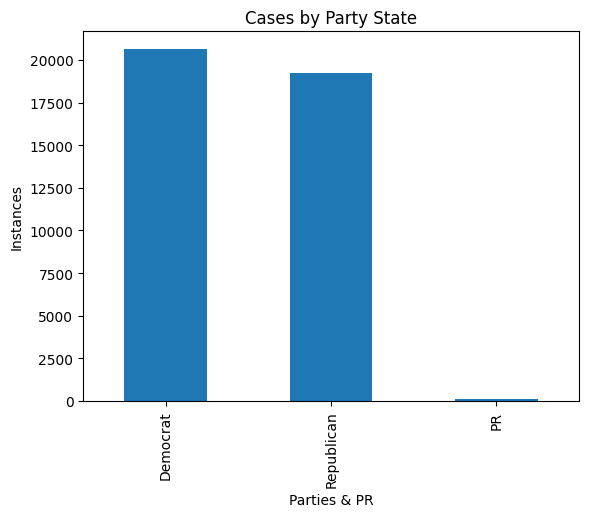

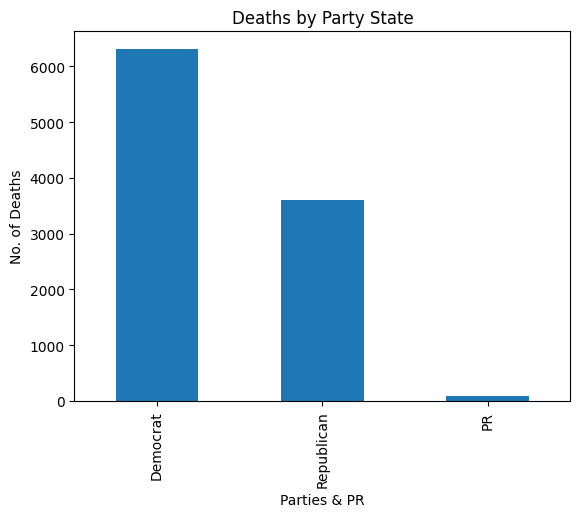

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-12        CA               6    RIVERSIDE           6065.0   
1    2022-01        NJ              34   GLOUCESTER          34015.0   
2    2020-11        TN              47       PUTNAM          47141.0   
3    2020-04        NY              36  WESTCHESTER          36119.0   
4    2020-03        TN              47       SUMNER          47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Missing              Missing   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval             current_status symptom_status  \
0                                0  Laboratory-confirmed case        Missing   
1                                2  Laboratory-confirmed case    Symptomatic   
2                                0  Laboratory-confirmed case    Symptomatic   
3                                0  Laboratory-confirmed case    Symptomatic   
4                                0  Laboratory-confirmed case    Symptomatic   

   hosp_yn death_yn death_prob_sex_age death_prob_medical state_party  
0  Missing      Yes           0.742958            Missing    Democrat  
1      Yes      Yes           0.742958           0.803502    Democrat  
2      Yes      Yes           0.742958           0.803502  Republican  
3      Yes      Yes           0.742958           0.803502    Democrat  
4      Yes      Yes           0.674179           0.803502  Republican

In [58]:
# Ref: https://www.fec.gov/resources/cms-content/documents/2020presgeresults.pdf, I recreated the tabular data stored in a pdf into a csv type file to be imported

party_file = pd.read_csv("./us_presidential_election_results_2020.csv")

#Convert party file into dataframe
df_party = pd.DataFrame(party_file)
df['state_party'] = ""

for state in df['res_state']:
    if state in df_party['states'].values:
        party = df_party.loc[df_party['states'] == state, 'party'].iloc[0]
        df.loc[df['res_state'] == state, 'state_party'] = party
    else:
        # PR citizens can not vote in US presidential elections, these will be coded to PR to denote the state
        df.loc[df['res_state'] == state, 'state_party'] = "PR"

df['state_party'].value_counts().plot(kind='bar')
plt.title("Cases by Party State")
plt.ylabel("Instances")
plt.xlabel("Parties & PR")
plt.show()

df_party_deaths = df.loc[:, ["state_party", "death_yn"]]
df_party_deaths = df_party_deaths[df_party_deaths['death_yn'] == "Yes"]

df_party_deaths['state_party'].value_counts().plot(kind='bar')
plt.title("Deaths by Party State")
plt.ylabel("No. of Deaths")
plt.xlabel("Parties & PR")
plt.show()

df['state_party'] = df['state_party'].astype('category')

df.head()

In [59]:
# separate out case months
df_month_deaths = df.loc[:, ["case_month", "death_yn"]]
death_prob_month = {}

# group the DataFrame by sex and age, calculate the probability of death for each combination
for (month), group in df_month_deaths.groupby("case_month"):
    total_deaths = group[group['death_yn'] == "Yes"]['death_yn'].count()
    total_individuals = group['death_yn'].count()
    death_probability = total_deaths / total_individuals
    death_prob_month[month] = death_probability

# add the calculated column into the dataframe
df["death_prob_month"] = df.apply(lambda row: death_prob_month.get(row["case_month"]), axis=1)

# this can be stored as a float as there are no missing values in the dataset for this feature
df['death_prob_month'] = df['death_prob_month'].astype('float')

df.head()

case_month res_state state_fips_code   res_county county_fips_code  \
0    2020-12        CA               6    RIVERSIDE           6065.0   
1    2022-01        NJ              34   GLOUCESTER          34015.0   
2    2020-11        TN              47       PUTNAM          47141.0   
3    2020-04        NY              36  WESTCHESTER          36119.0   
4    2020-03        TN              47       SUMNER          47165.0   

   age_group     sex     race            ethnicity  \
0  65+ years    Male  Missing              Missing   
1  65+ years    Male    White  Non-Hispanic/Latino   
2  65+ years    Male    White  Non-Hispanic/Latino   
3  65+ years    Male    Black  Non-Hispanic/Latino   
4  65+ years  Female    White  Non-Hispanic/Latino   

   case_positive_specimen_interval             current_status symptom_status  \
0                                0  Laboratory-confirmed case        Missing   
1                                2  Laboratory-confirmed case    Symptomatic   
2                                0  Laboratory-confirmed case    Symptomatic   
3                                0  Laboratory-confirmed case    Symptomatic   
4                                0  Laboratory-confirmed case    Symptomatic   

   hosp_yn death_yn death_prob_sex_age death_prob_medical state_party  \
0  Missing      Yes           0.742958            Missing    Democrat   
1      Yes      Yes           0.742958           0.803502    Democrat   
2      Yes      Yes           0.742958           0.803502  Republican   
3      Yes      Yes           0.742958           0.803502    Democrat   
4      Yes      Yes           0.674179           0.803502  Republican   

   death_prob_month  
0          0.427450  
1          0.173905  
2          0.324263  
3          0.782269  
4          0.720820

In [60]:
df_death_dates = df.copy()
df_death_dates['case_month'] = df_death_dates['case_month'].astype('datetime64[ns]')

start_20 = pd.to_datetime('2020-01')
end_20 = pd.to_datetime('2020-12')

df_20 = df_death_dates[(df_death_dates['case_month'] >= start_20) & (df_death_dates['case_month'] <= end_20)]

# mean is used twice to group the death prob of the case months, they are all the same for each instance of a case month so this is only for grouping. Once grouped, the average over all the months is taken as the average probability for the year
total_20 = df_20['death_prob_month'].mean().mean()

print("Average probability of death across case months in 2020: " + str(total_20*100) + "%")

start_21 = pd.to_datetime('2021-01')
end_21 = pd.to_datetime('2021-12')

df_21 = df_death_dates[(df_death_dates['case_month'] >= start_21) & (df_death_dates['case_month'] <= end_21)]
total_21 = df_21['death_prob_month'].mean().mean()

print("Average probability of death across case months in 2021: " + str(total_21*100) + "%")

start_22 = pd.to_datetime('2022-01')
end_22 = pd.to_datetime('2022-11')

df_22 = df_death_dates[(df_death_dates['case_month'] >= start_22) & (df_death_dates['case_month'] <= end_22)]
total_22 = df_22['death_prob_month'].mean().mean()

print("Average probability of death across case months in 2022: " + str(total_22*100) + "%")

Average probability of death across case months in 2020: 41.82440136830103%
Average probability of death across case months in 2021: 20.966479718273117%
Average probability of death across case months in 2022: 11.145860481278778%


Show that the probability of death decreased year on year, which is a good sign for policy aimed at reducing deaths in the population due to Covid-19 such as vaccinations, closures of non-essential businesses and masks. A domain expert would be needed to draw a causal link but this is a good indication that Covid-19 became less life threatening over time.

### Print data types, descriptive tables, save to csv

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case_month                       40000 non-null  category
 1   res_state                        40000 non-null  category
 2   state_fips_code                  40000 non-null  category
 3   res_county                       40000 non-null  category
 4   county_fips_code                 40000 non-null  category
 5   age_group                        40000 non-null  category
 6   sex                              40000 non-null  category
 7   race                             40000 non-null  category
 8   ethnicity                        40000 non-null  category
 9   case_positive_specimen_interval  40000 non-null  int64   
 10  current_status                   40000 non-null  category
 11  symptom_status                   40000 non-null  category
 12  hosp

Print categorical statistics

In [62]:
category_columns = df.select_dtypes('category').columns
df[category_columns].describe().T

count unique                        top    freq
case_month            40000     35                    2022-01    5227
res_state             40000     49                         NY    4315
state_fips_code       40000     49                         36    4315
res_county            40000    930                    Missing    2432
county_fips_code      40000   1327                    Missing    2432
age_group             40000      5             18 to 49 years   15357
sex                   40000      3                     Female   20770
race                  40000      7                      White   24858
ethnicity             40000      3        Non-Hispanic/Latino   24066
current_status        40000      2  Laboratory-confirmed case   34097
symptom_status        40000      3                    Missing   21236
hosp_yn               40000      3                         No   19749
death_yn              40000      2                         No   30000
death_prob_sex_age  40000.0    9.0                   0.005774  8486.0
death_prob_medical    40000      5                    Missing   23855
state_party           40000      3                   Democrat   20648

Print continuous statistics

In [63]:
continuous_columns = df.select_dtypes(['int64', 'float64']).columns
df[continuous_columns].describe().T

count      mean       std       min  \
case_positive_specimen_interval  40000.0  0.105275  1.207551  0.000000   
death_prob_month                 40000.0  0.250000  0.171967  0.007246   

                                      25%       50%       75%        max  
case_positive_specimen_interval  0.000000  0.000000  0.000000  73.000000  
death_prob_month                 0.169358  0.189514  0.333652   0.909091

In [64]:
# Write the cleaned dataframe to a csv file
df.to_csv('covid19_cdc_19211297_cleaned_1-3.csv', index=False)